# [ GLOW ] OOD Detection using FSS

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
sys.path.append(os.getcwd() + '/core/train_GLOW') 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import core.config as config
from core.model_loader import load_pretrained_GLOW
from core.data_loader import TRAIN_loader, TEST_loader
from core.fisher_utils_GLOW import Calculate_fisher_GLOW, Calculate_score_GLOW, AUTO_GLOW
from core.fisher_utils_GLOW import Calculate_fisher_GLOW_ekfac, Calculate_score_GLOW_ekfac
from core.visualize import plot_hist, AUROC, plot_scores_all_layers

# fix a random seed
seed = 2021
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# GLOW - CIFAR10 & FMNIST

## [1] Load the model & Parameter Selection

In [2]:
opt = config.GLOW_cifar10
model = load_pretrained_GLOW(option=opt.train_dist)
model.eval()
modules = []

## [2] Compute ROSE via EKFAC

Files already downloaded and verified


Calculate A, B:   0%|                                                                                                                                                                                                                           | 0/50000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate A, B:   2%|████▏                                                                                                                                                                                                          | 999/50000 [01:32<1:15:45, 10.78step/s]


Files already downloaded and verified


Calculate Fisher Inverse:   2%|███▉                                                                                                                                                                                                 | 999/50000 [01:41<1:22:35,  9.89step/s]


Files already downloaded and verified


Calculate Score of cifar10(train):   2%|███▊                                                                                                                                                                                        | 999/50000 [01:52<1:31:40,  8.91step/s]


Files already downloaded and verified


Calculate Score of cifar10:   5%|█████████▊                                                                                                                                                                                           | 499/10000 [00:54<17:14,  9.18step/s]


Average Inference Time : 0.108766678 seconds
Average #Images Processed : 9.193992299737241 Images


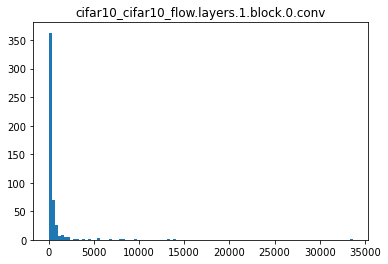

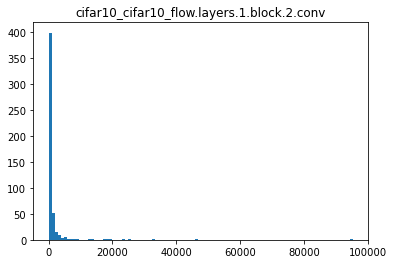

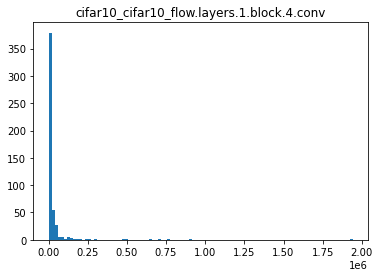

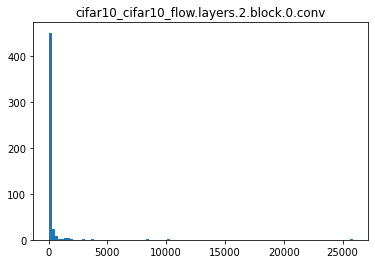

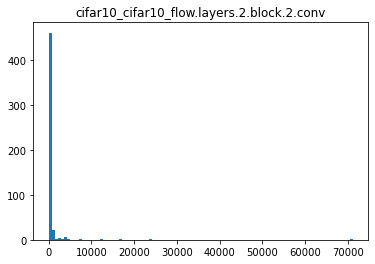

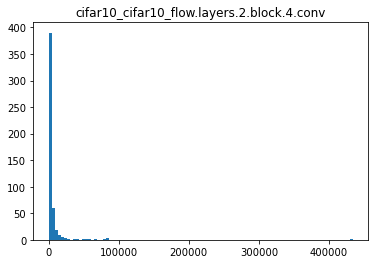

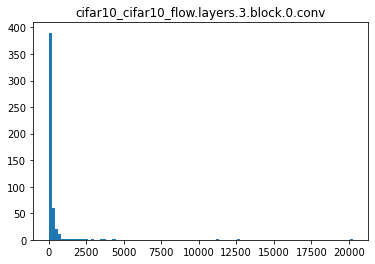

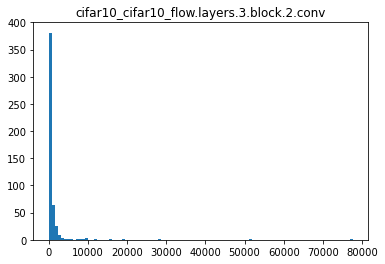

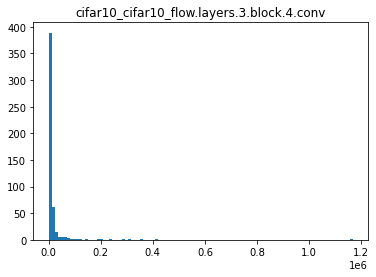

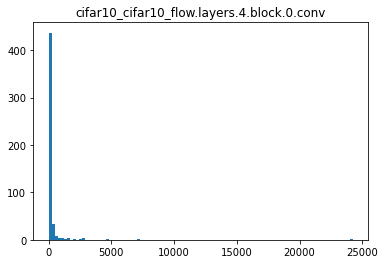

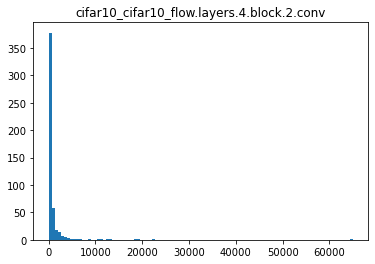

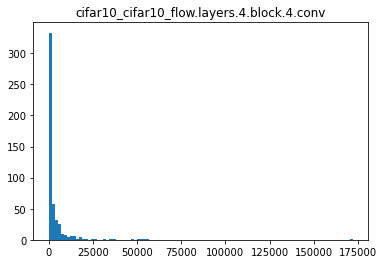

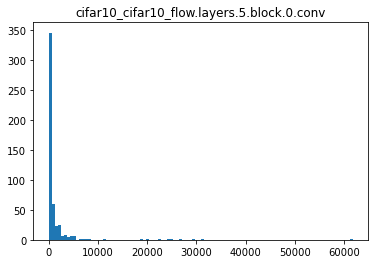

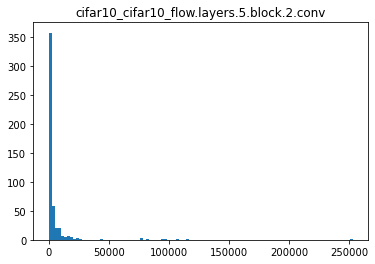

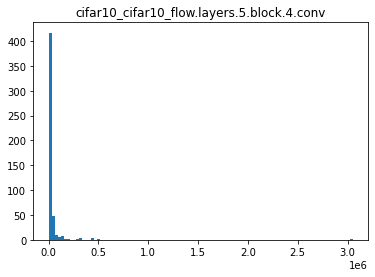

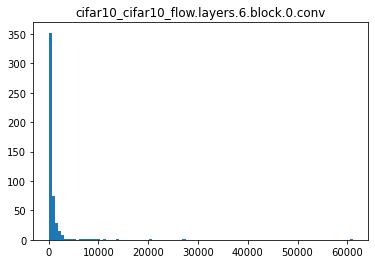

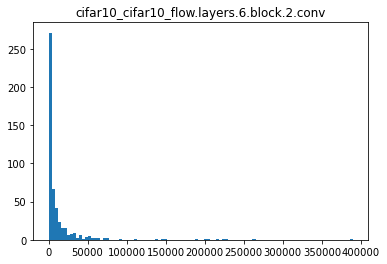

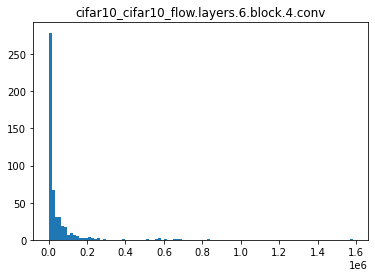

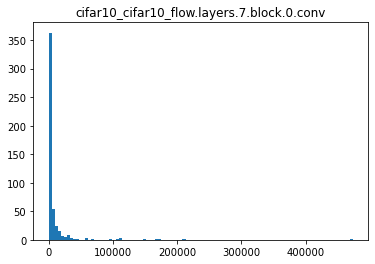

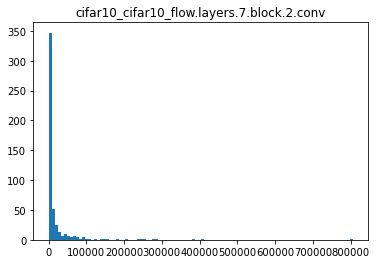

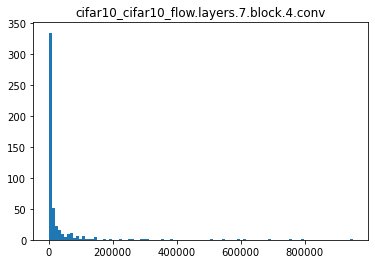

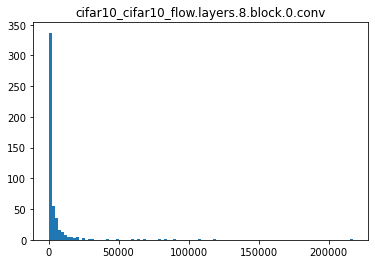

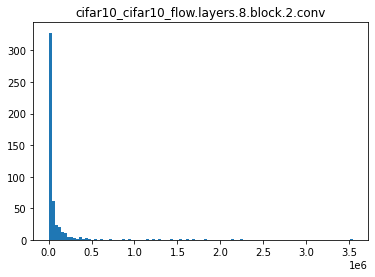

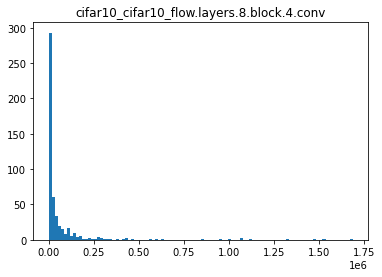

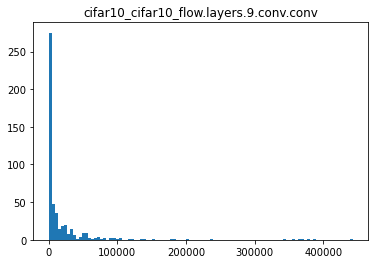

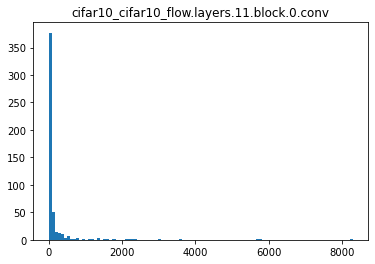

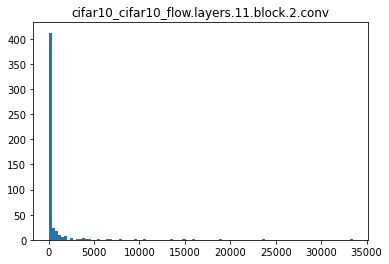

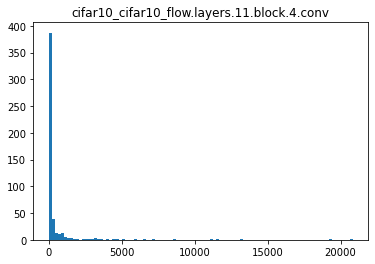

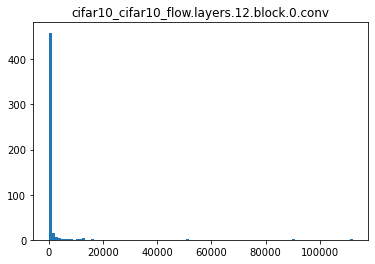

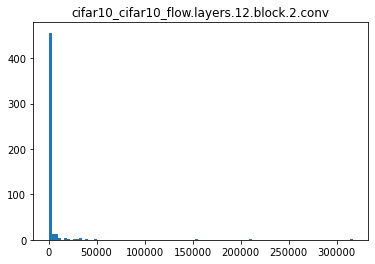

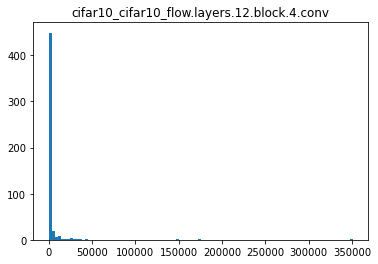

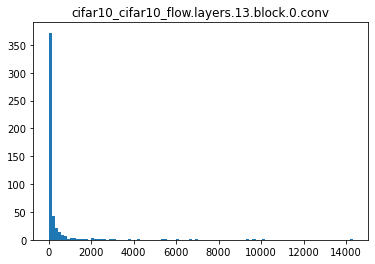

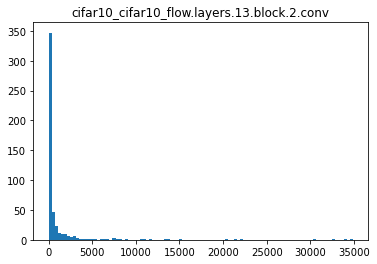

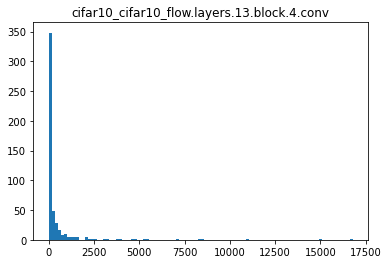

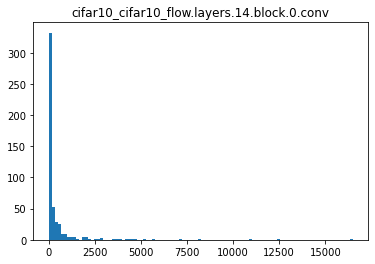

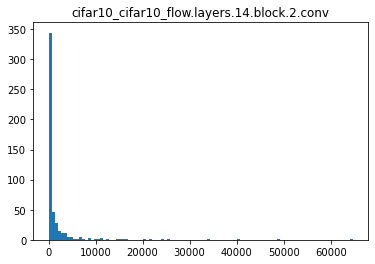

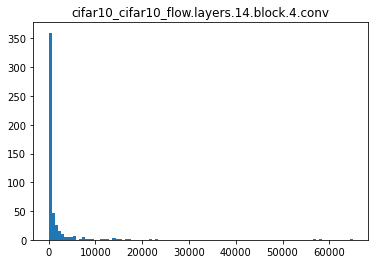

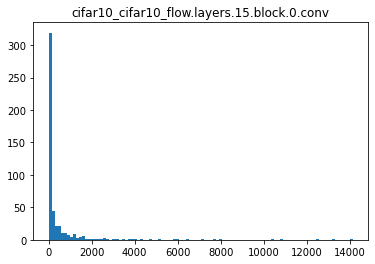

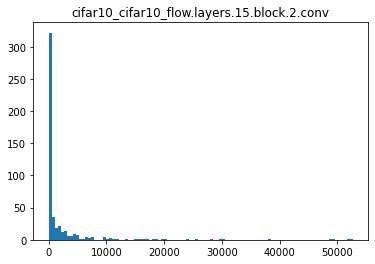

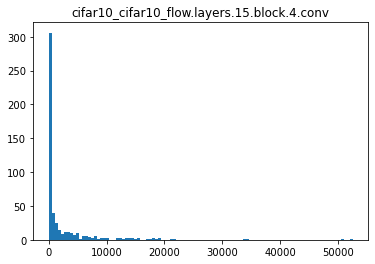

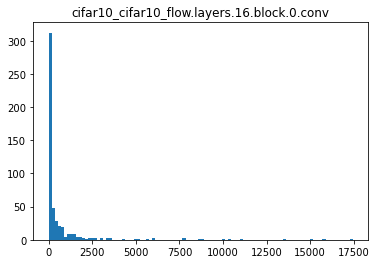

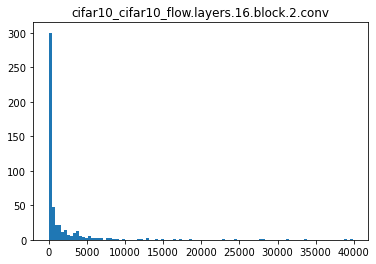

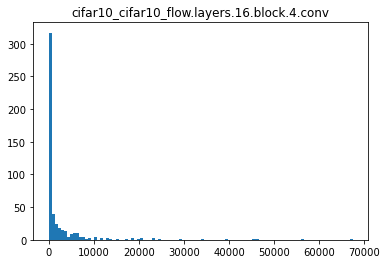

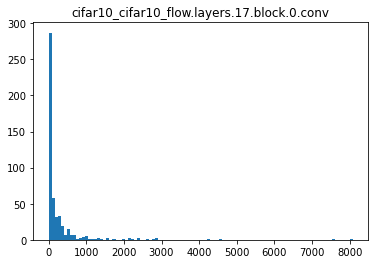

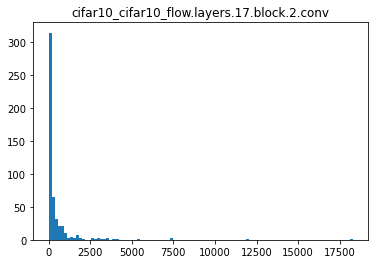

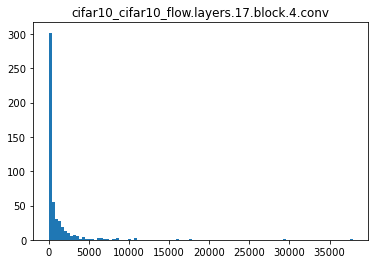

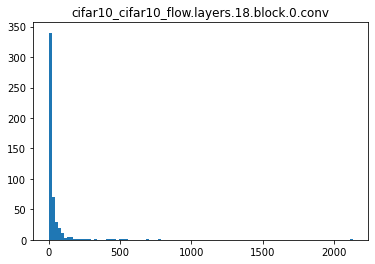

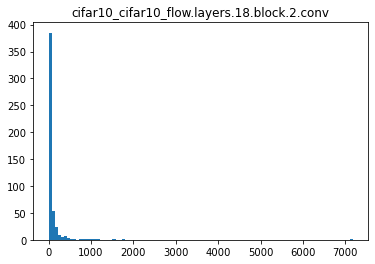

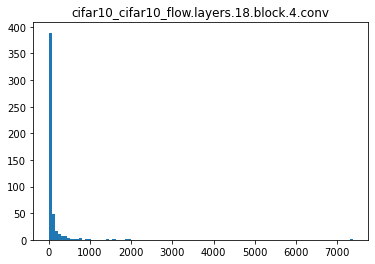

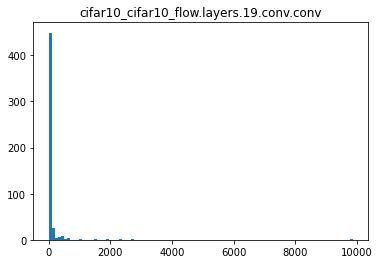

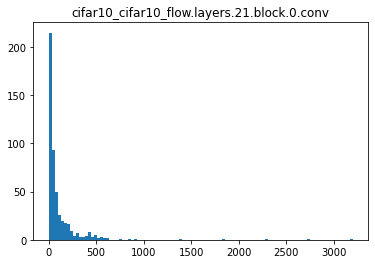

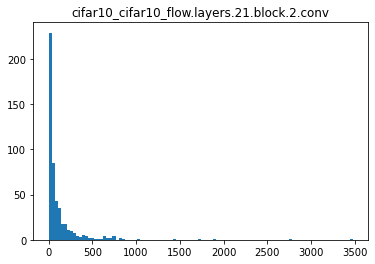

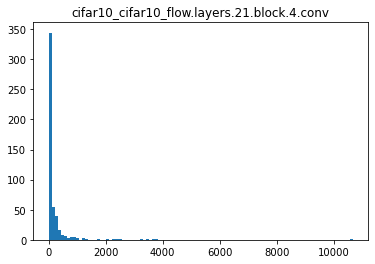

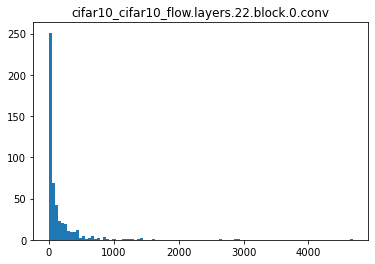

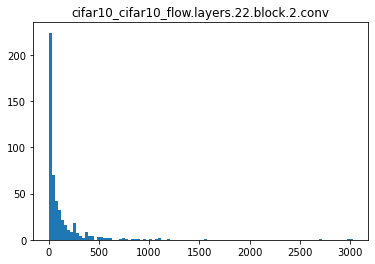

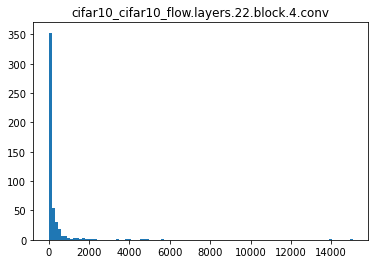

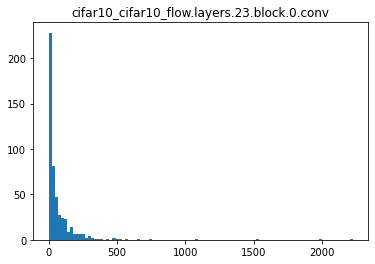

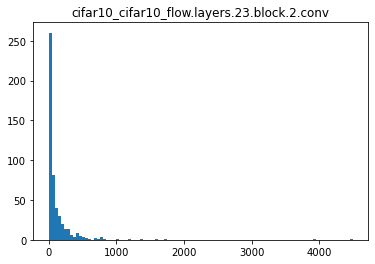

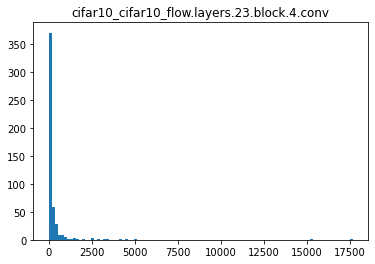

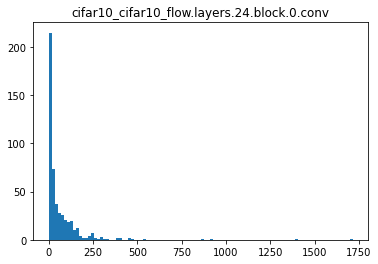

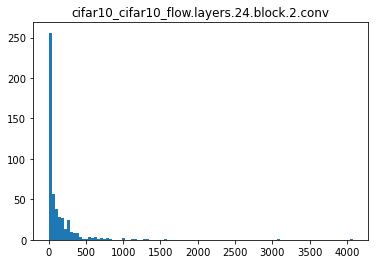

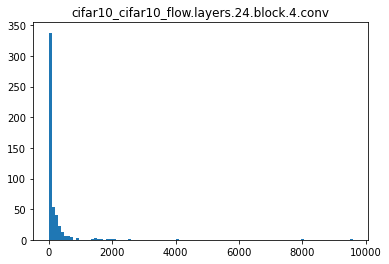

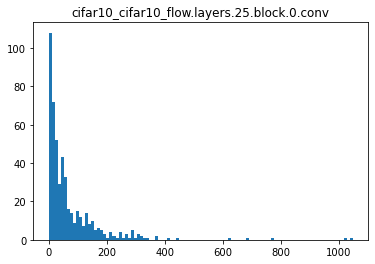

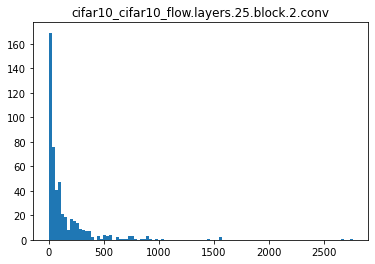

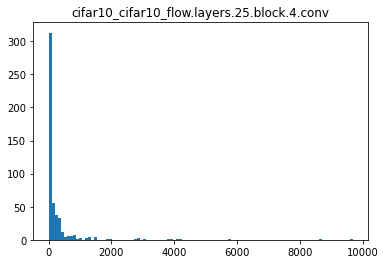

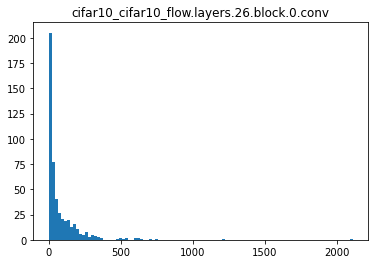

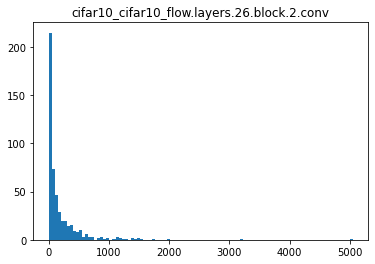

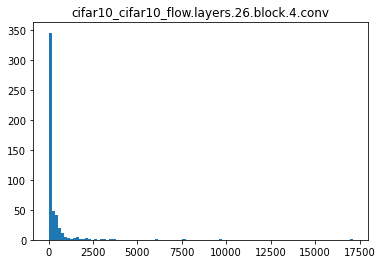

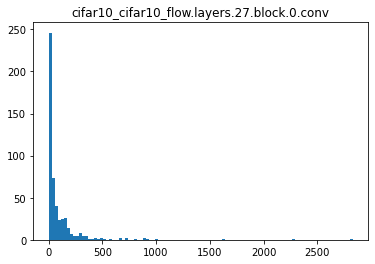

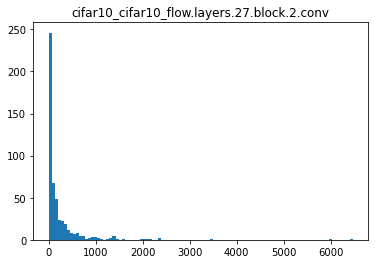

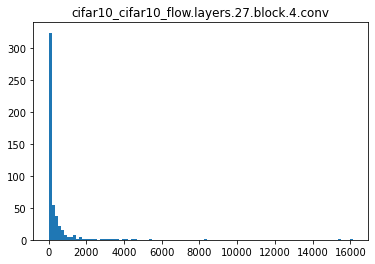

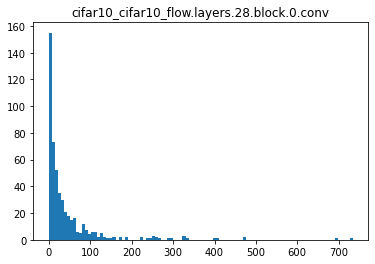

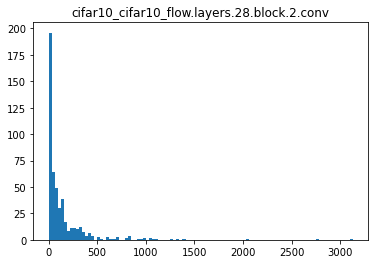

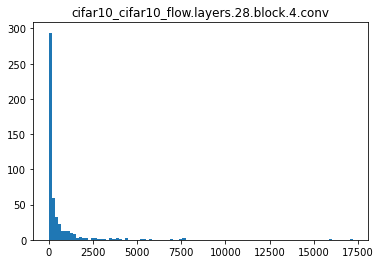

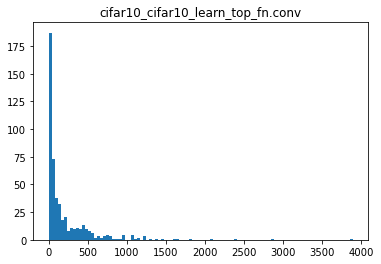

Using downloaded and verified file: ../data\test_32x32.mat


Calculate Score of svhn:   0%|                                                                                                                                                                                                                  | 0/26032 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of svhn:   2%|███▊                                                                                                                                                                                                    | 499/26032 [00:54<46:29,  9.15step/s]


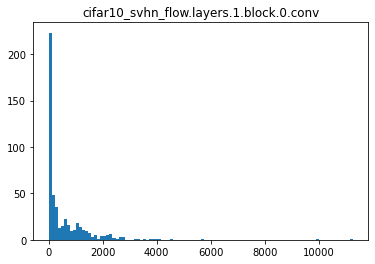

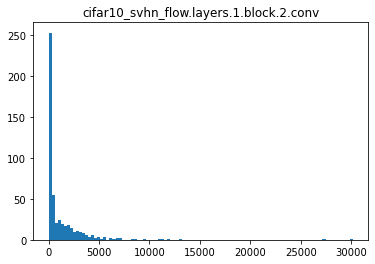

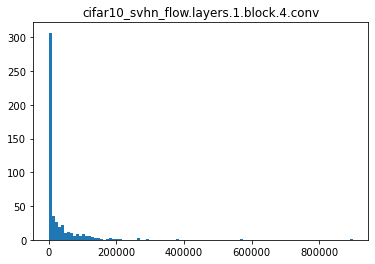

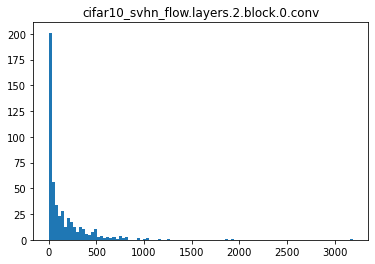

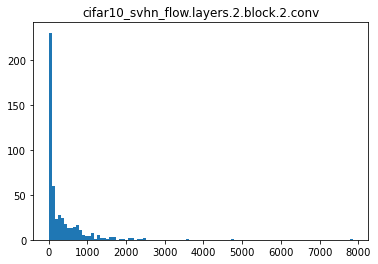

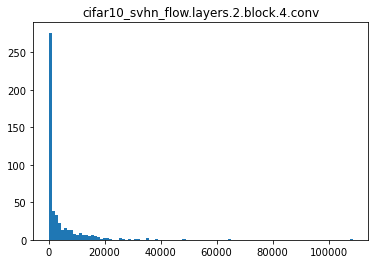

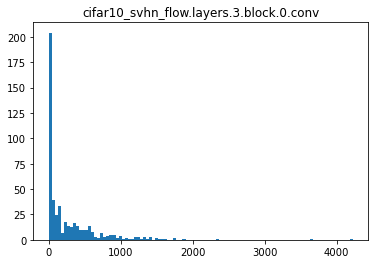

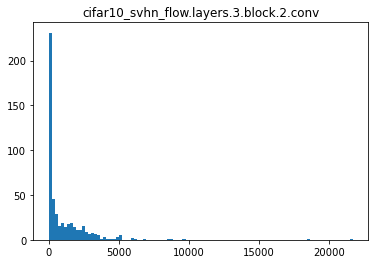

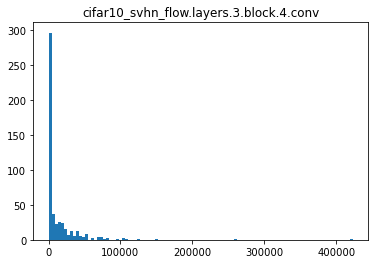

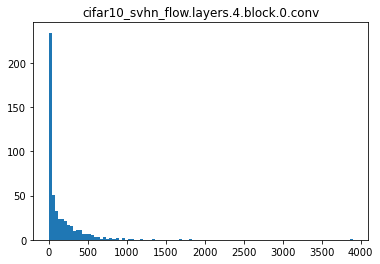

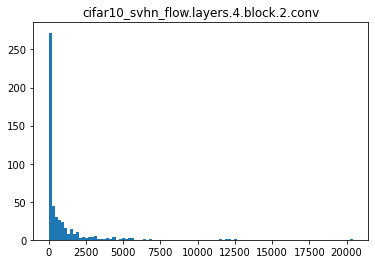

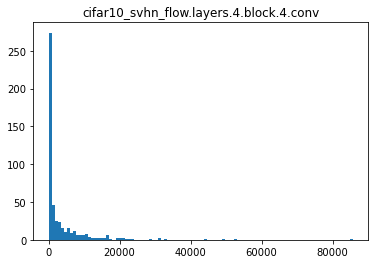

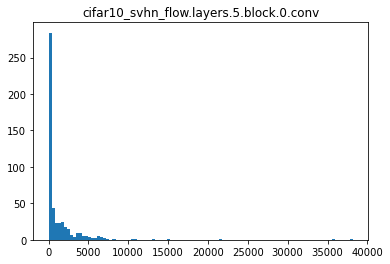

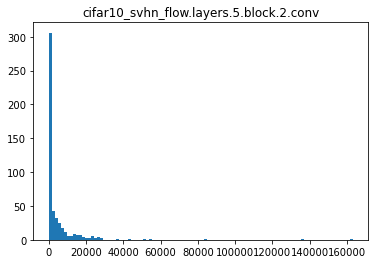

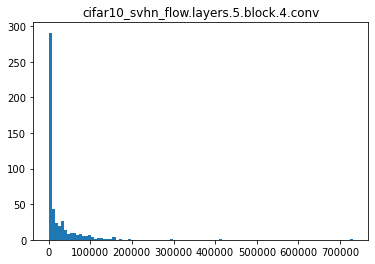

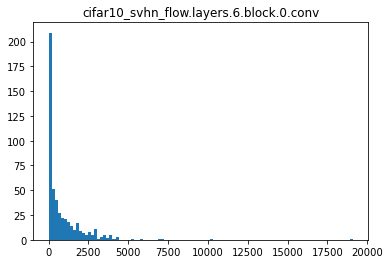

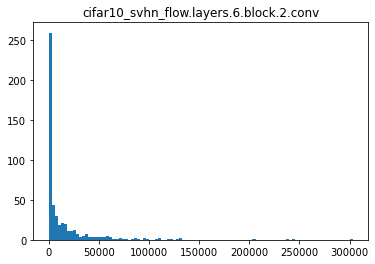

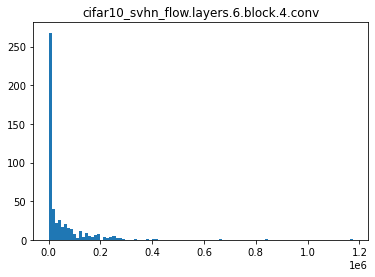

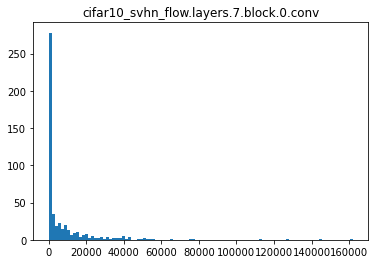

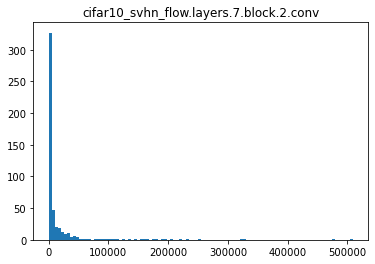

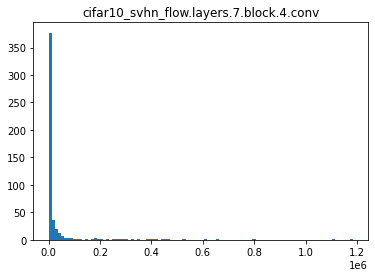

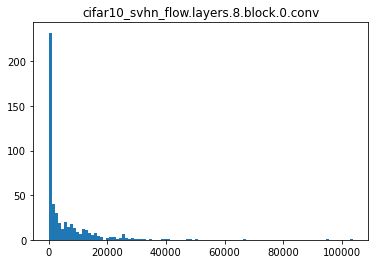

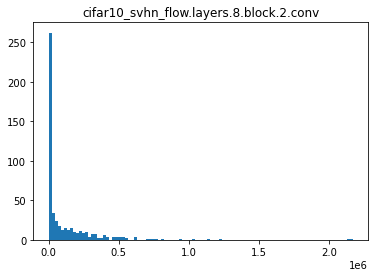

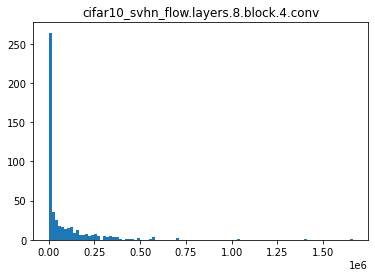

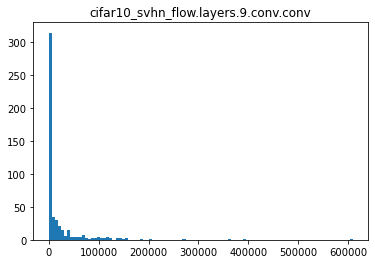

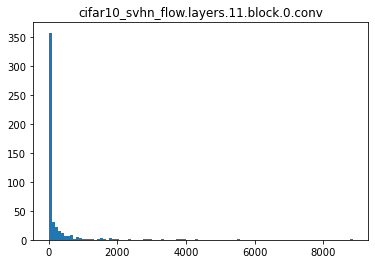

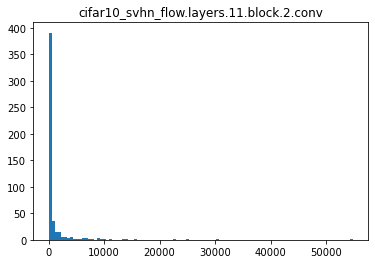

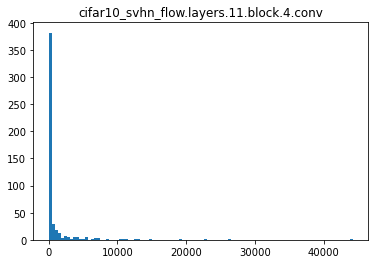

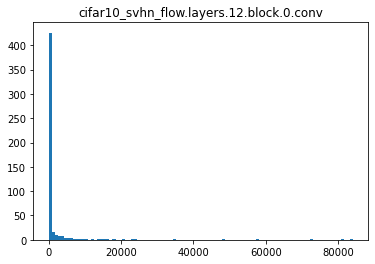

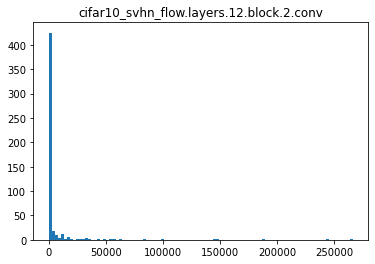

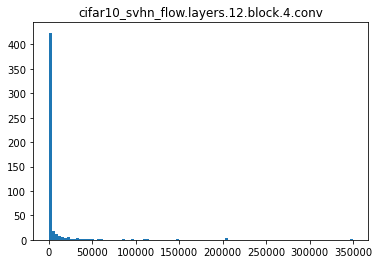

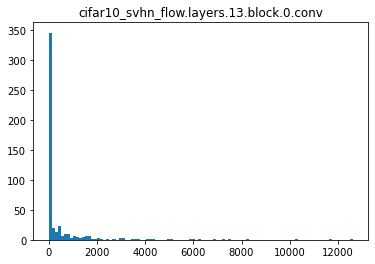

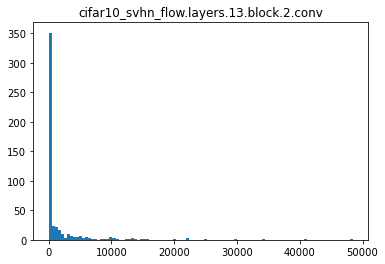

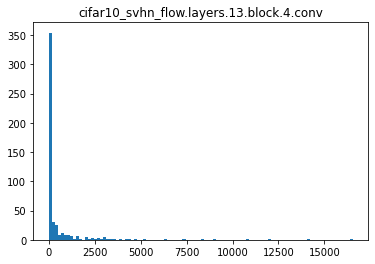

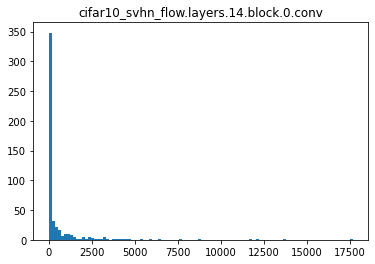

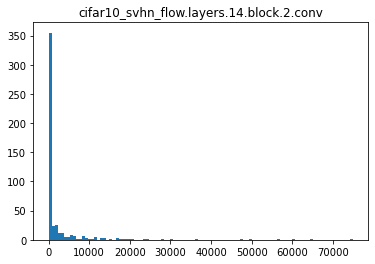

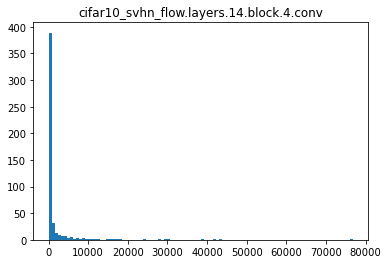

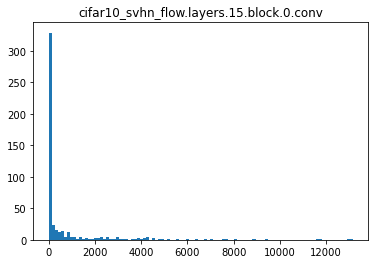

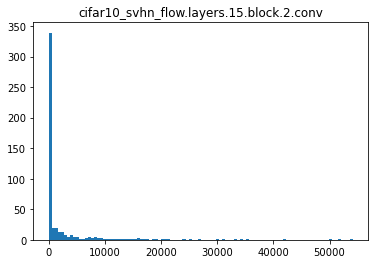

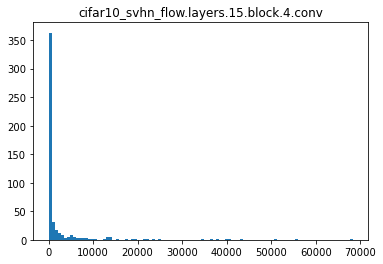

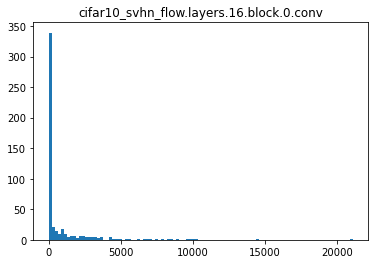

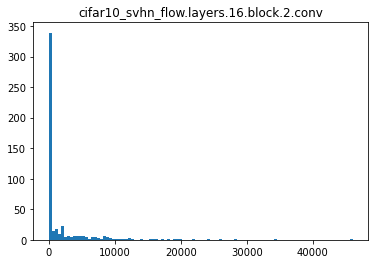

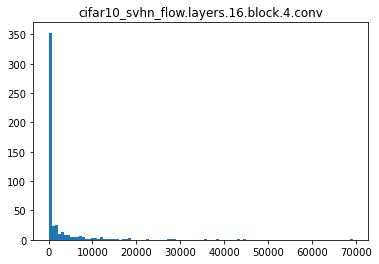

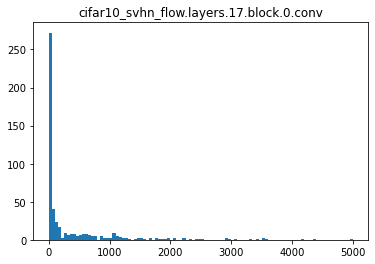

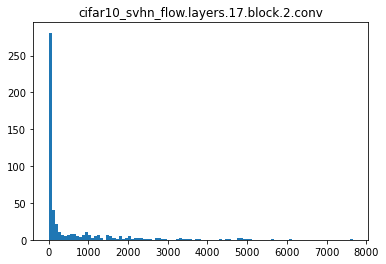

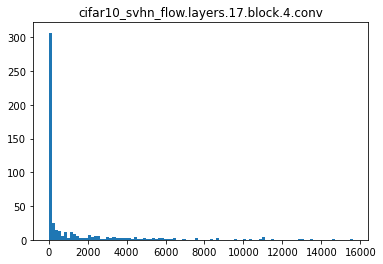

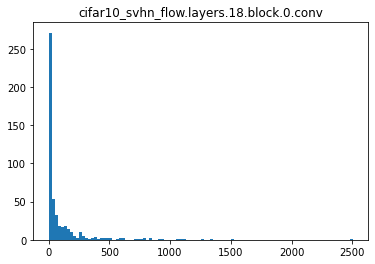

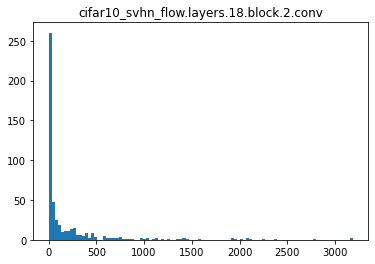

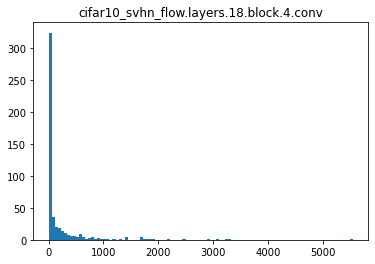

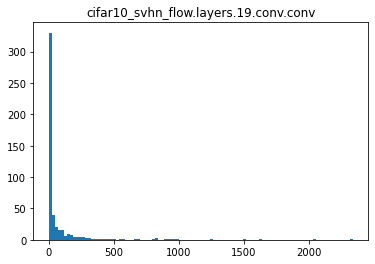

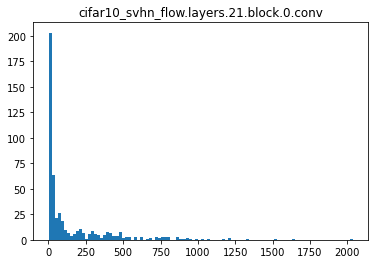

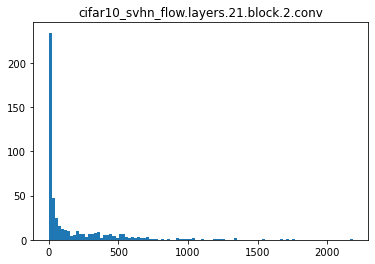

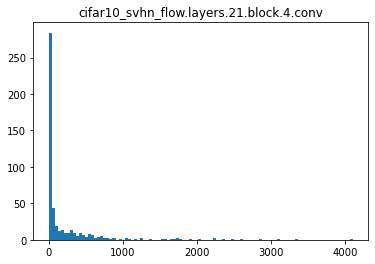

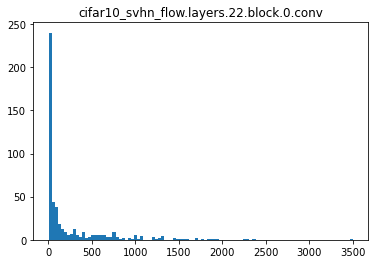

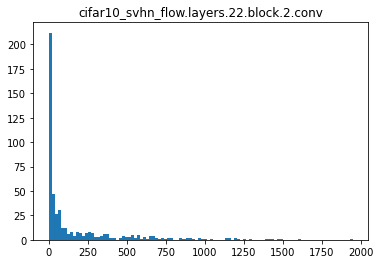

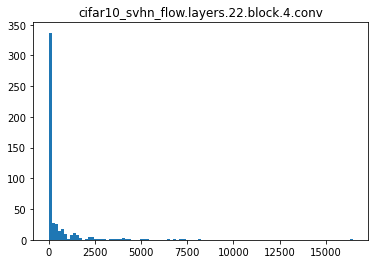

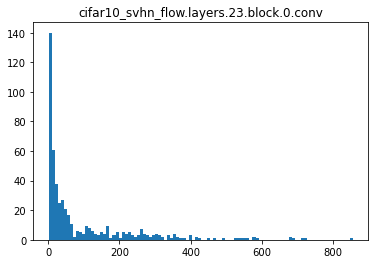

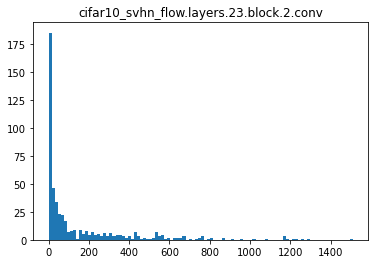

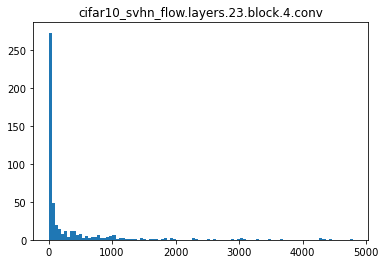

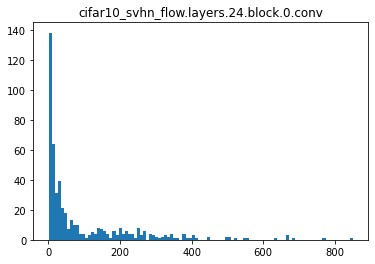

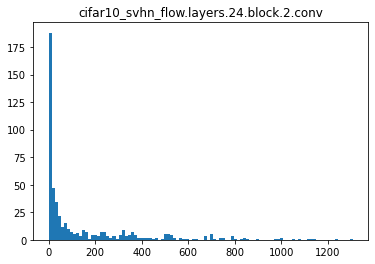

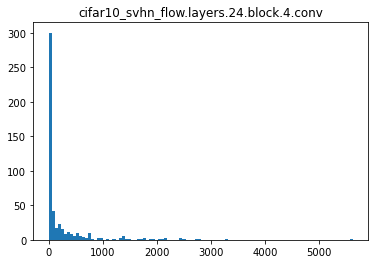

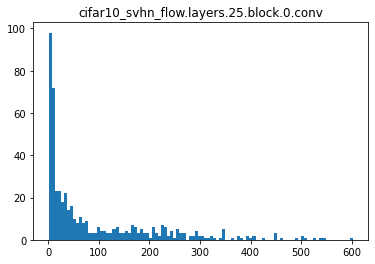

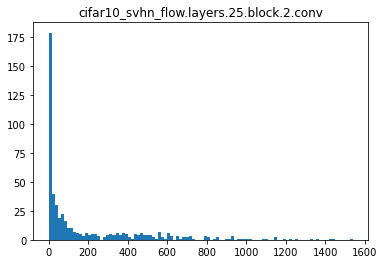

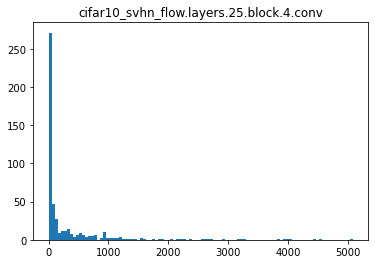

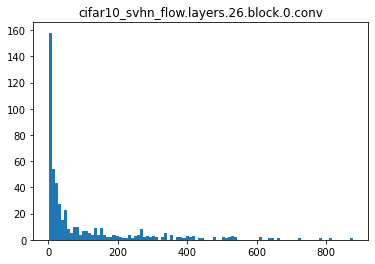

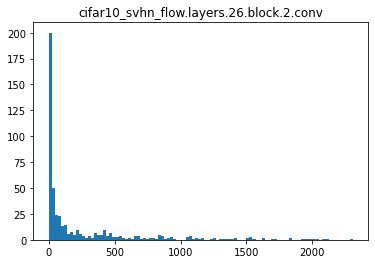

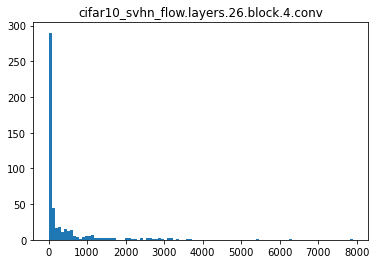

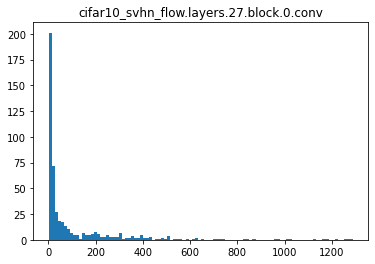

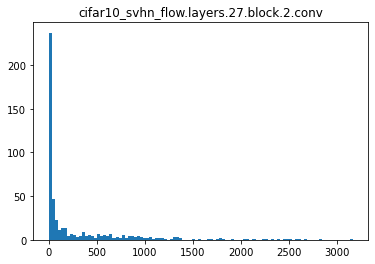

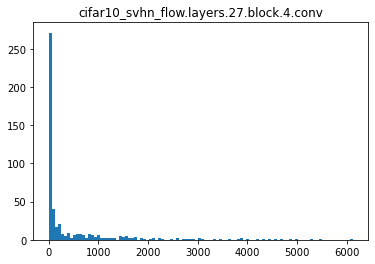

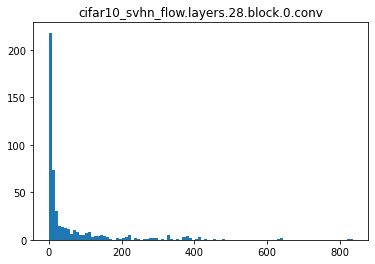

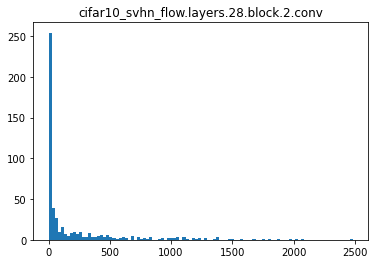

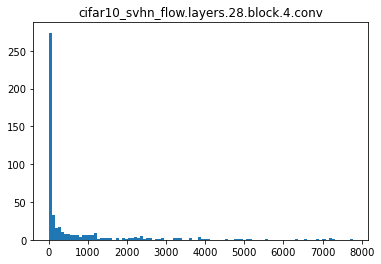

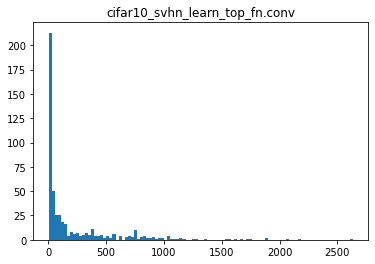

Calculate Score of celeba:   0%|                                                                                                                                                                                                                | 0/19141 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of celeba:   3%|█████▏                                                                                                                                                                                                | 499/19141 [00:55<34:24,  9.03step/s]


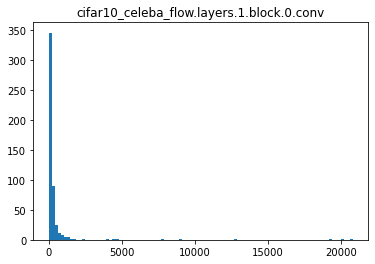

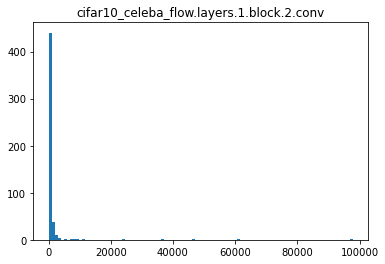

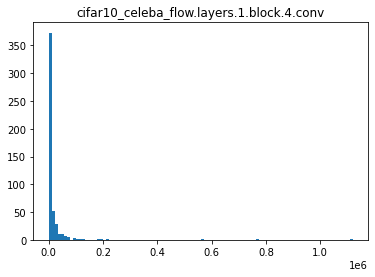

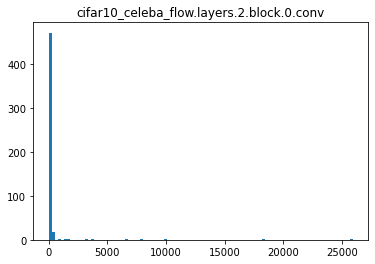

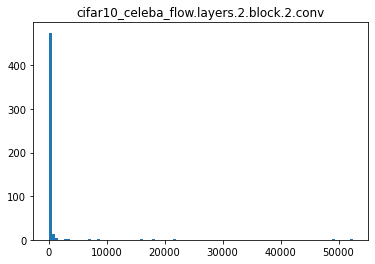

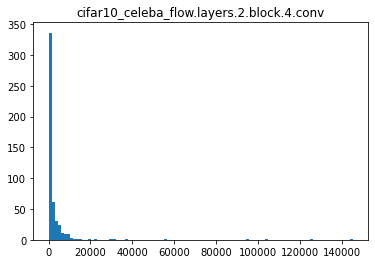

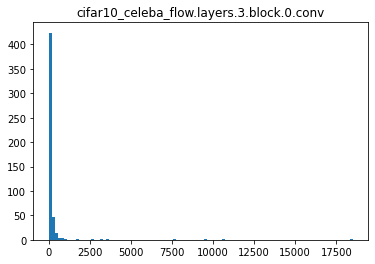

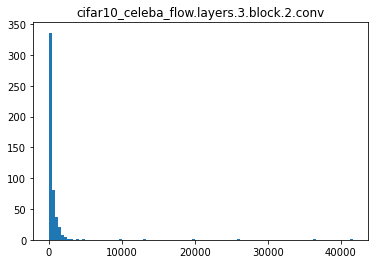

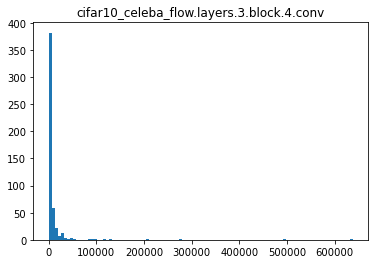

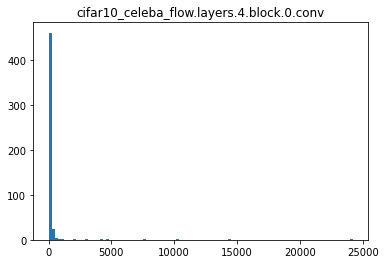

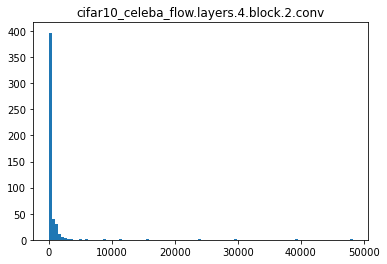

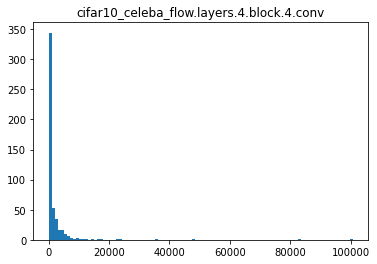

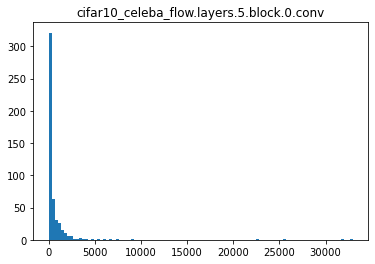

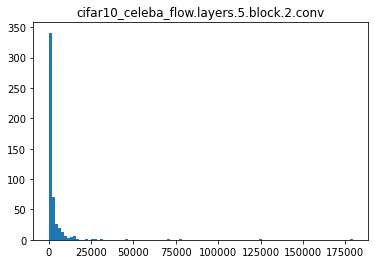

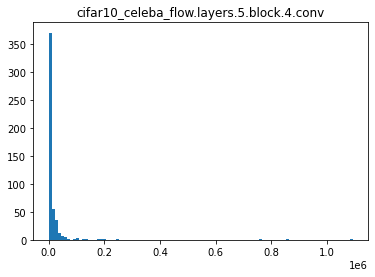

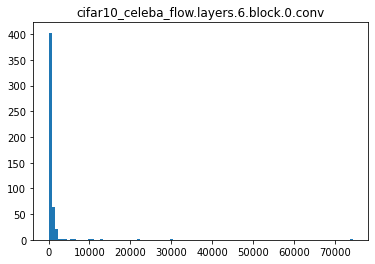

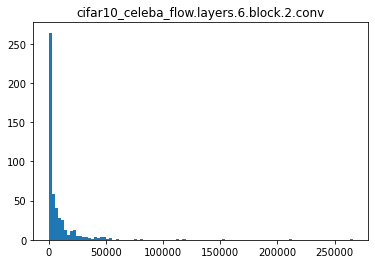

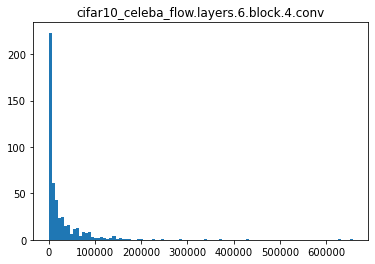

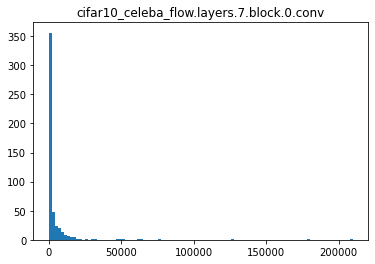

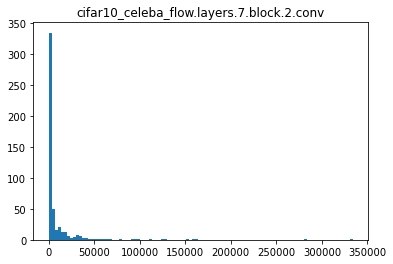

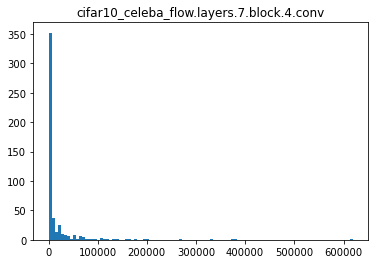

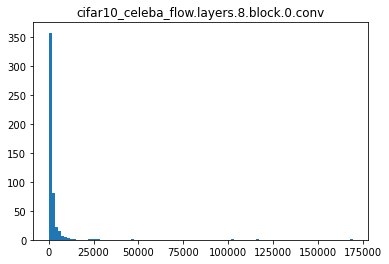

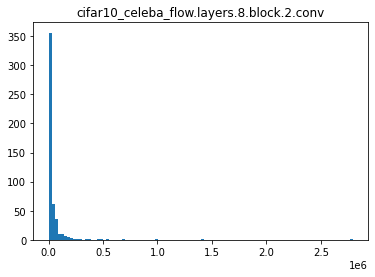

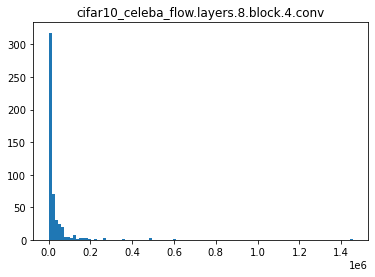

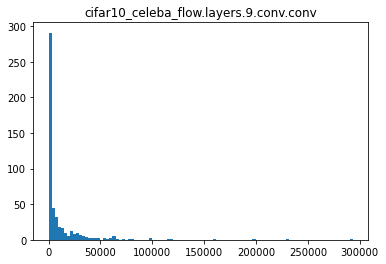

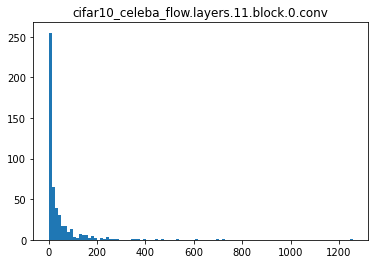

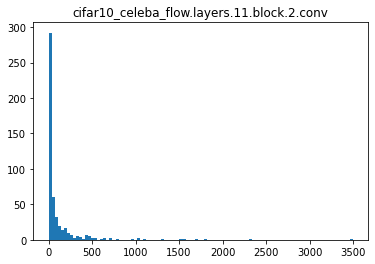

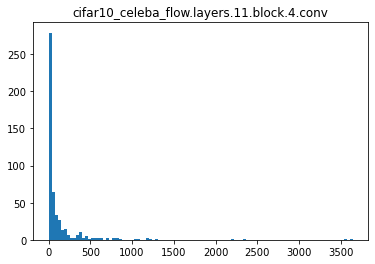

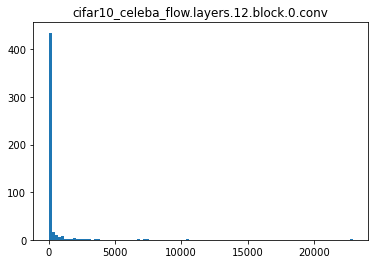

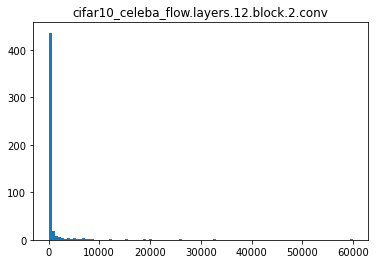

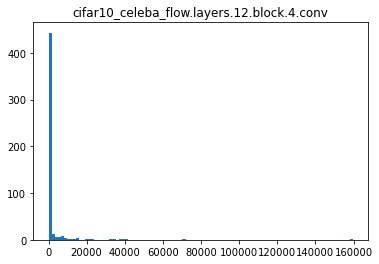

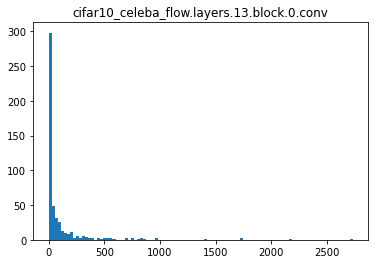

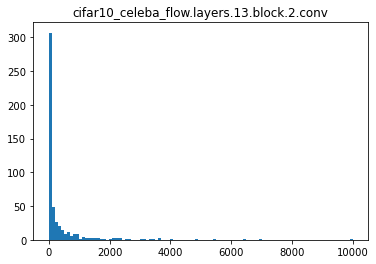

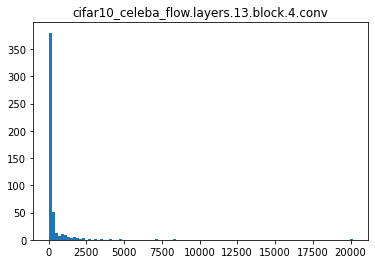

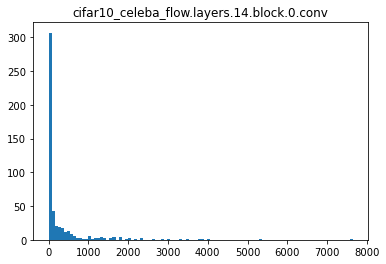

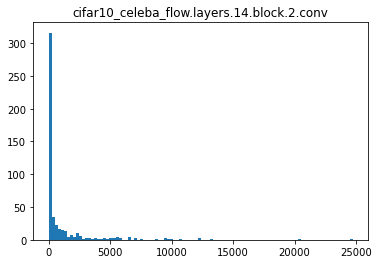

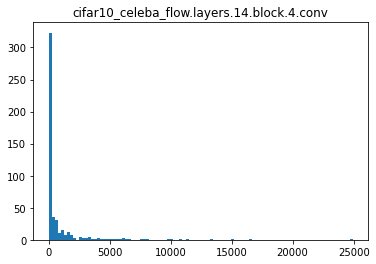

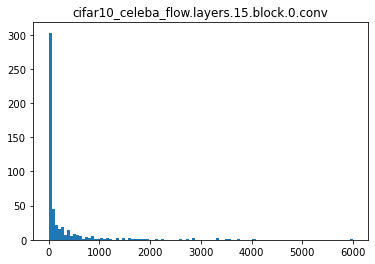

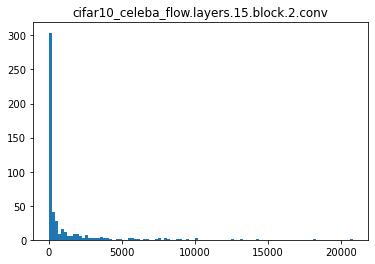

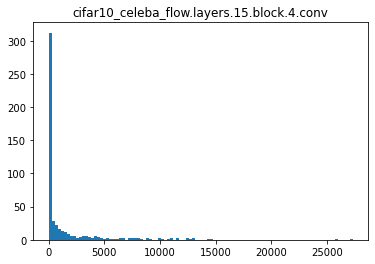

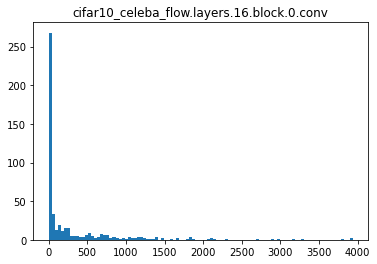

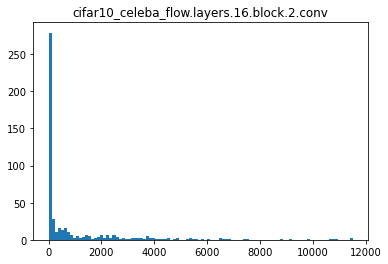

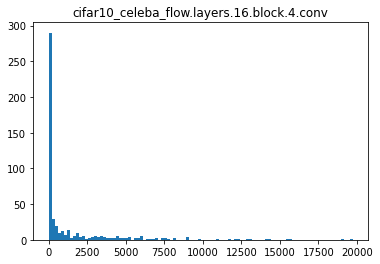

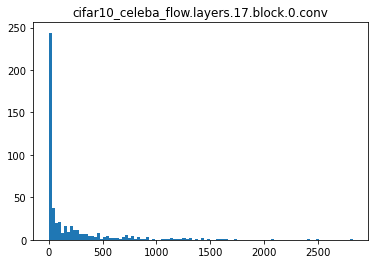

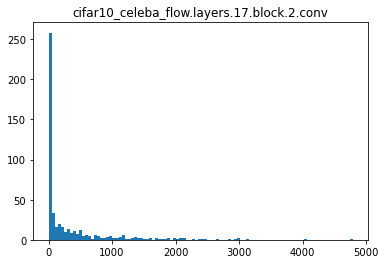

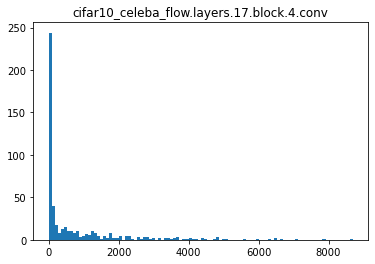

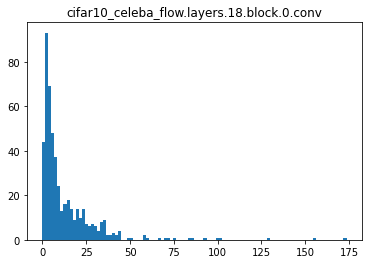

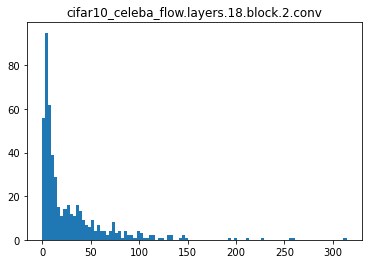

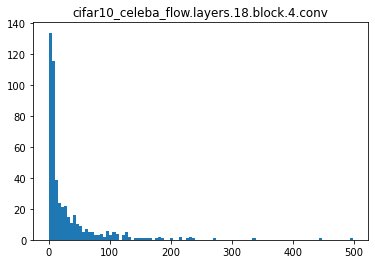

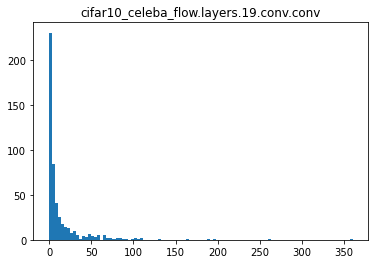

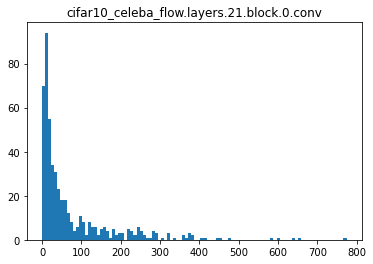

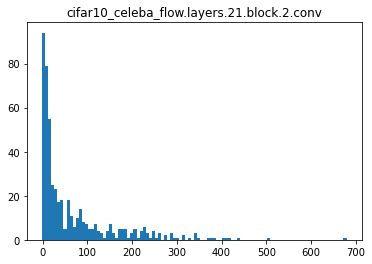

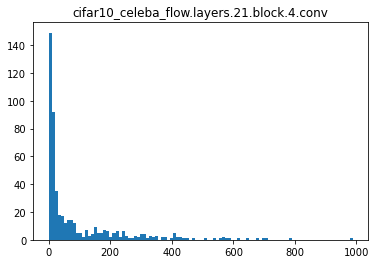

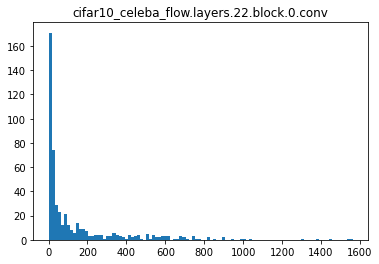

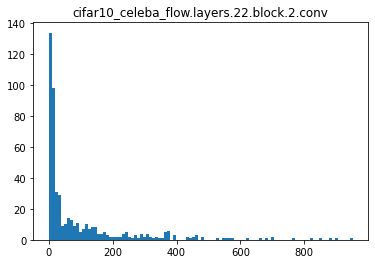

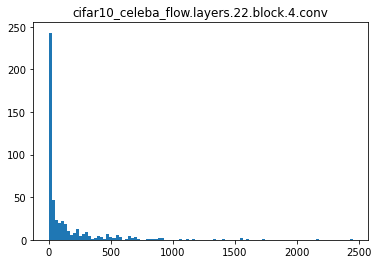

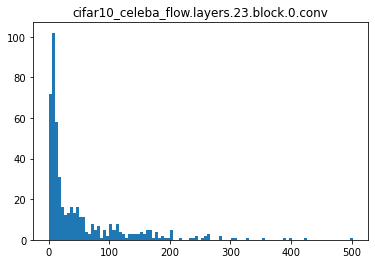

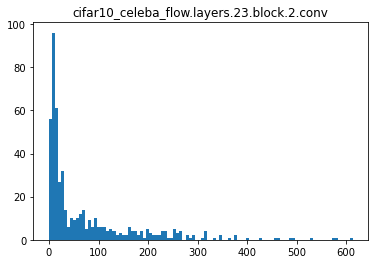

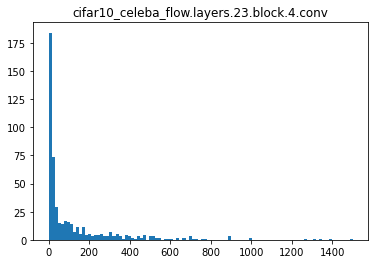

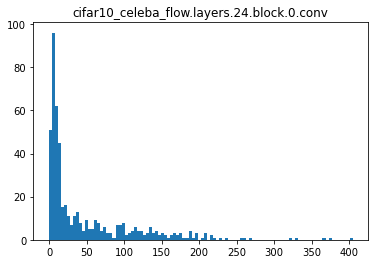

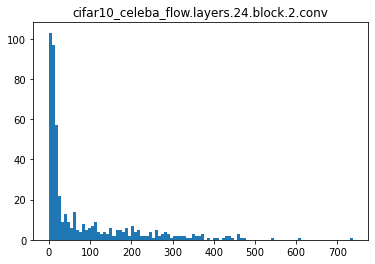

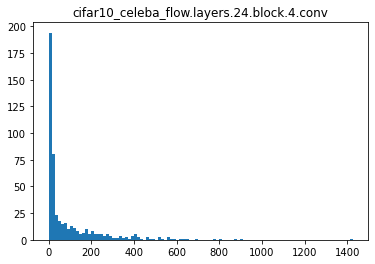

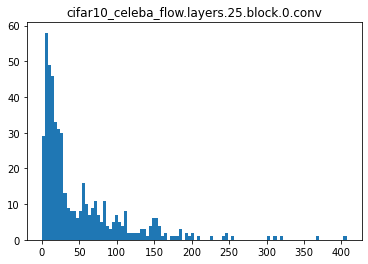

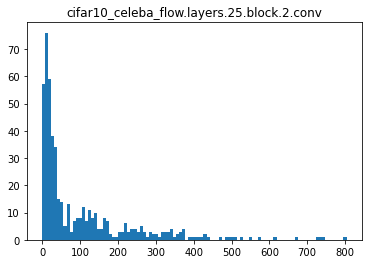

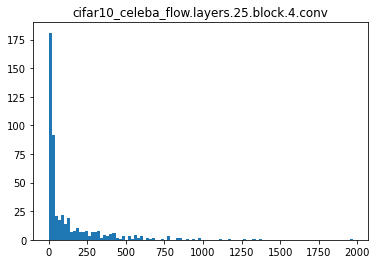

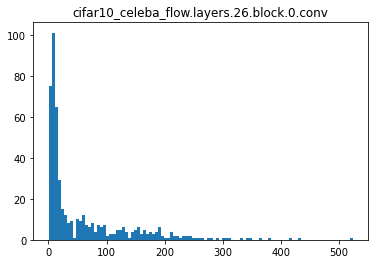

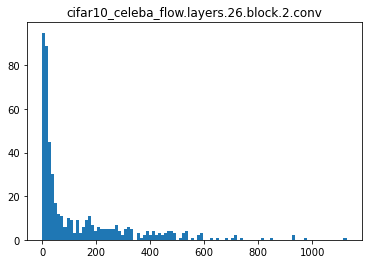

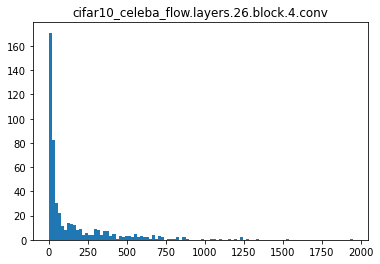

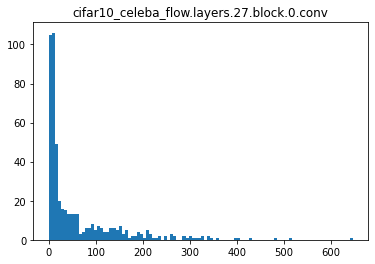

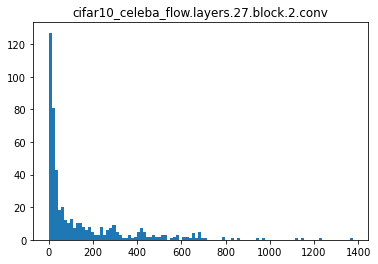

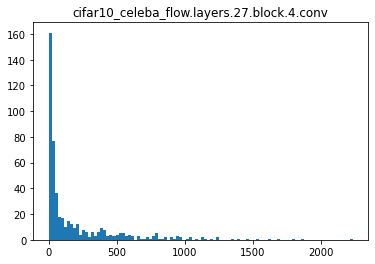

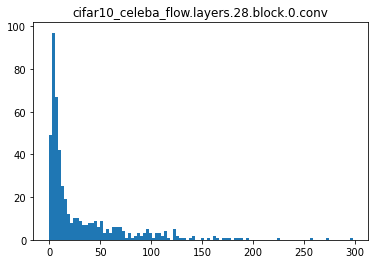

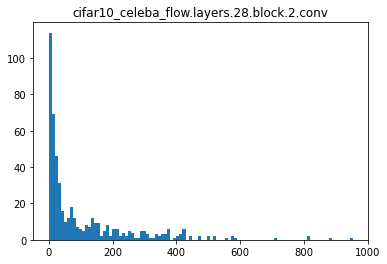

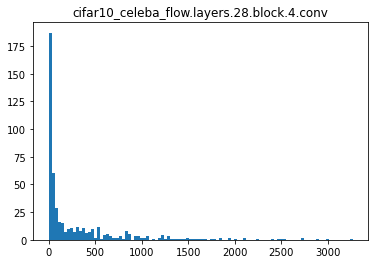

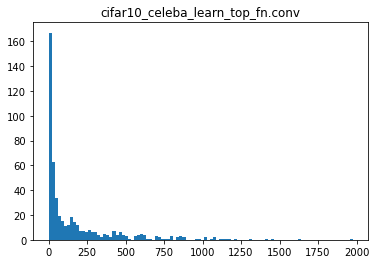

Calculate Score of lsun:   0%|                                                                                                                                                                                                                  | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of lsun:   5%|█████████▉                                                                                                                                                                                              | 499/10000 [00:55<17:42,  8.94step/s]


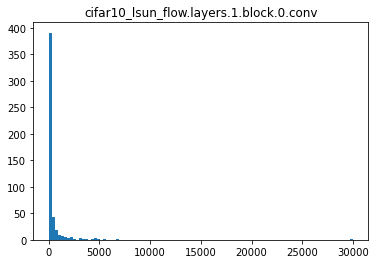

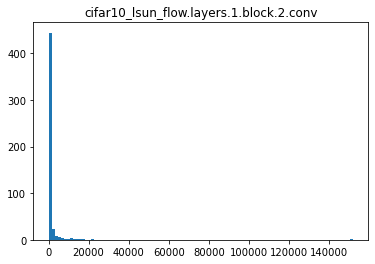

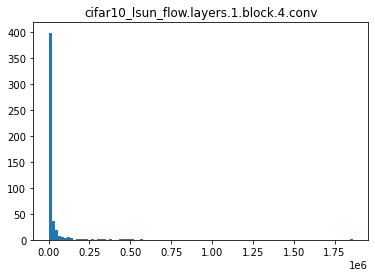

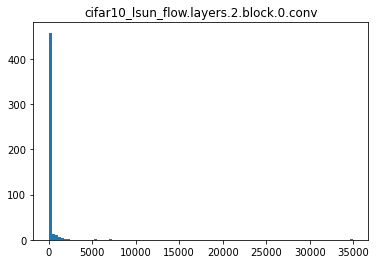

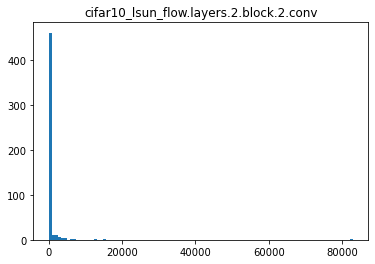

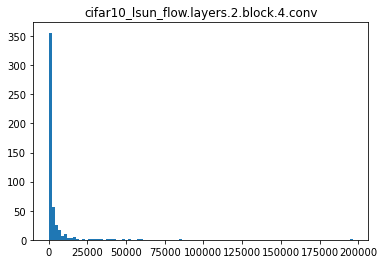

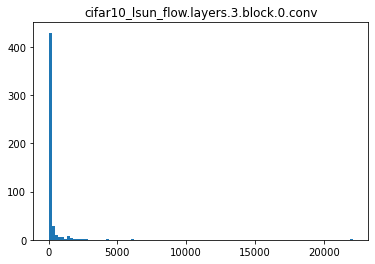

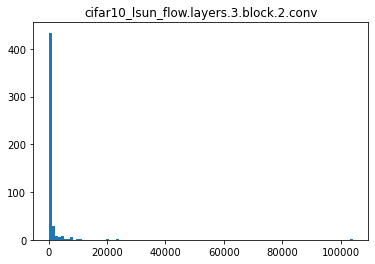

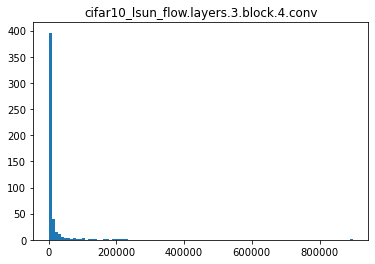

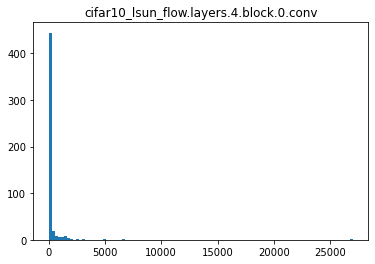

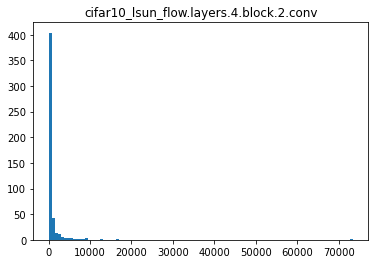

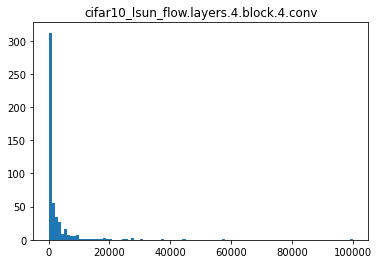

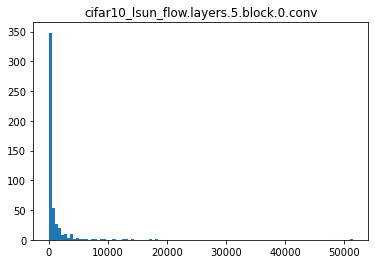

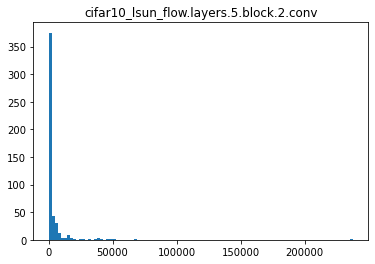

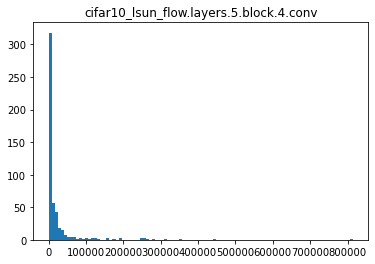

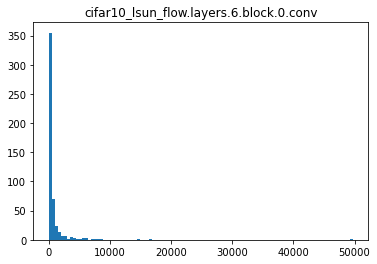

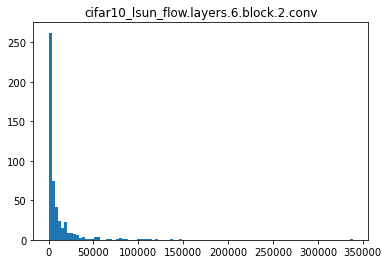

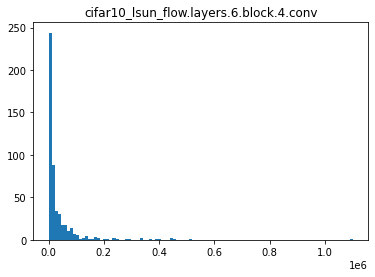

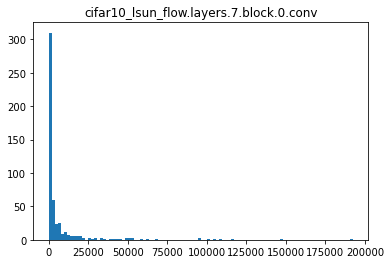

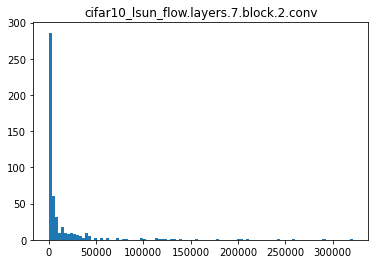

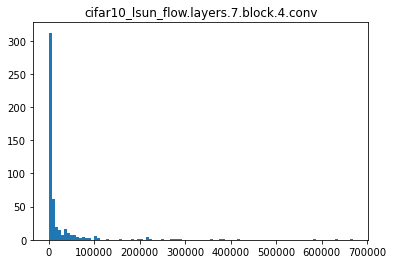

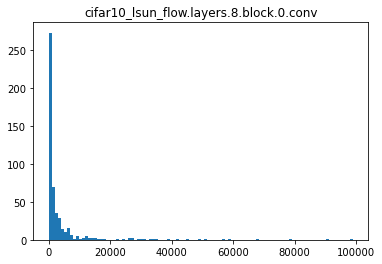

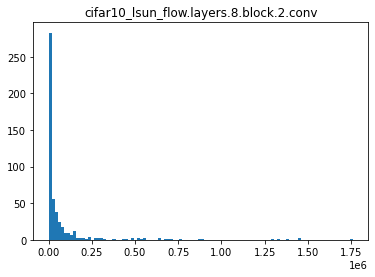

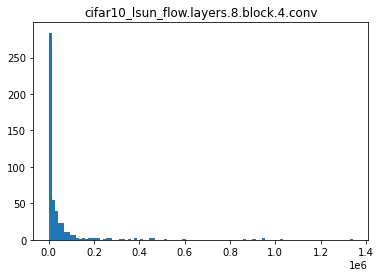

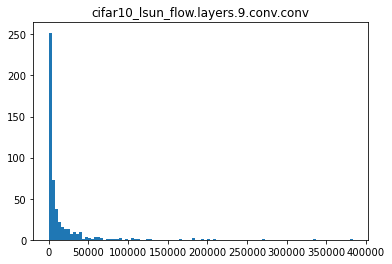

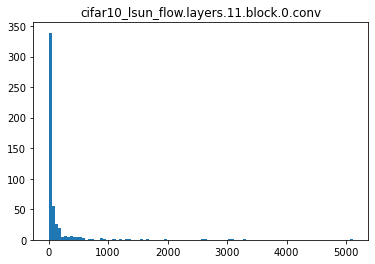

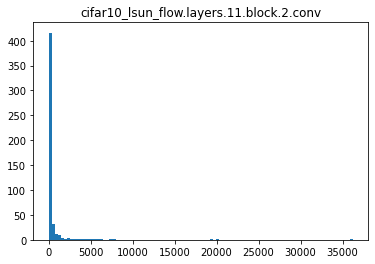

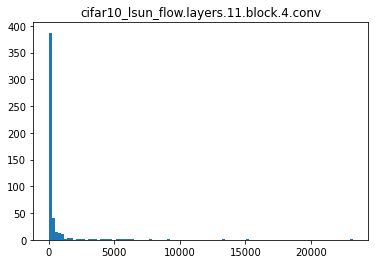

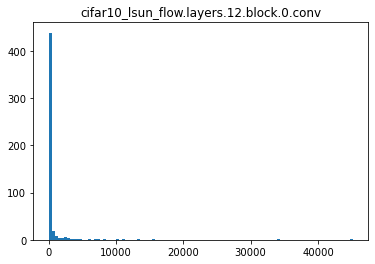

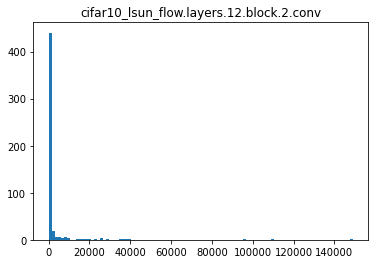

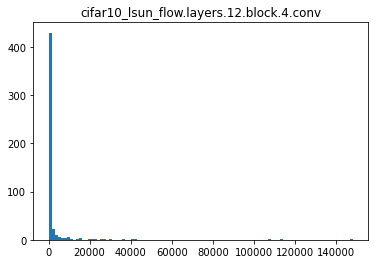

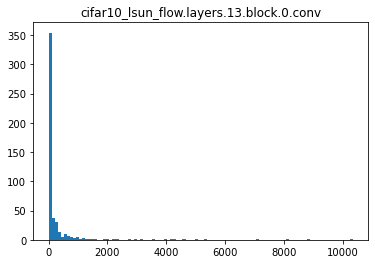

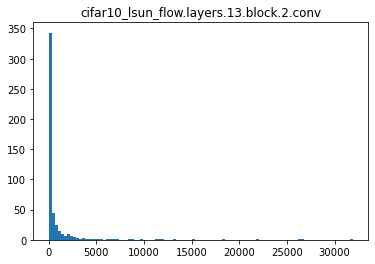

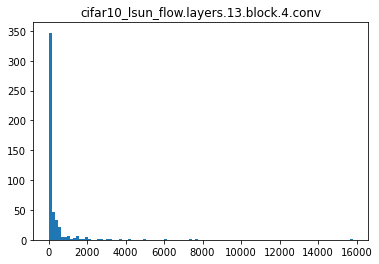

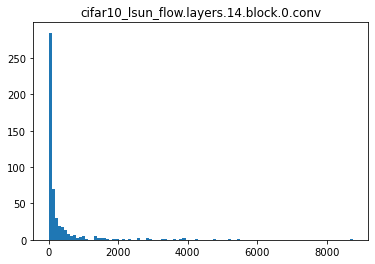

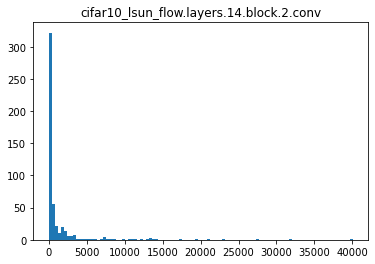

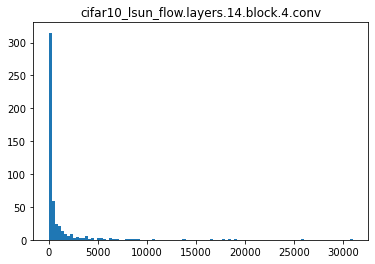

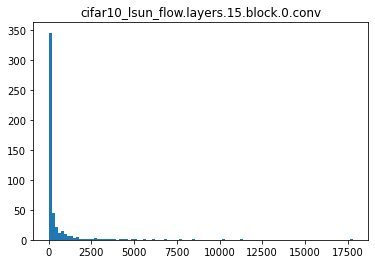

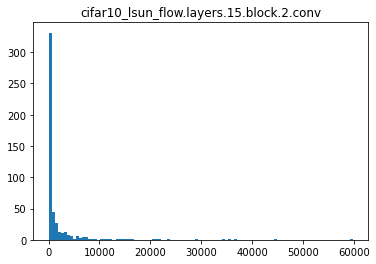

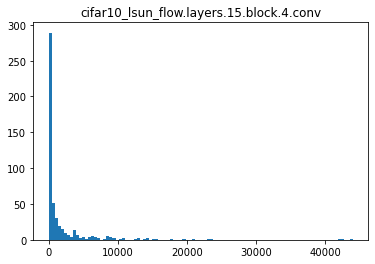

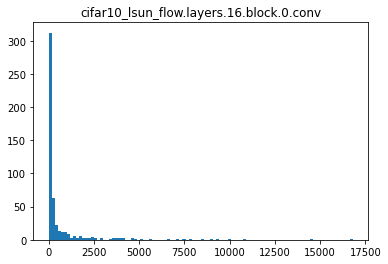

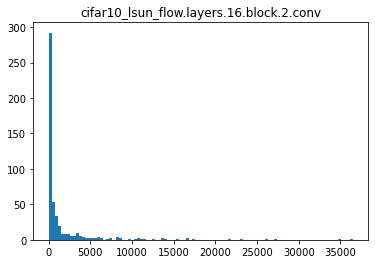

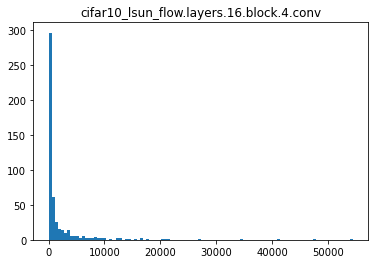

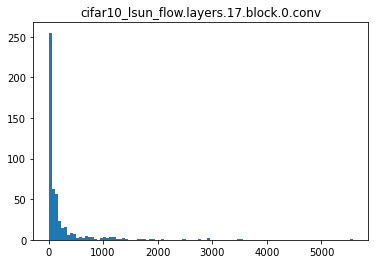

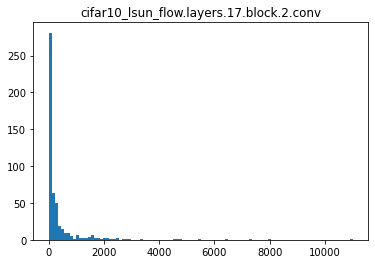

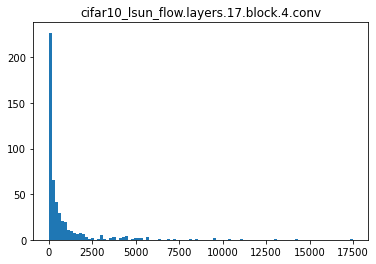

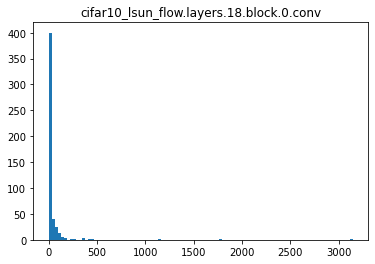

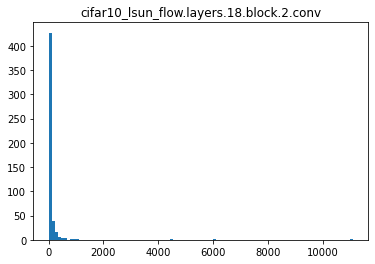

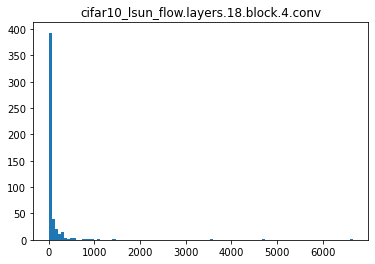

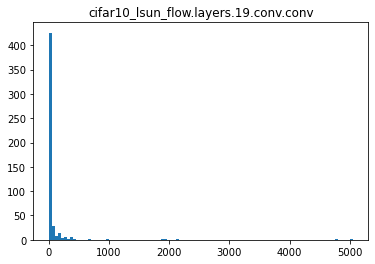

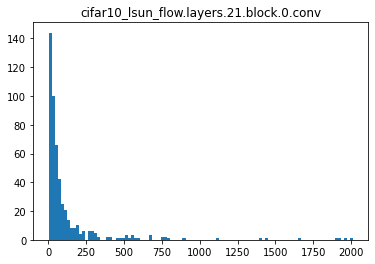

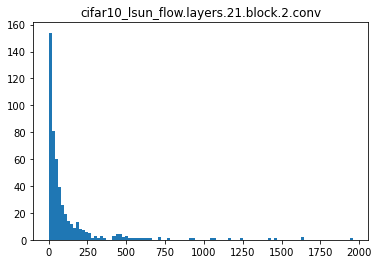

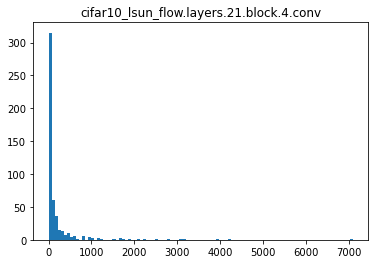

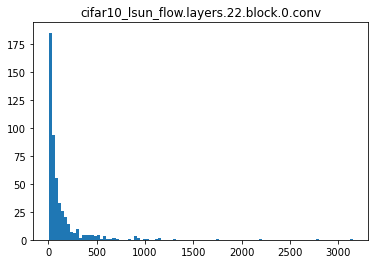

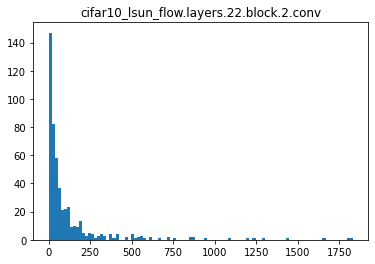

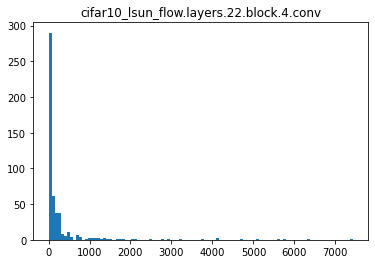

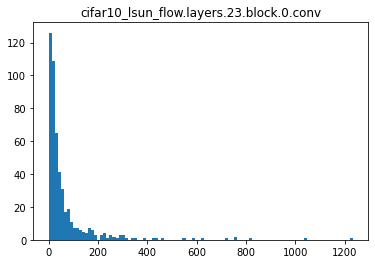

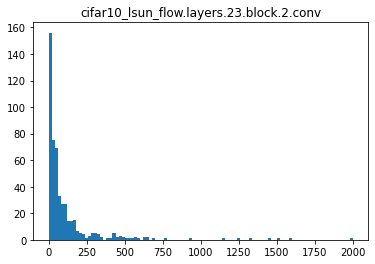

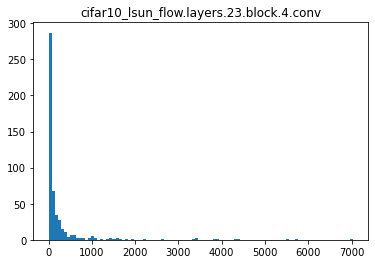

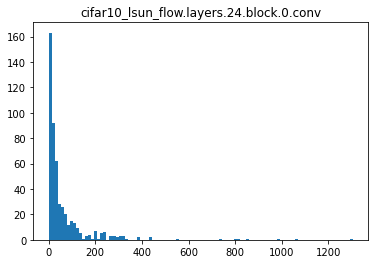

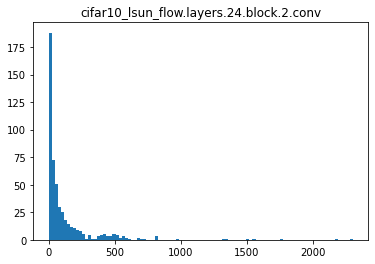

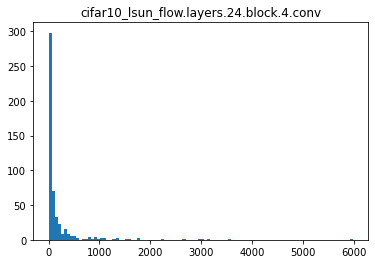

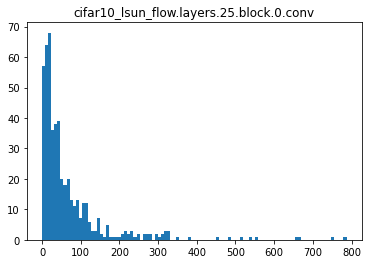

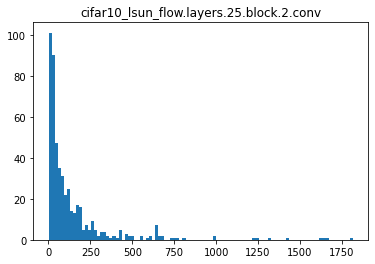

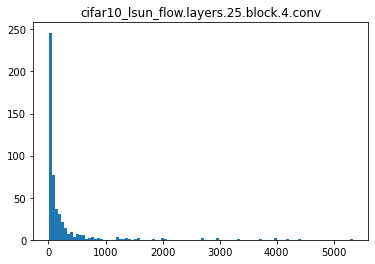

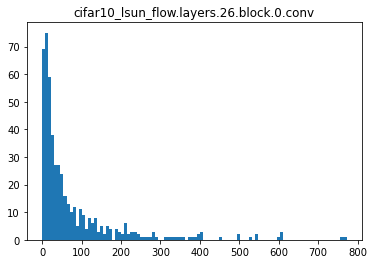

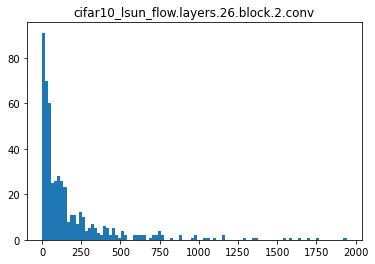

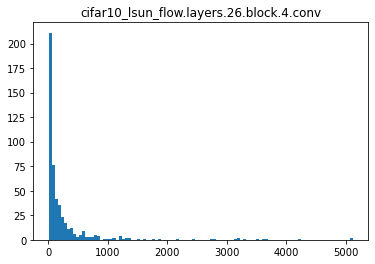

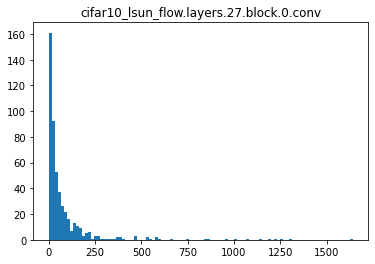

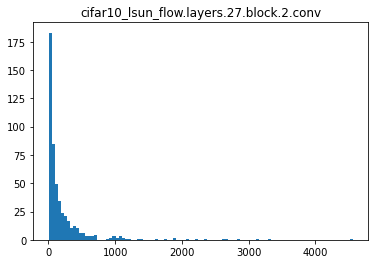

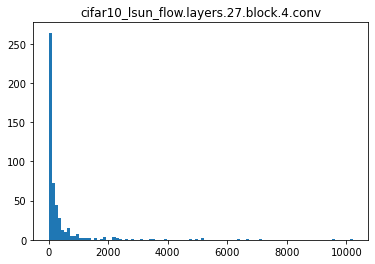

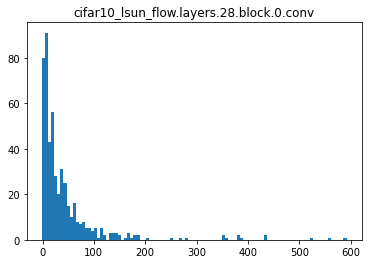

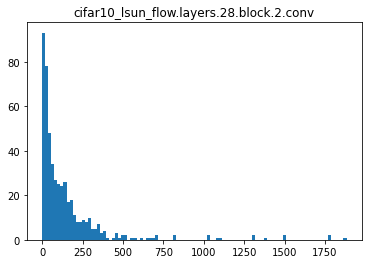

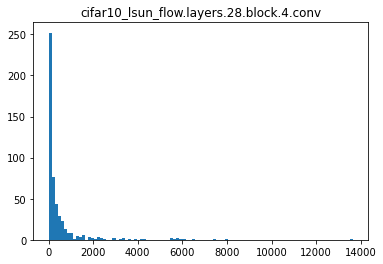

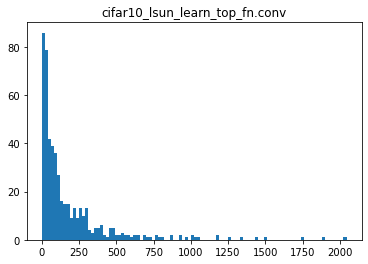

Calculate Score of mnist:   0%|                                                                                                                                                                                                                 | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of mnist:   5%|█████████▉                                                                                                                                                                                             | 499/10000 [00:54<17:23,  9.11step/s]


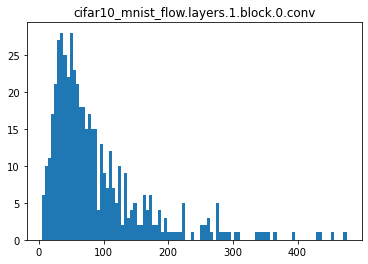

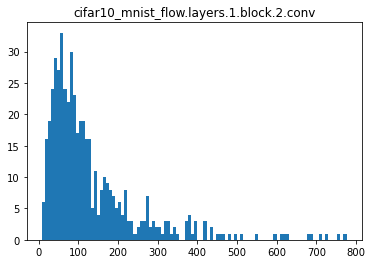

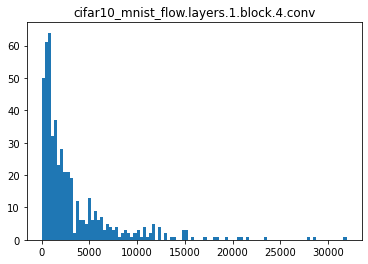

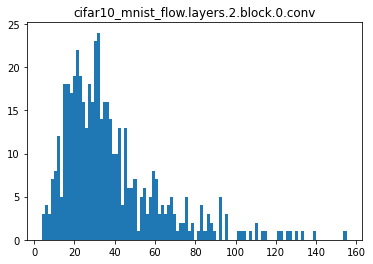

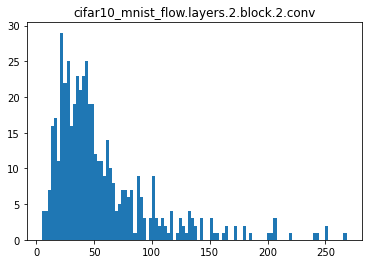

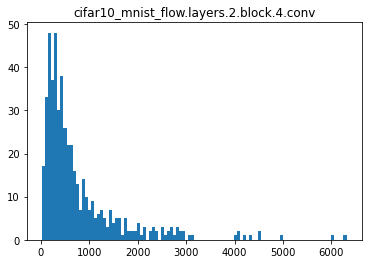

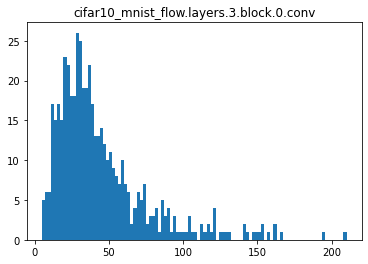

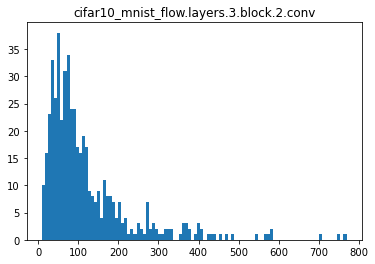

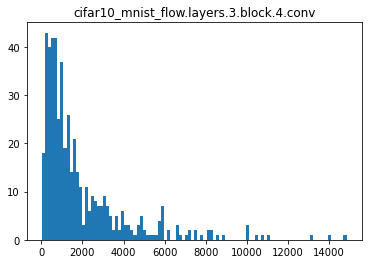

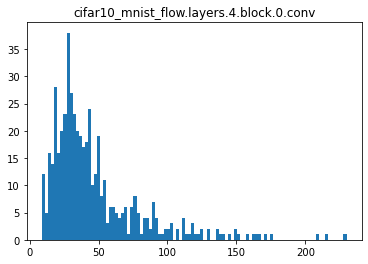

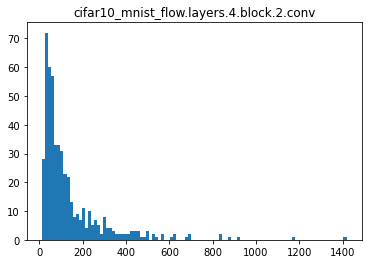

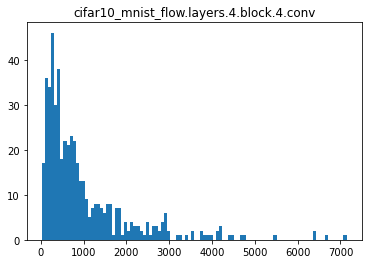

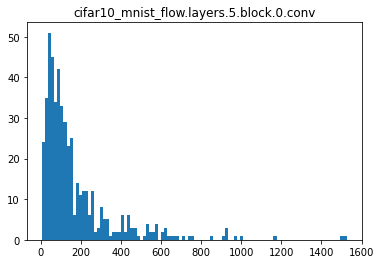

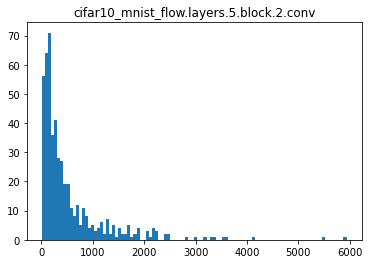

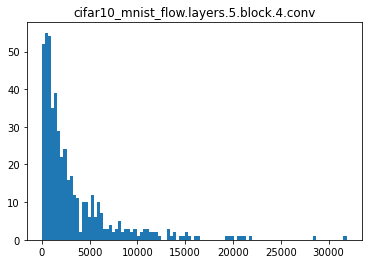

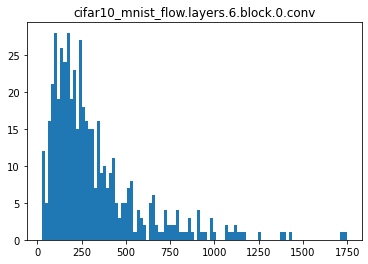

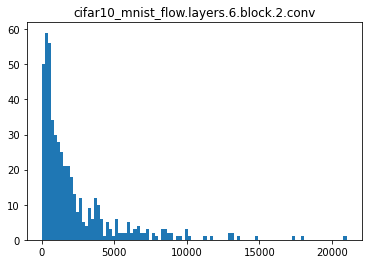

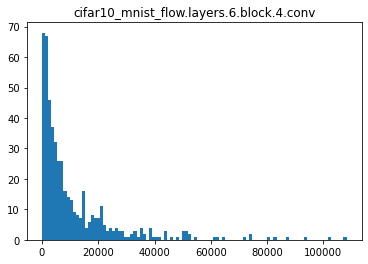

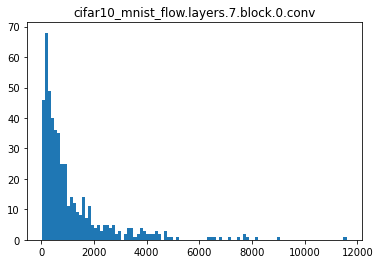

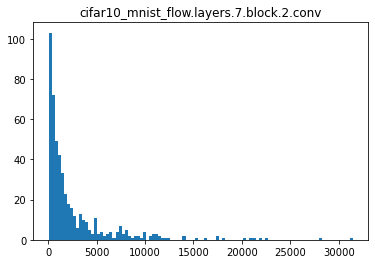

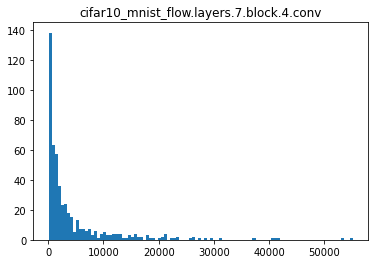

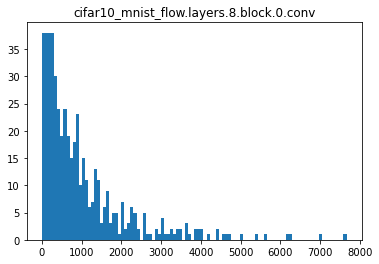

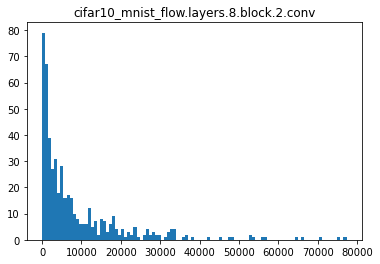

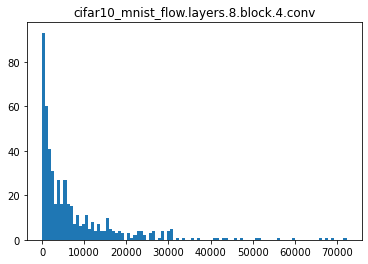

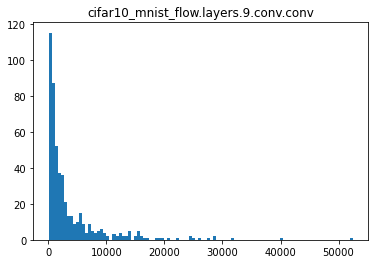

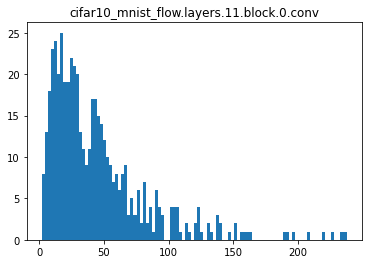

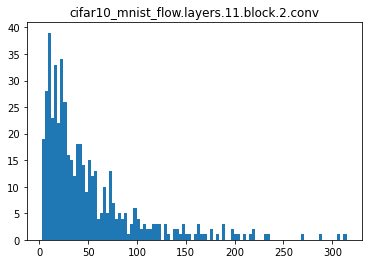

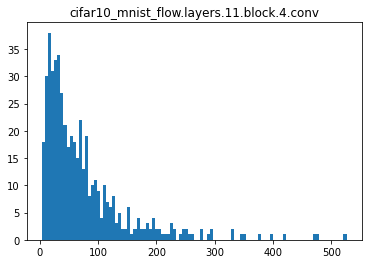

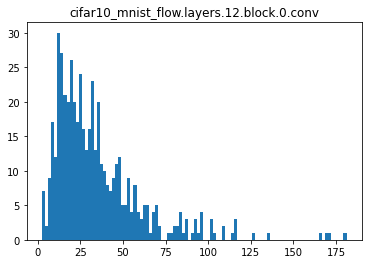

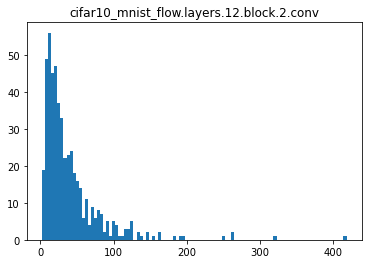

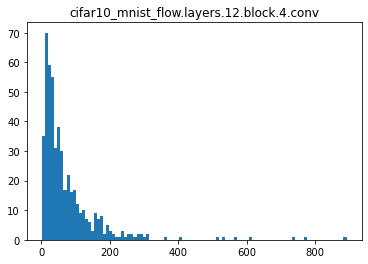

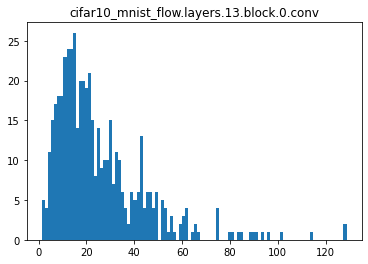

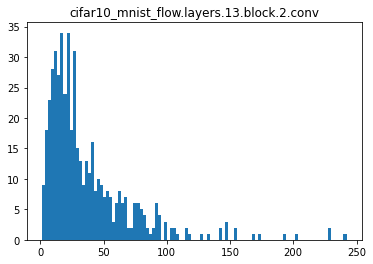

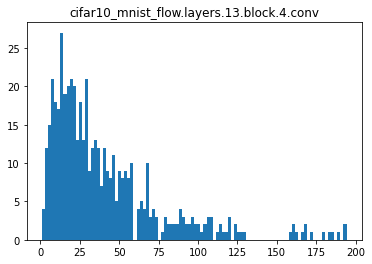

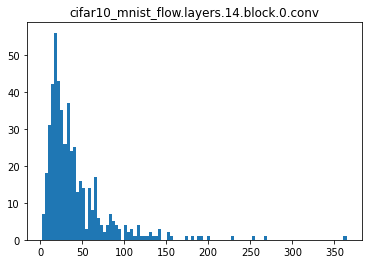

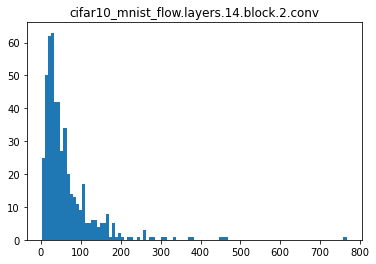

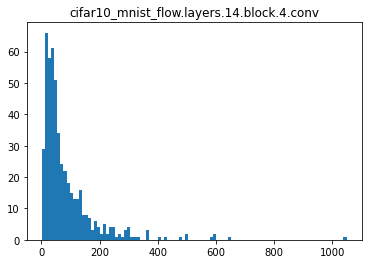

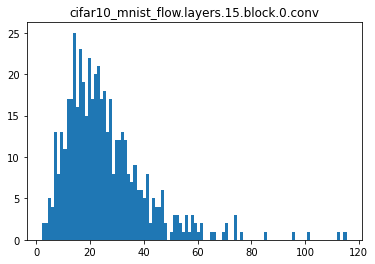

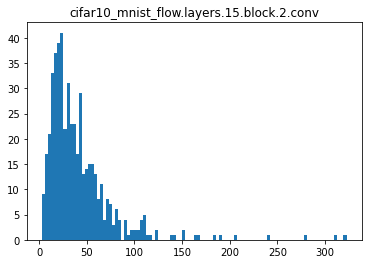

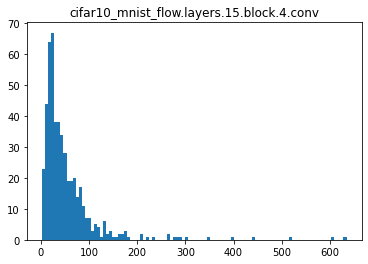

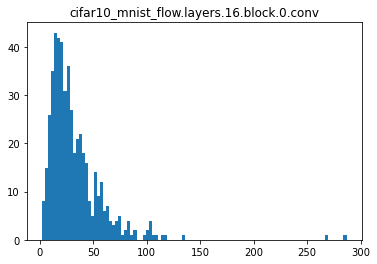

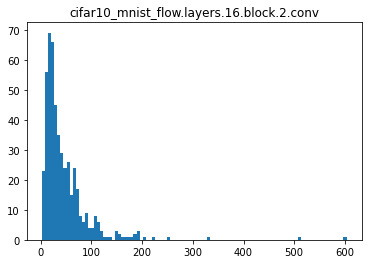

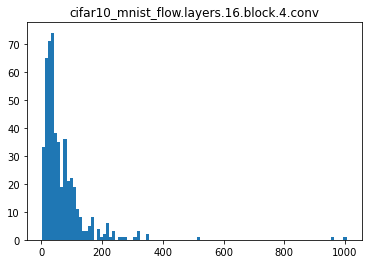

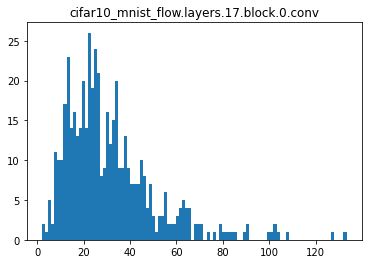

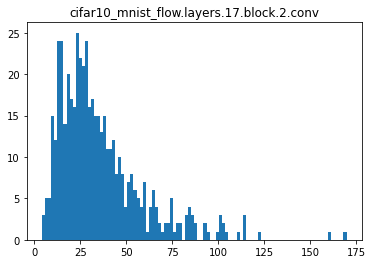

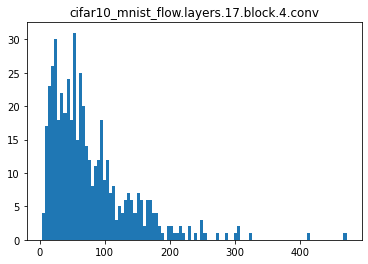

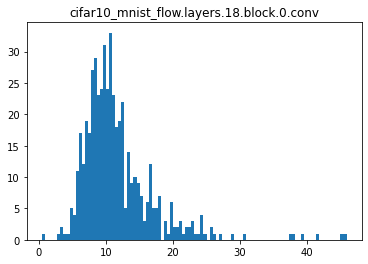

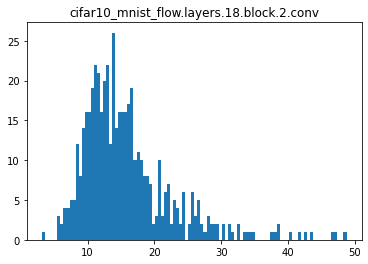

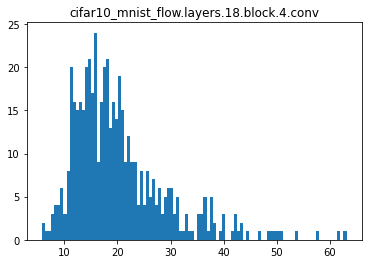

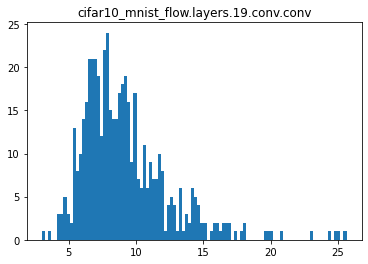

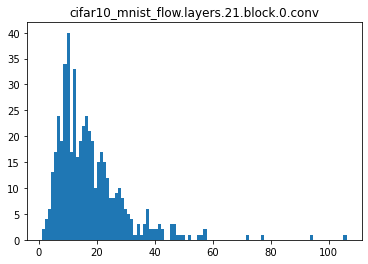

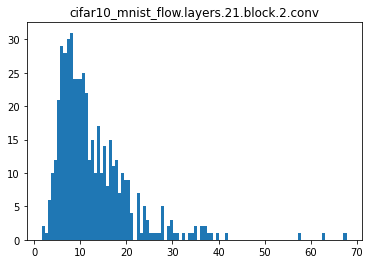

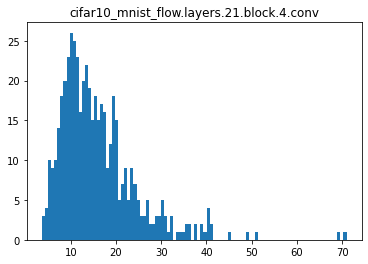

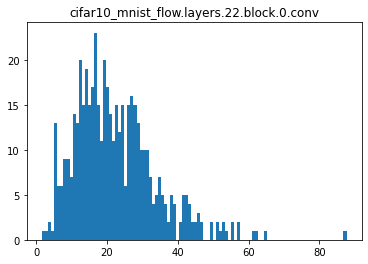

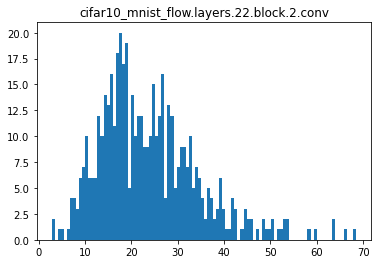

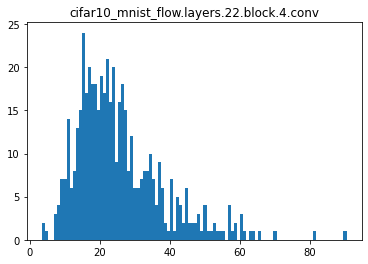

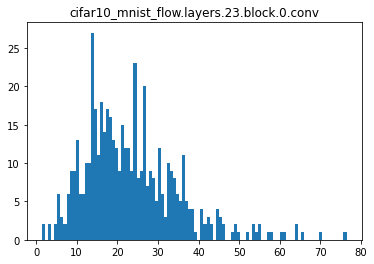

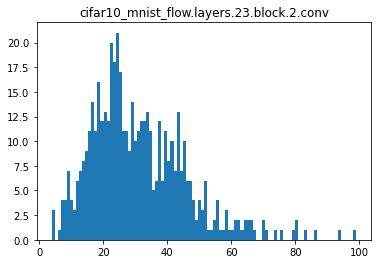

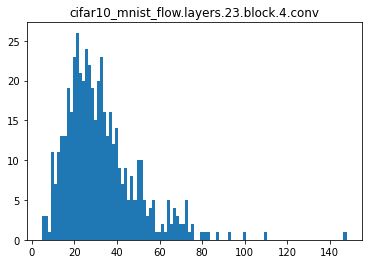

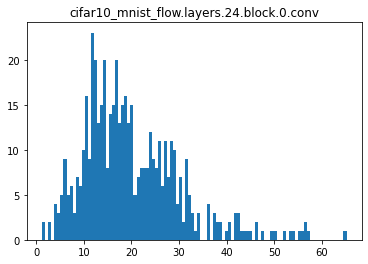

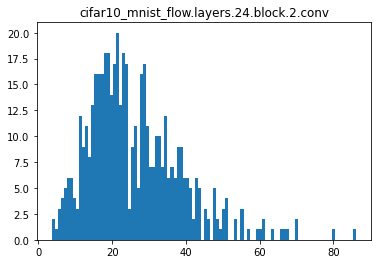

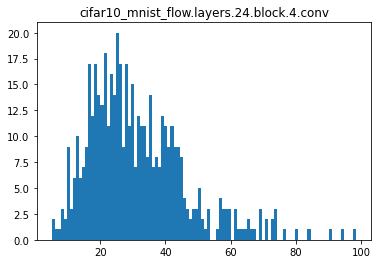

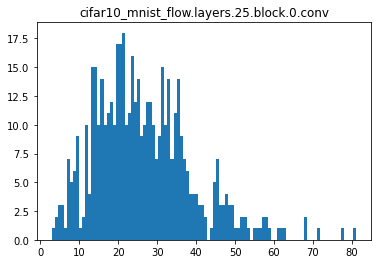

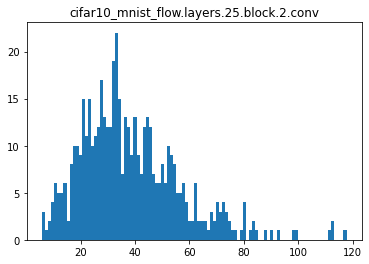

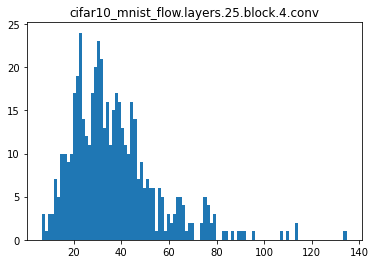

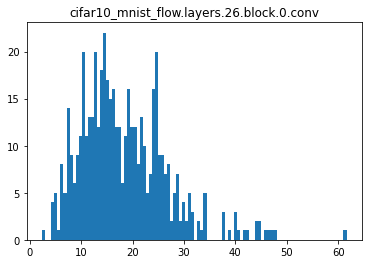

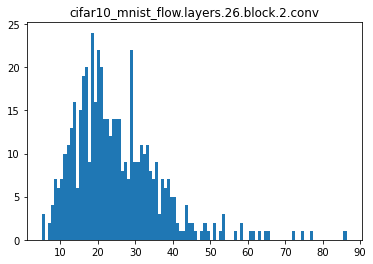

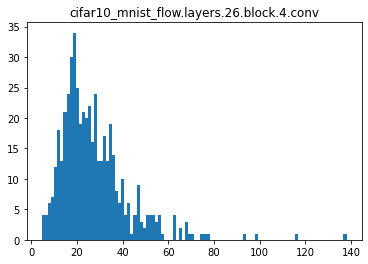

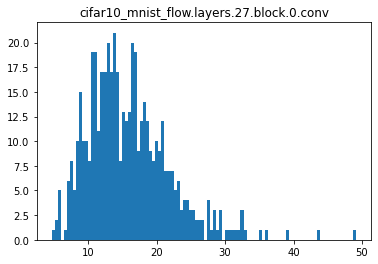

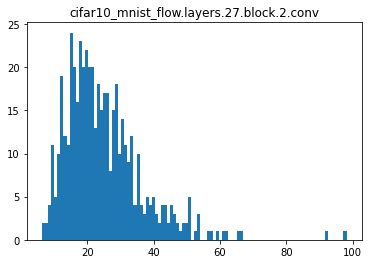

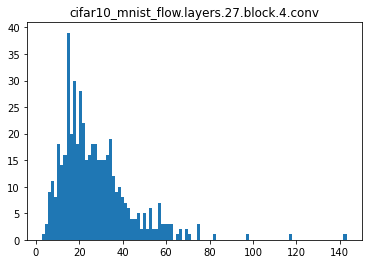

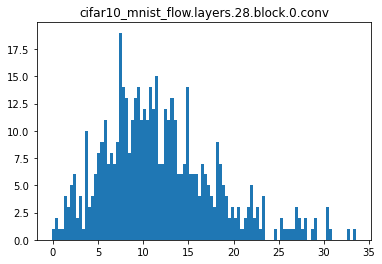

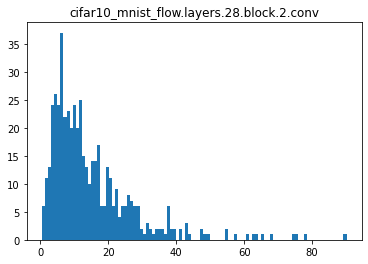

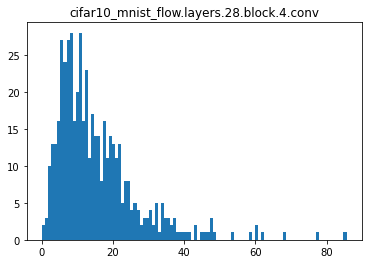

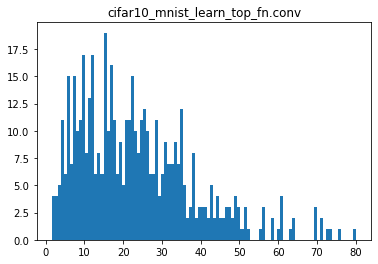

Calculate Score of fmnist:   0%|                                                                                                                                                                                                                | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of fmnist:   5%|█████████▉                                                                                                                                                                                            | 499/10000 [00:54<17:23,  9.10step/s]


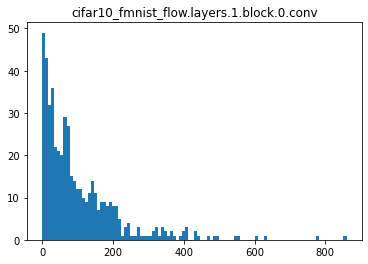

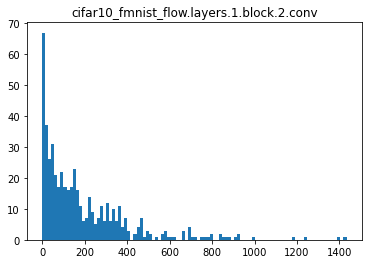

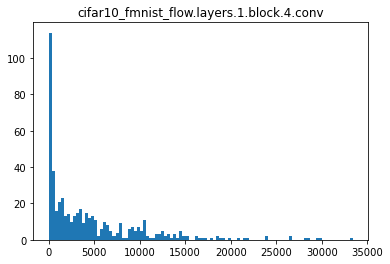

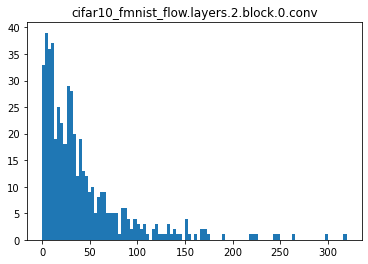

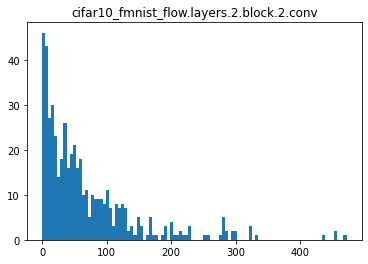

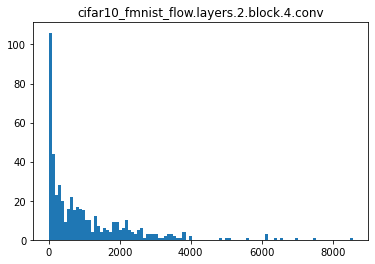

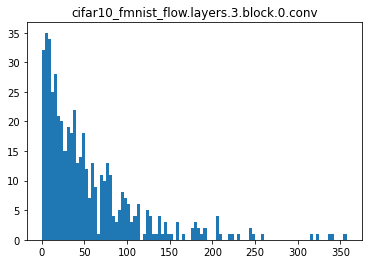

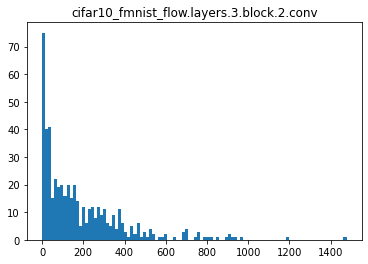

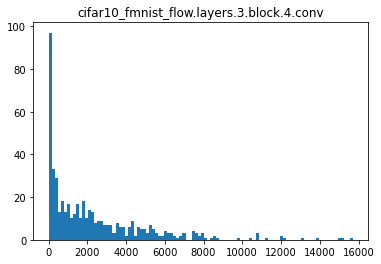

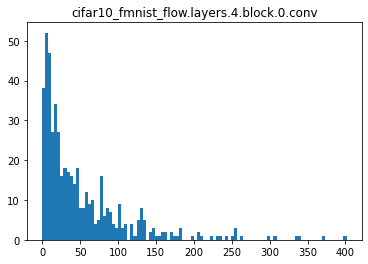

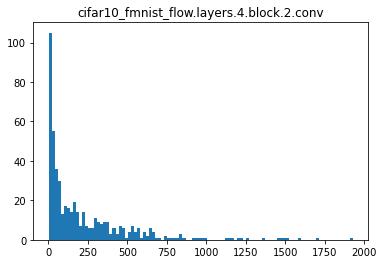

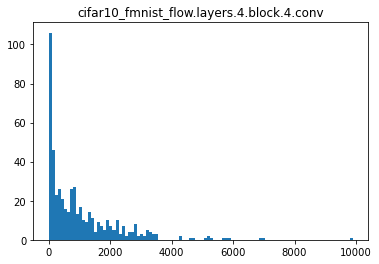

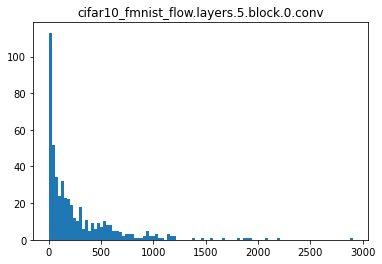

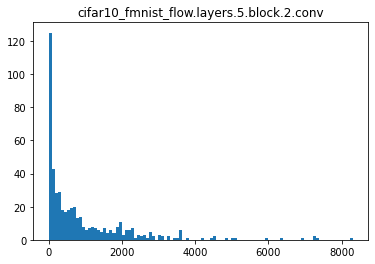

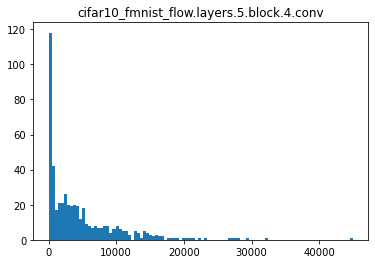

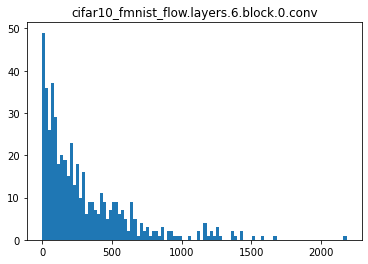

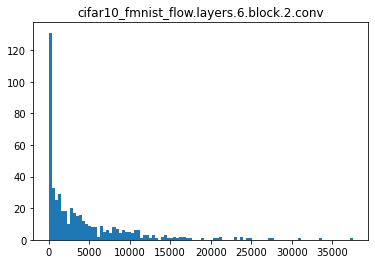

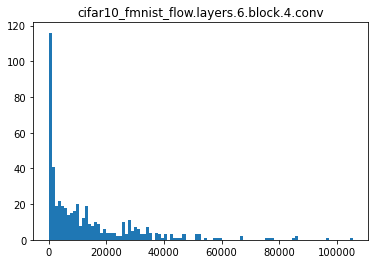

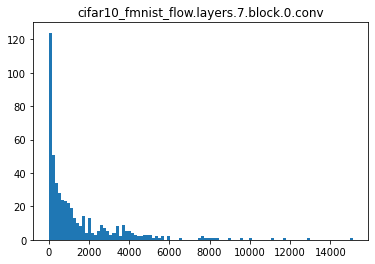

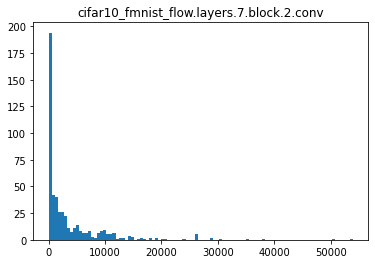

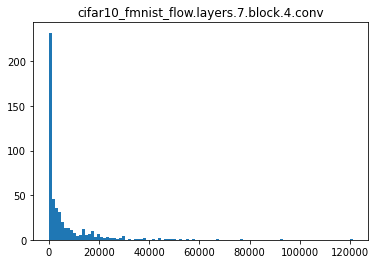

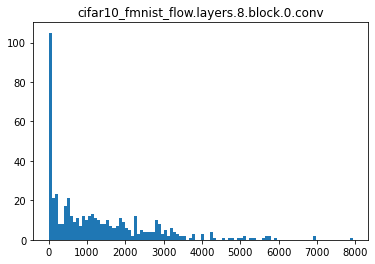

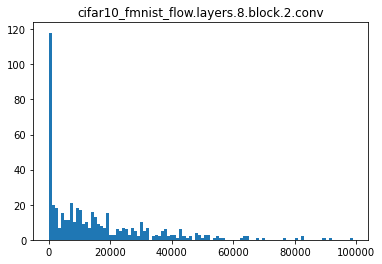

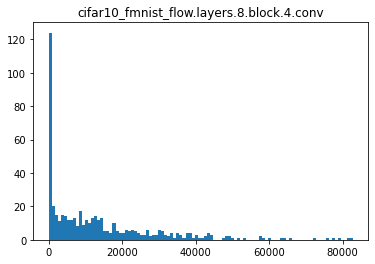

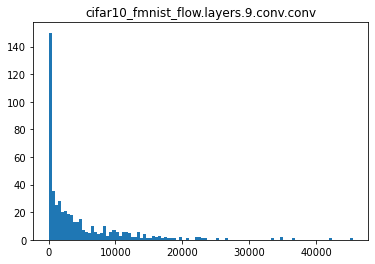

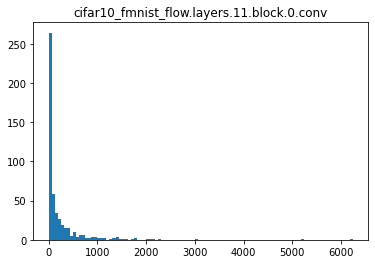

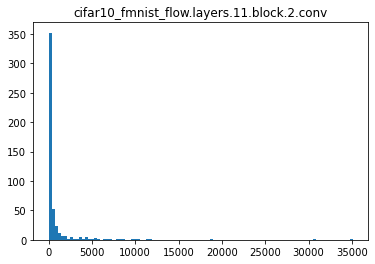

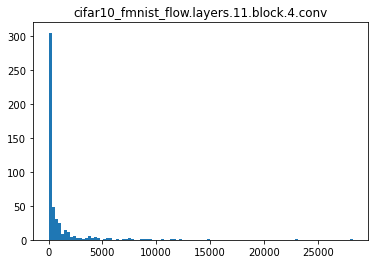

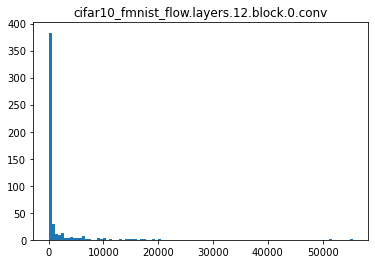

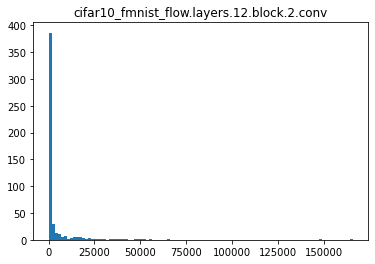

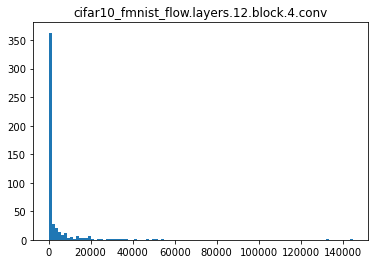

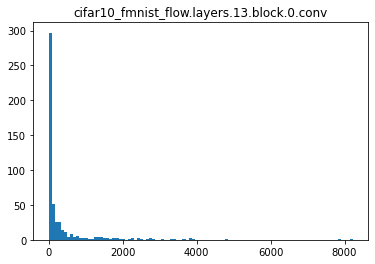

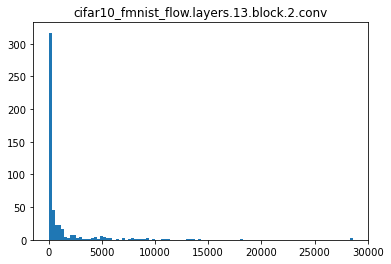

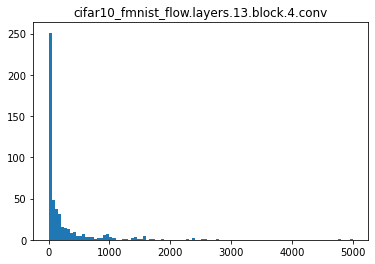

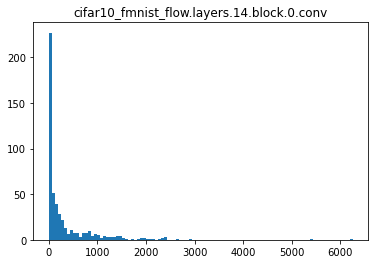

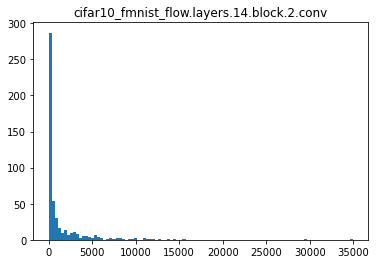

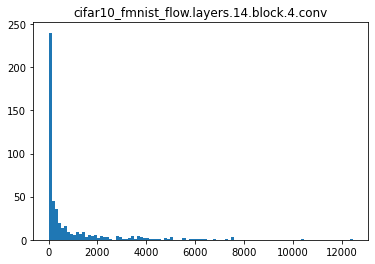

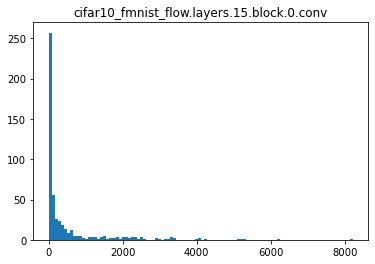

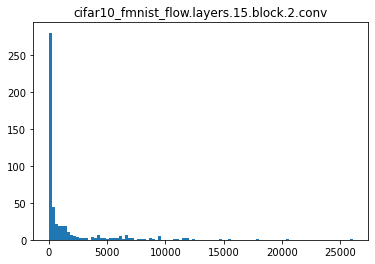

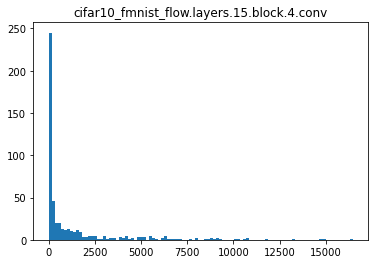

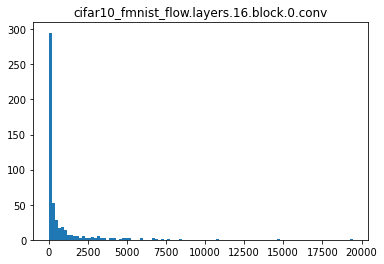

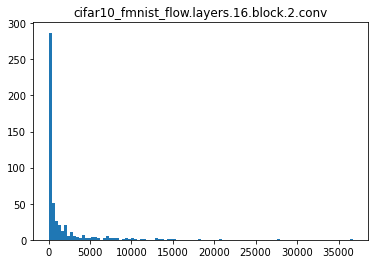

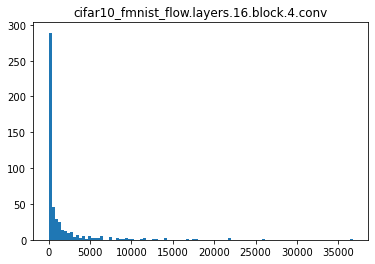

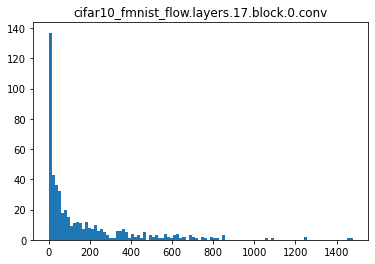

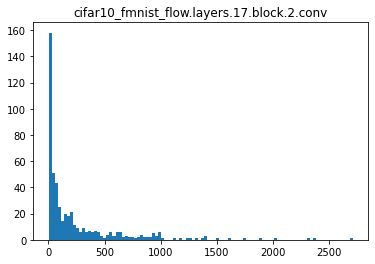

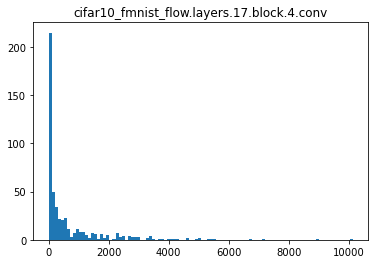

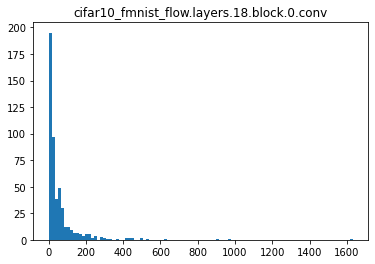

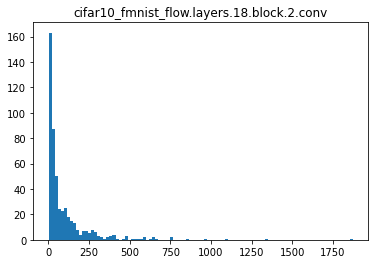

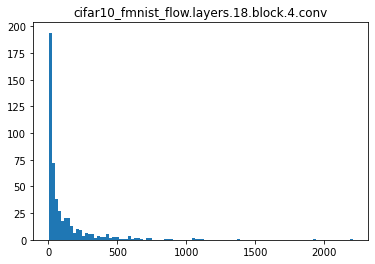

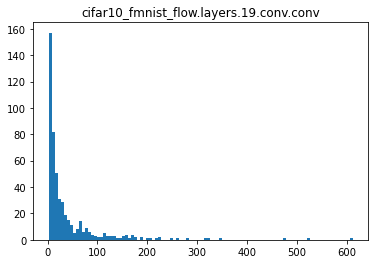

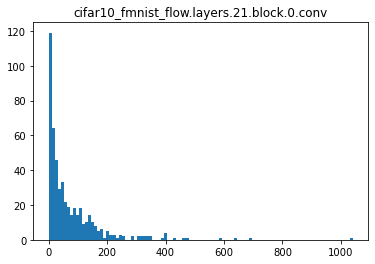

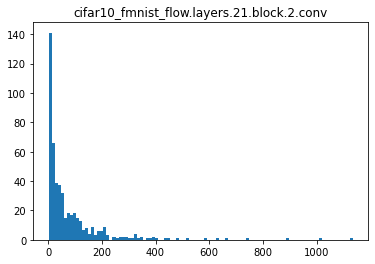

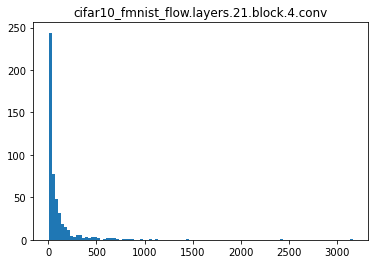

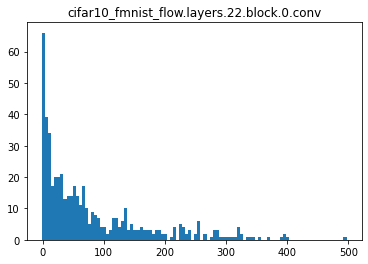

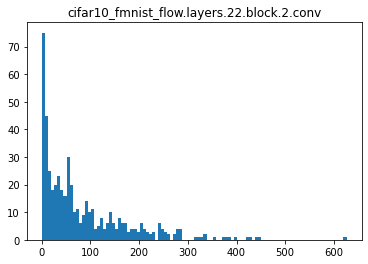

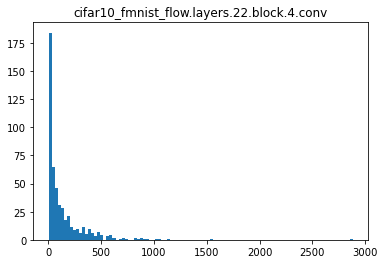

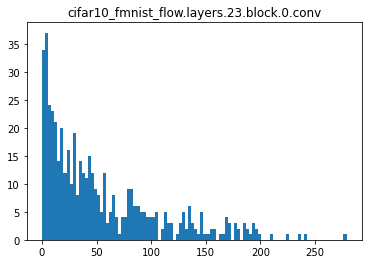

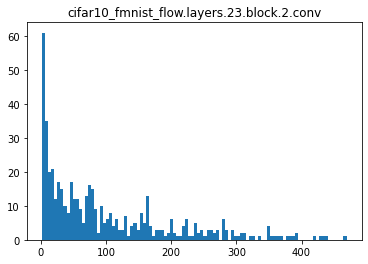

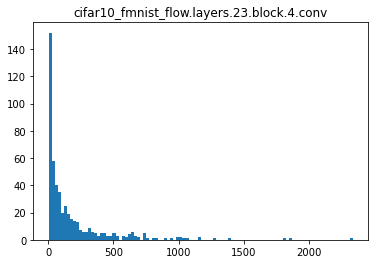

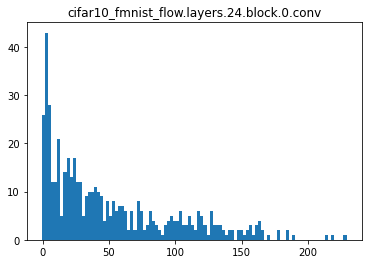

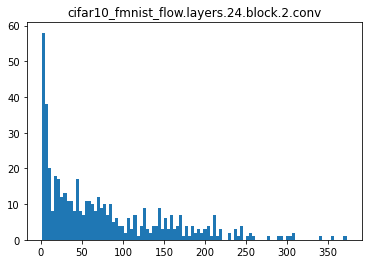

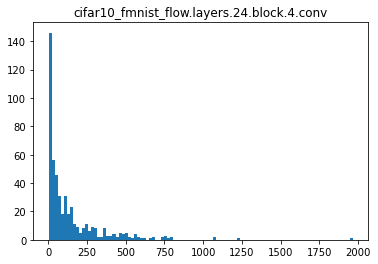

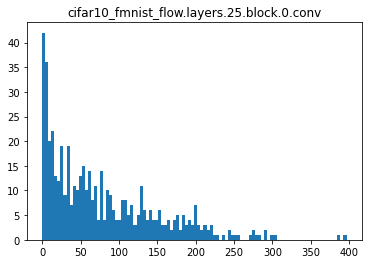

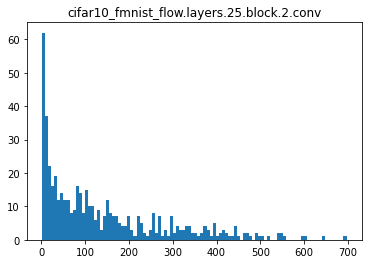

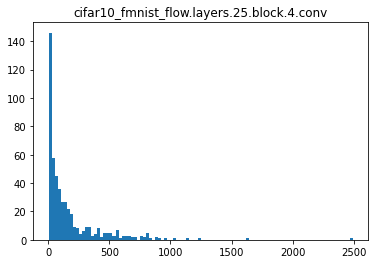

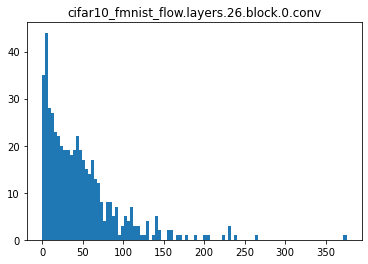

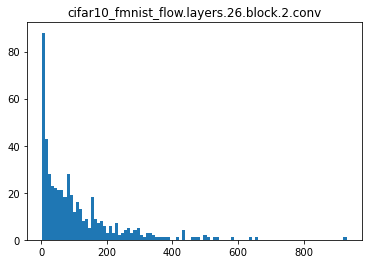

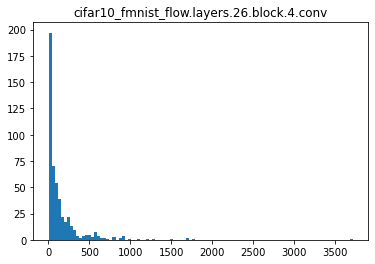

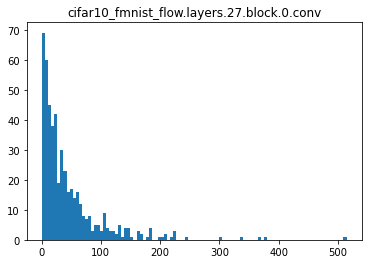

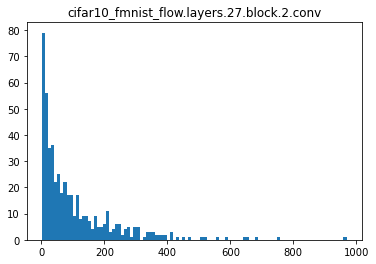

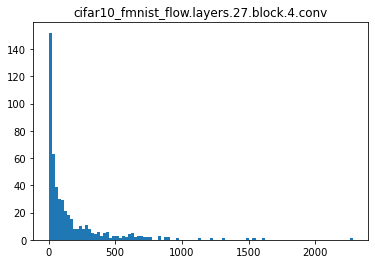

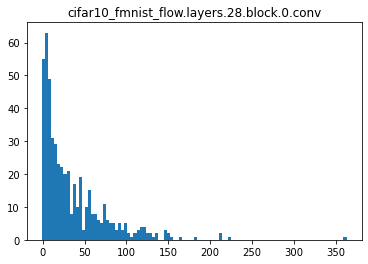

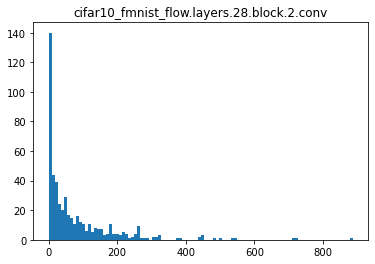

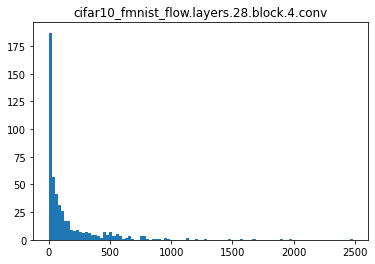

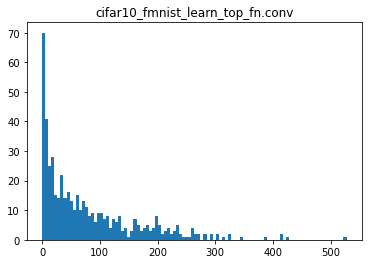

Calculate Score of kmnist:   0%|                                                                                                                                                                                                                | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of kmnist:   5%|█████████▉                                                                                                                                                                                            | 499/10000 [00:54<17:22,  9.11step/s]


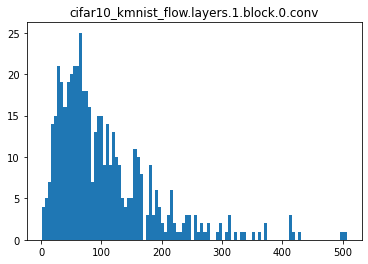

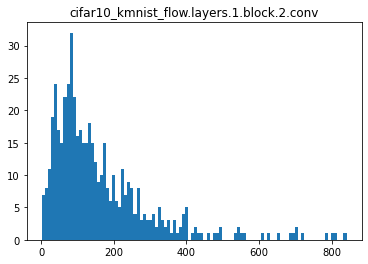

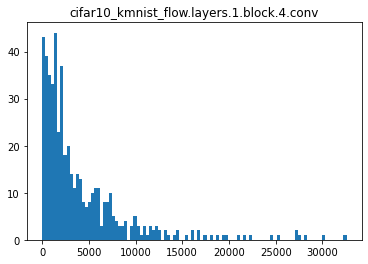

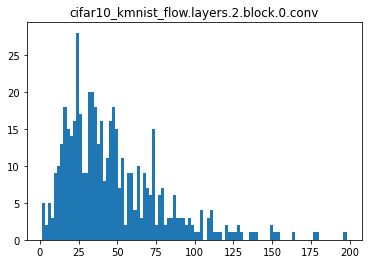

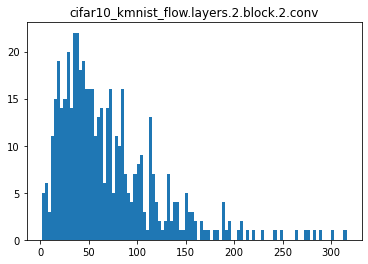

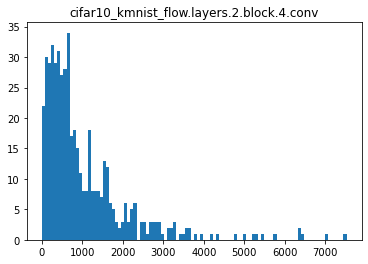

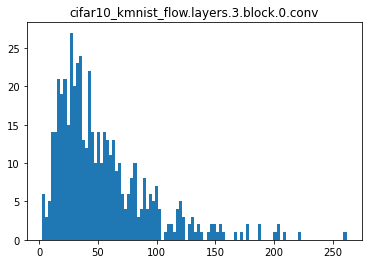

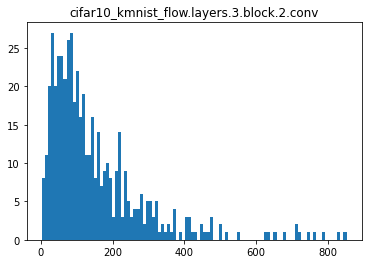

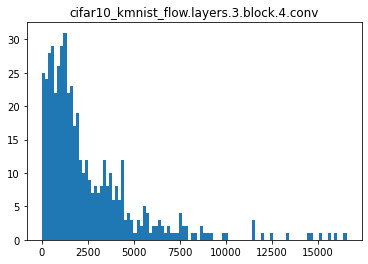

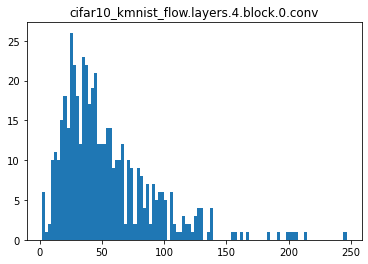

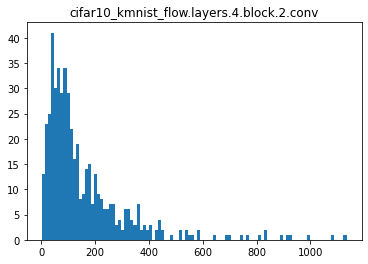

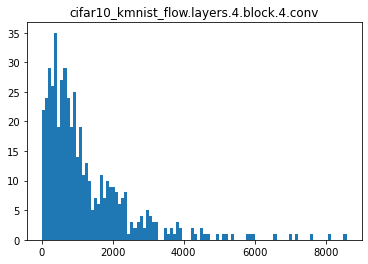

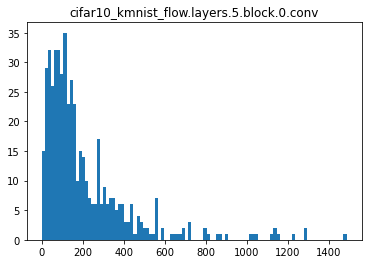

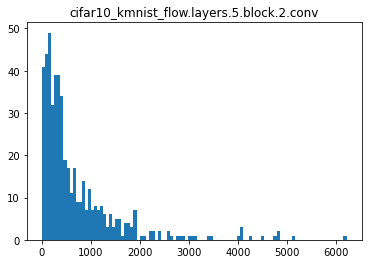

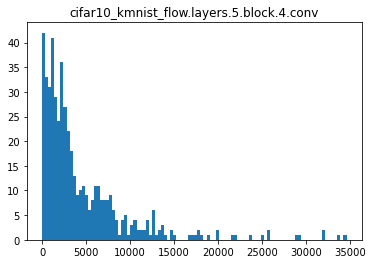

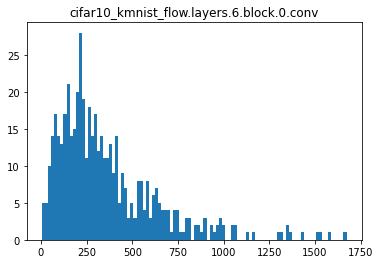

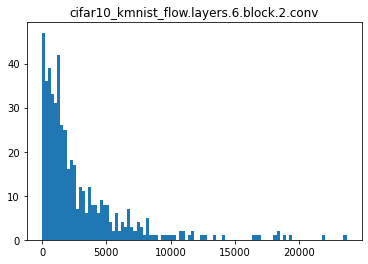

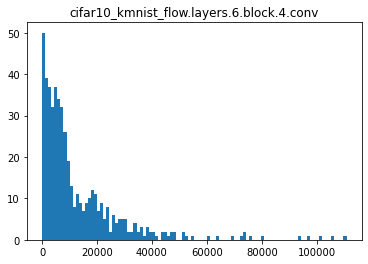

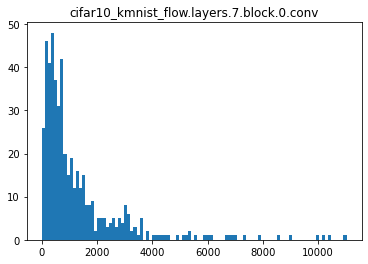

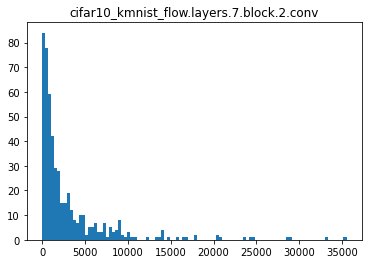

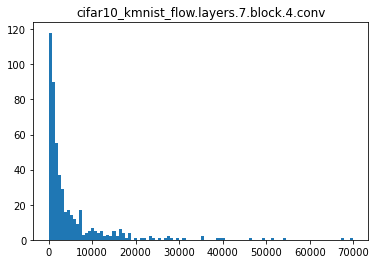

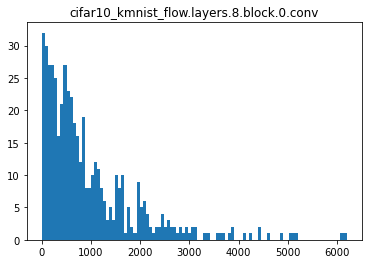

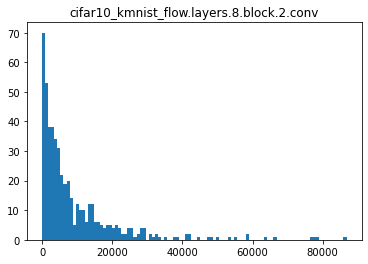

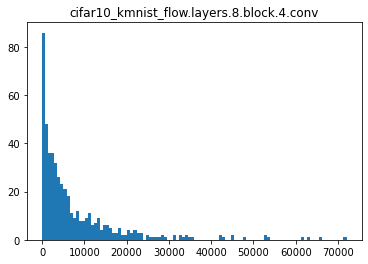

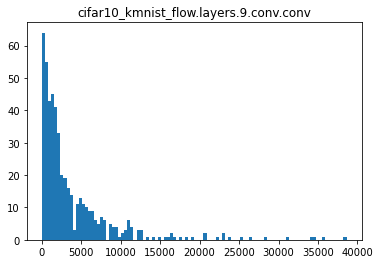

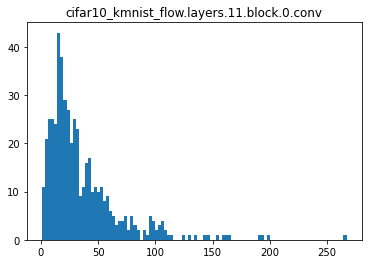

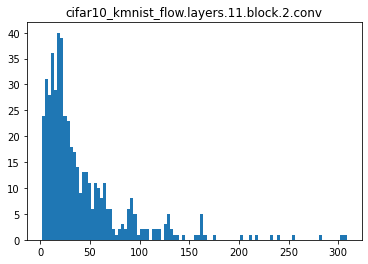

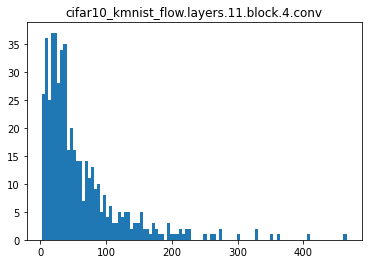

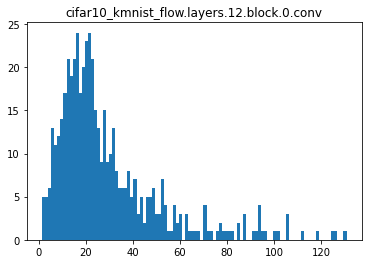

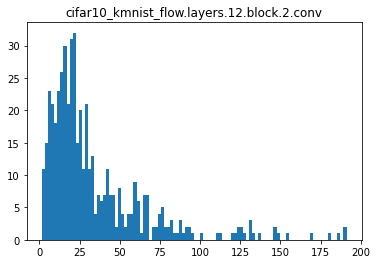

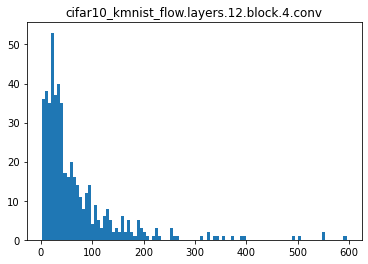

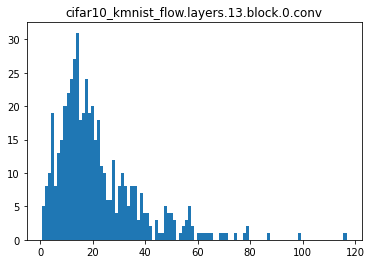

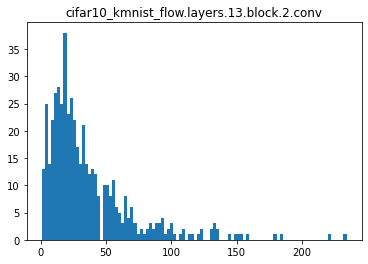

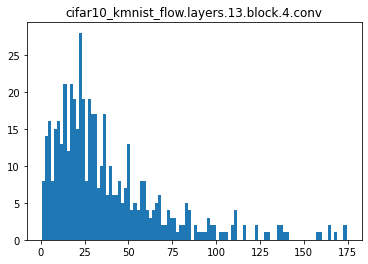

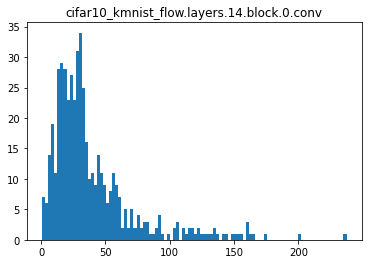

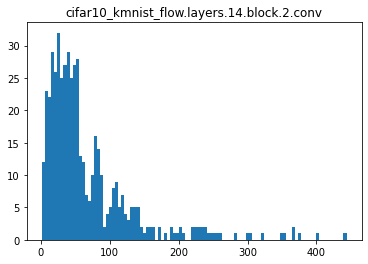

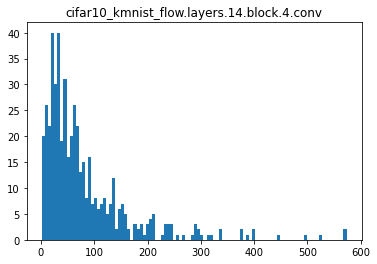

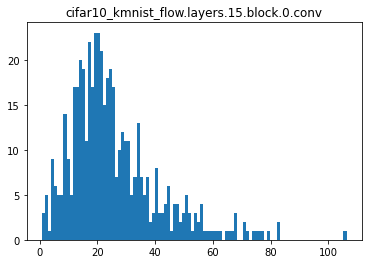

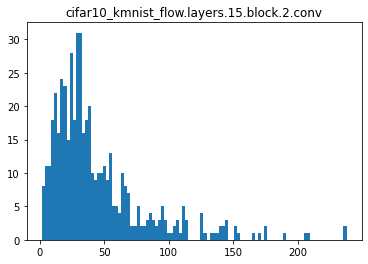

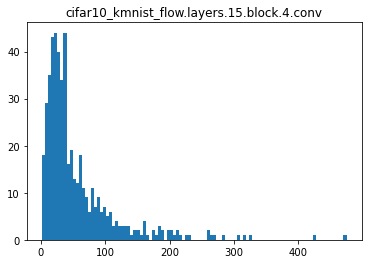

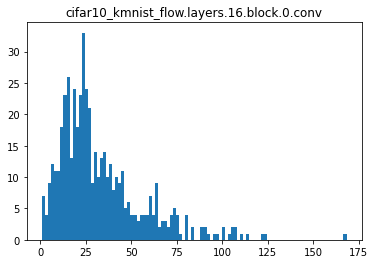

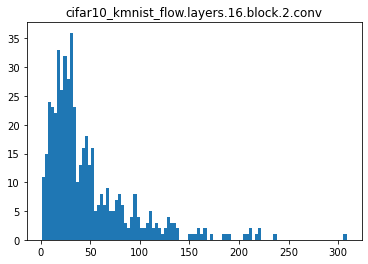

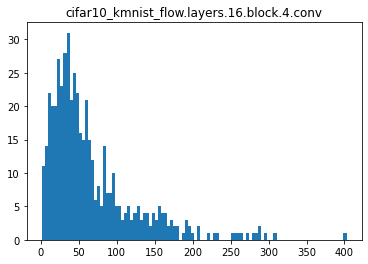

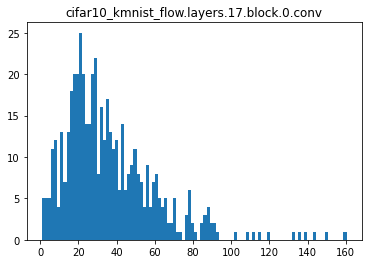

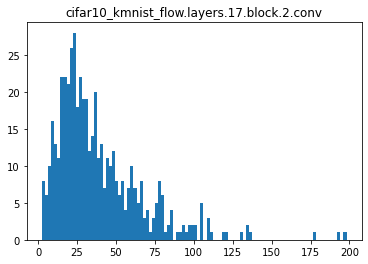

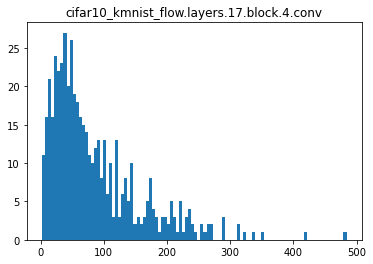

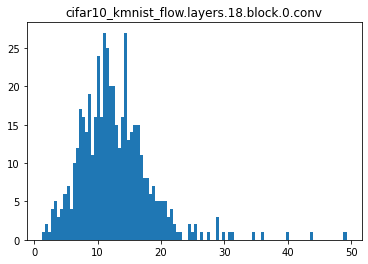

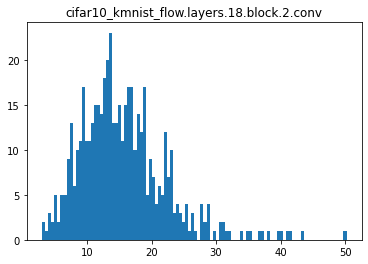

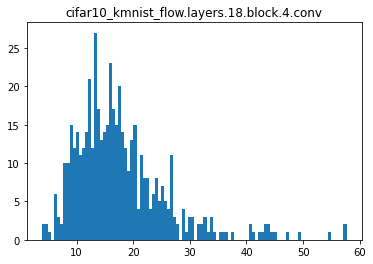

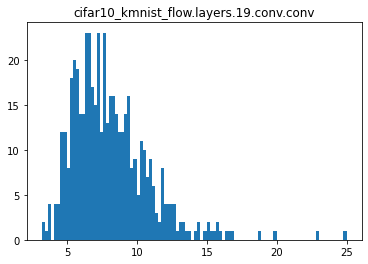

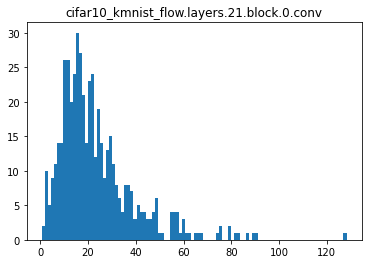

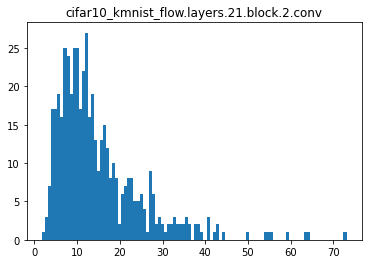

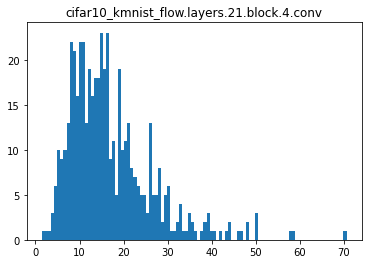

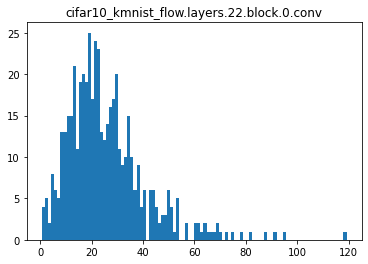

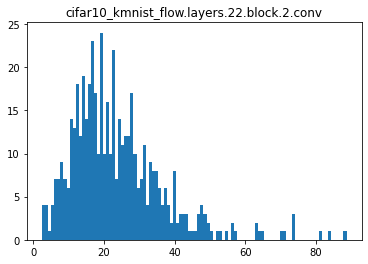

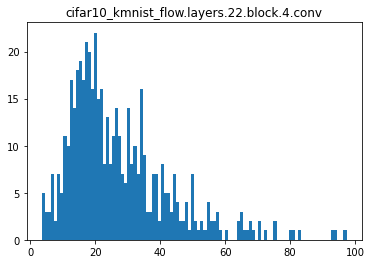

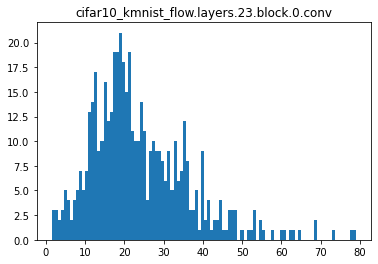

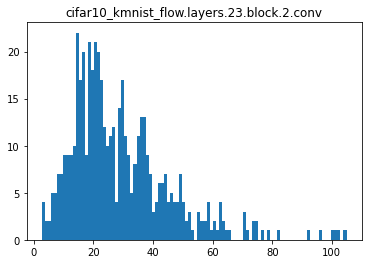

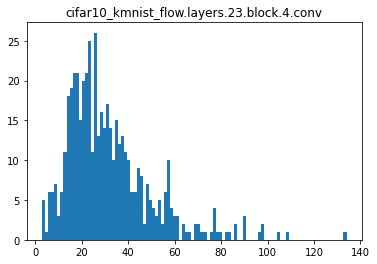

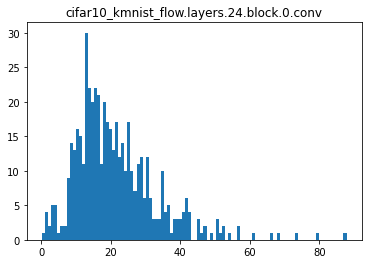

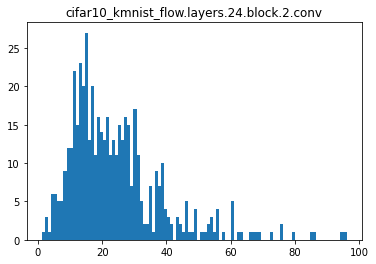

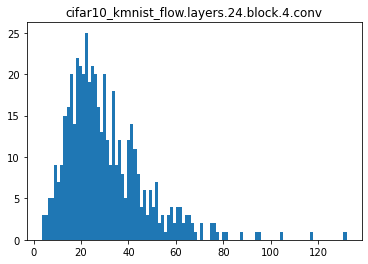

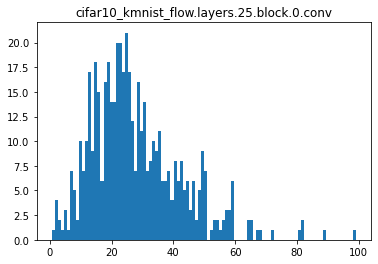

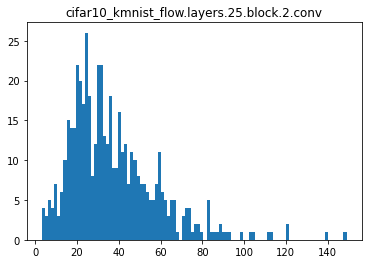

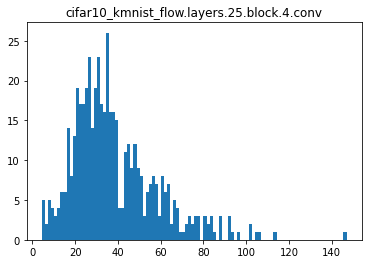

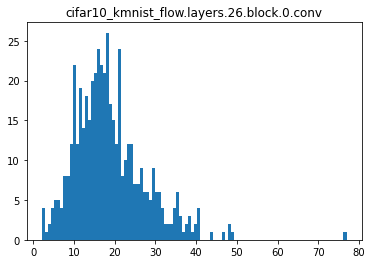

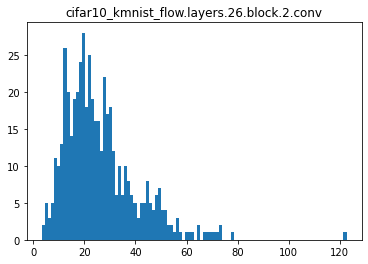

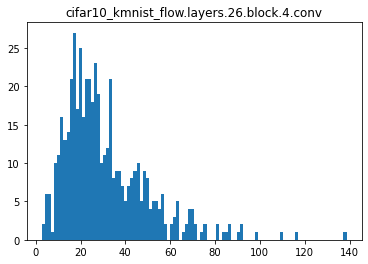

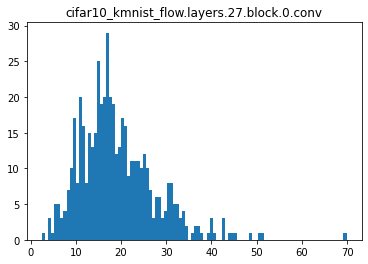

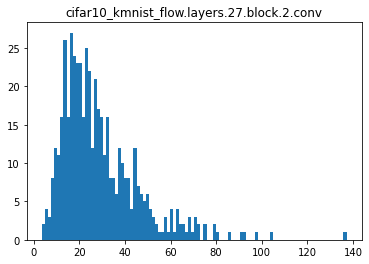

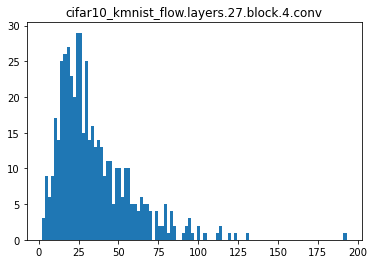

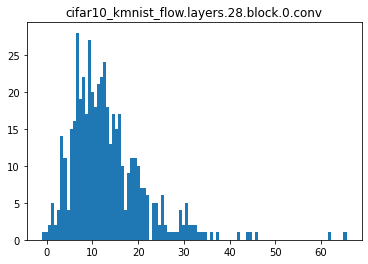

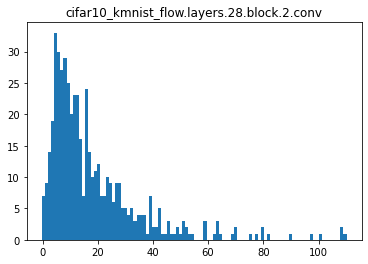

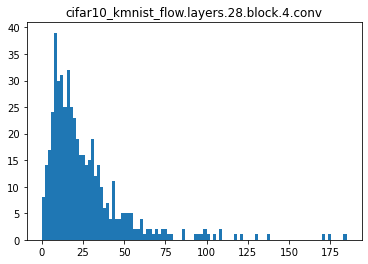

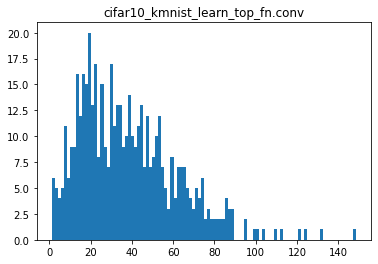

Files already downloaded and verified


Calculate Score of omniglot:   0%|                                                                                                                                                                                                              | 0/13180 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of omniglot:   4%|███████▍                                                                                                                                                                                            | 499/13180 [00:55<23:24,  9.03step/s]


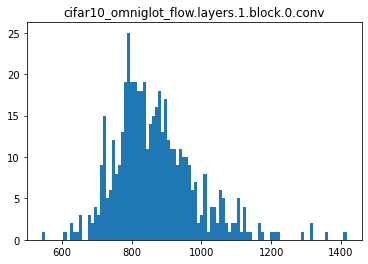

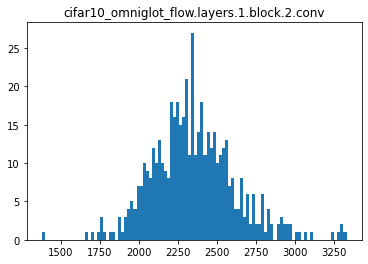

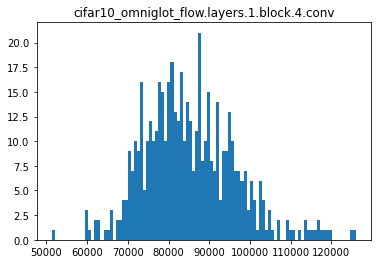

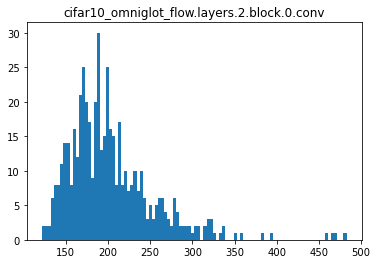

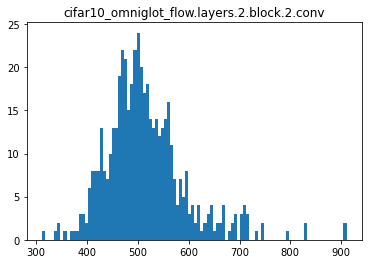

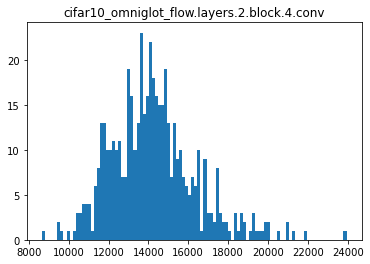

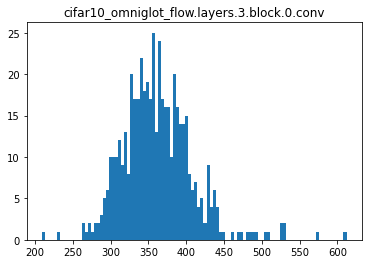

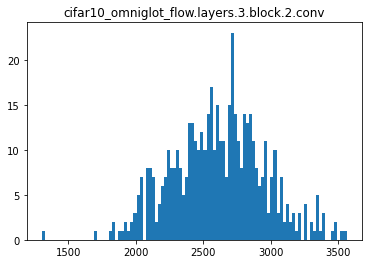

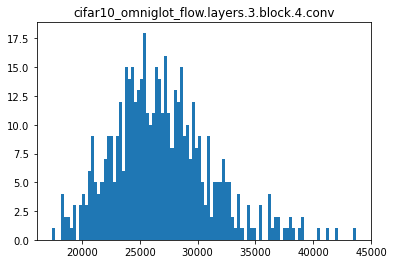

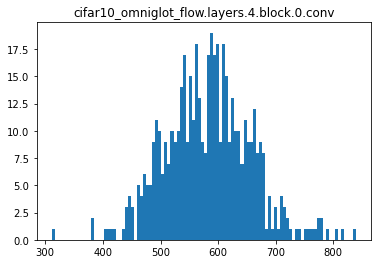

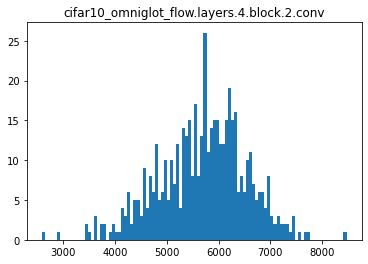

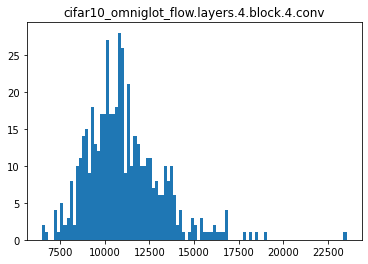

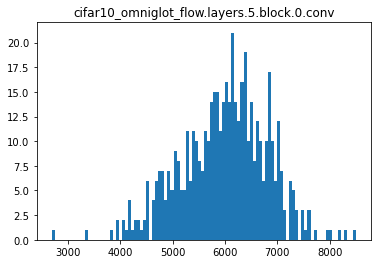

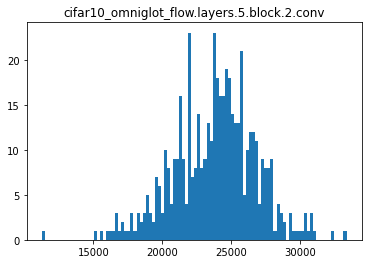

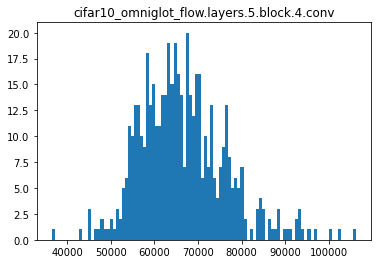

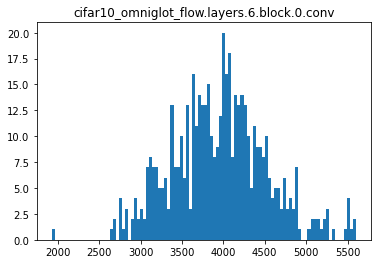

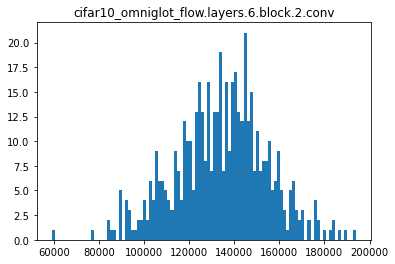

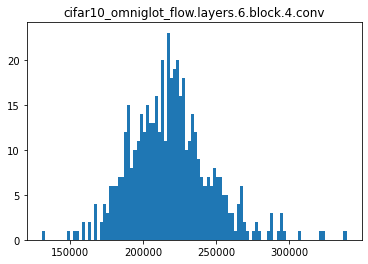

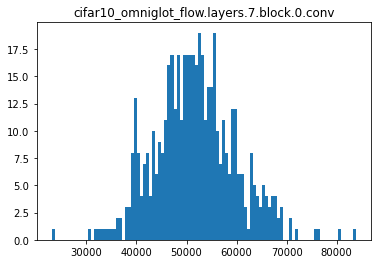

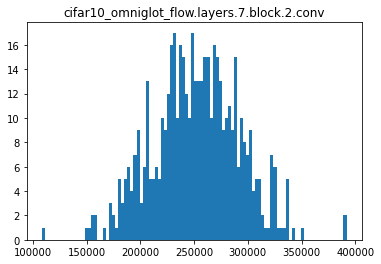

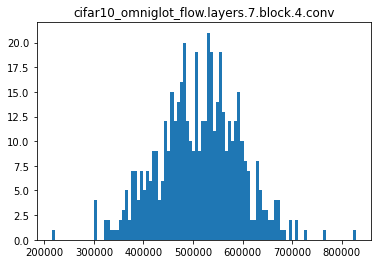

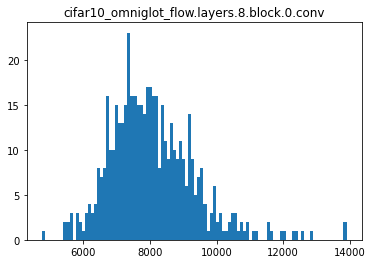

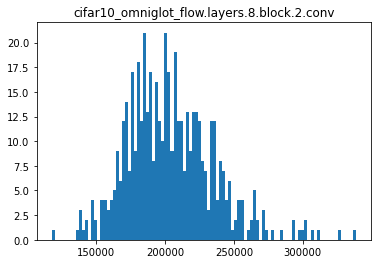

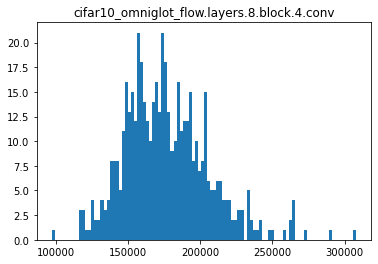

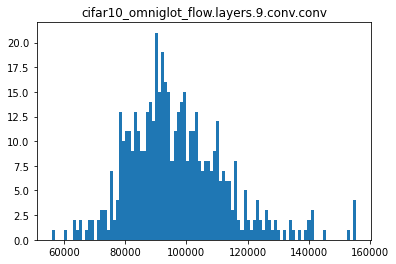

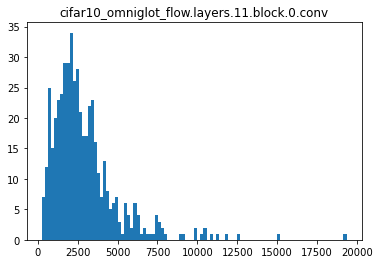

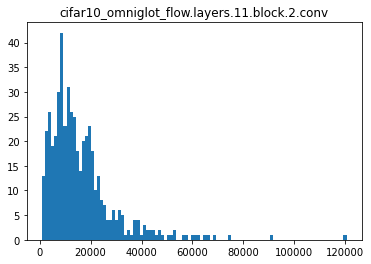

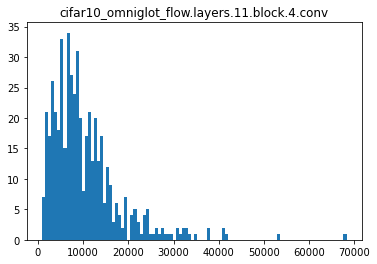

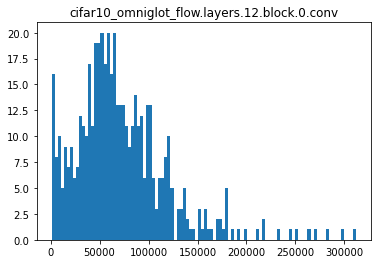

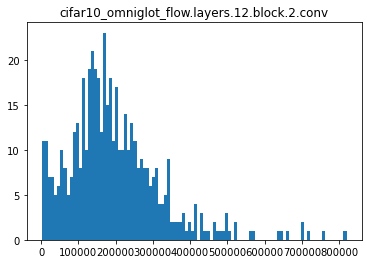

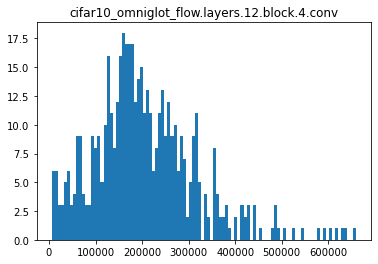

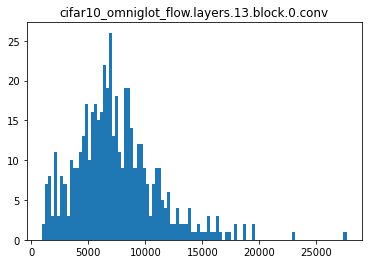

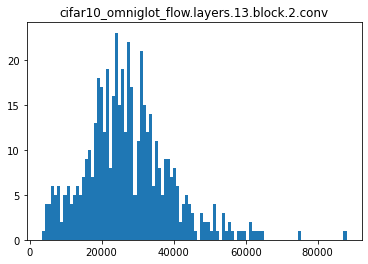

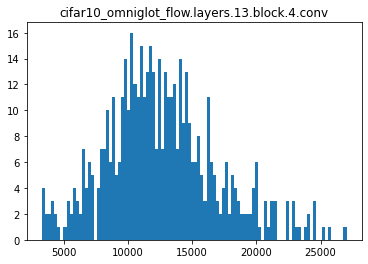

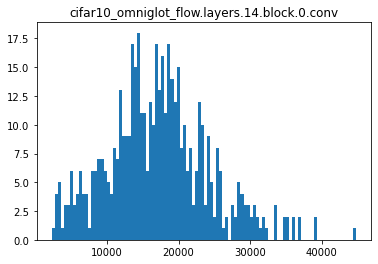

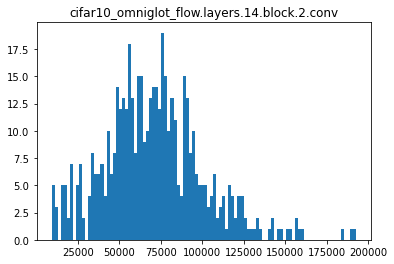

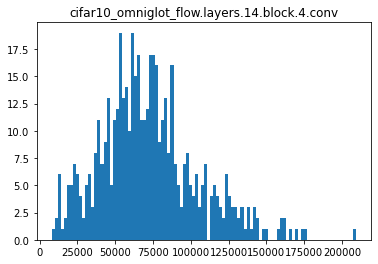

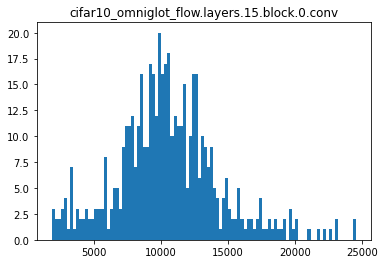

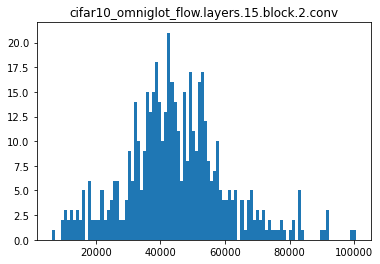

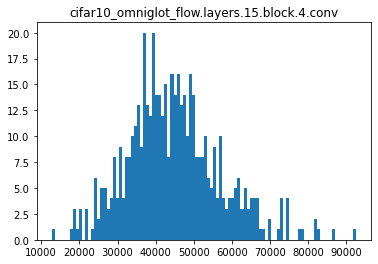

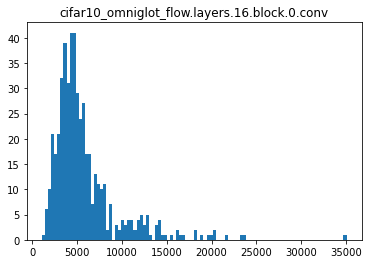

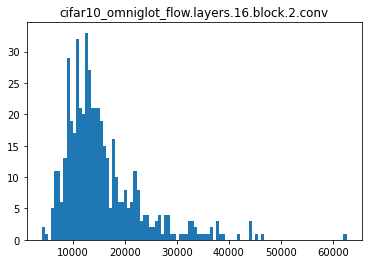

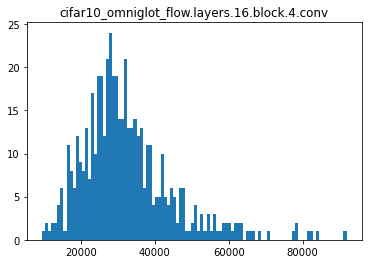

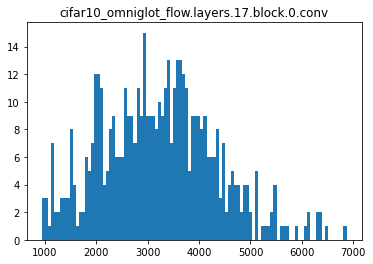

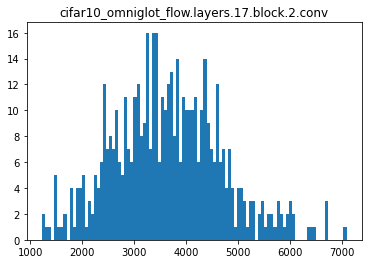

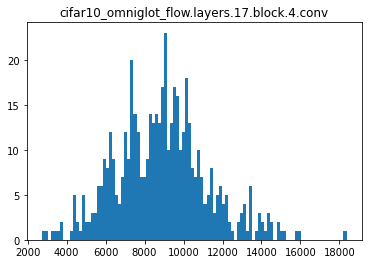

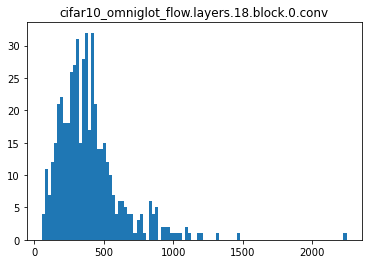

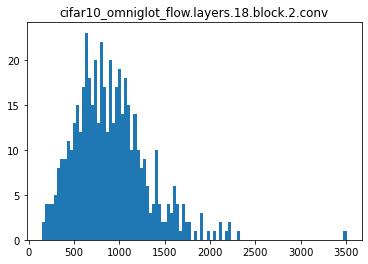

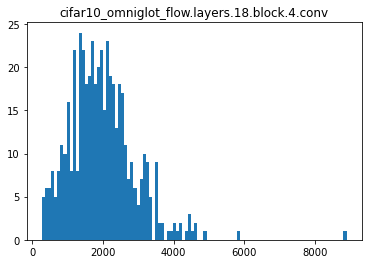

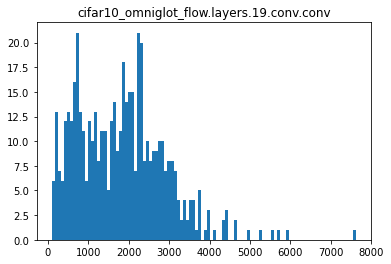

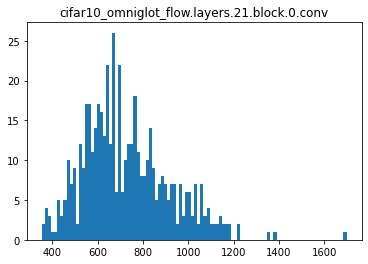

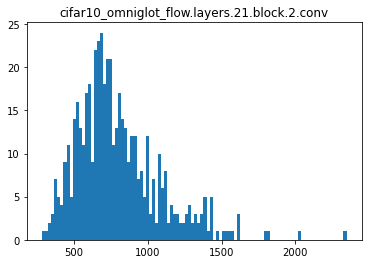

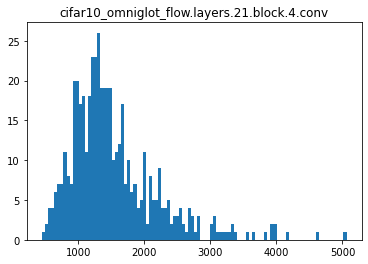

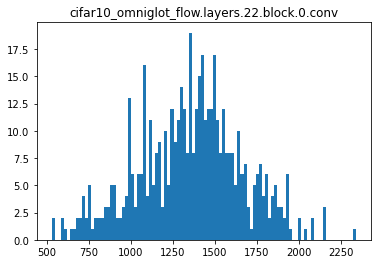

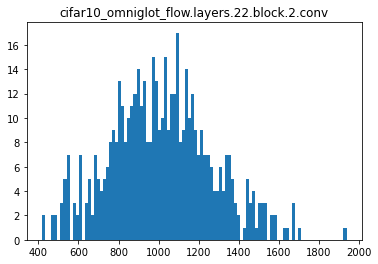

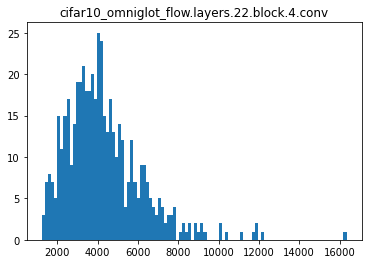

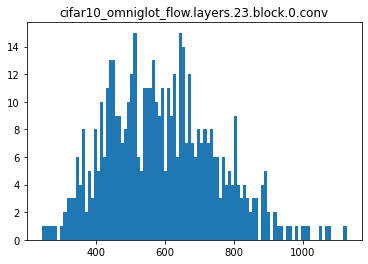

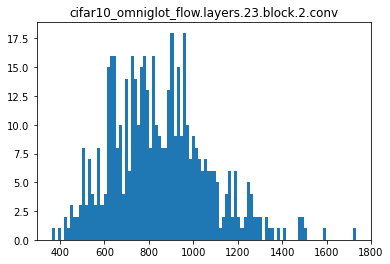

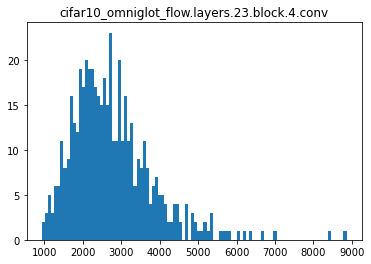

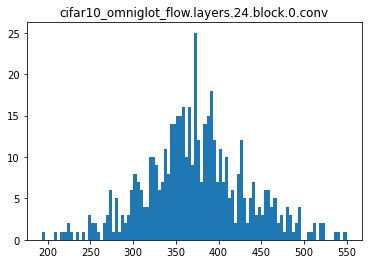

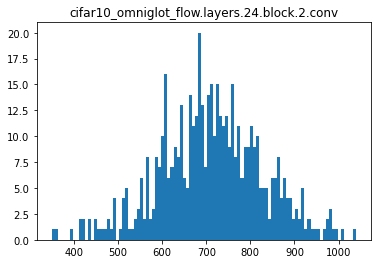

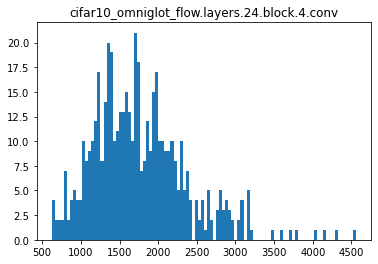

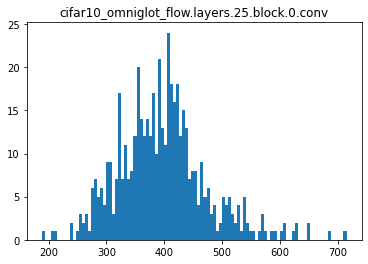

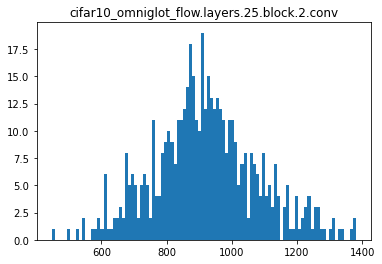

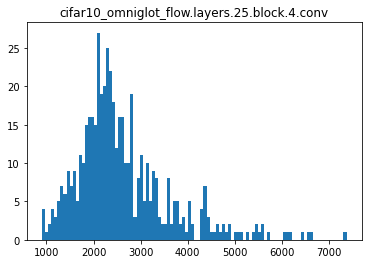

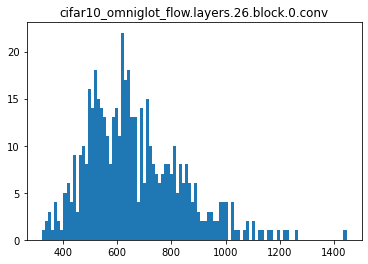

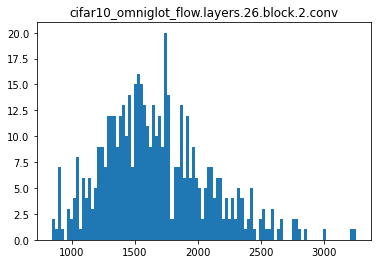

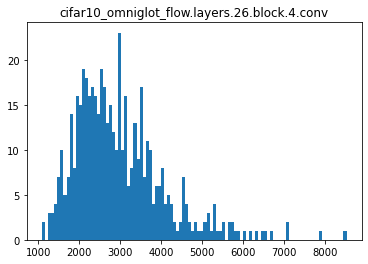

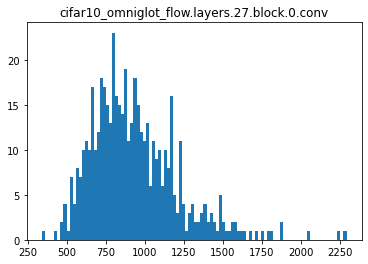

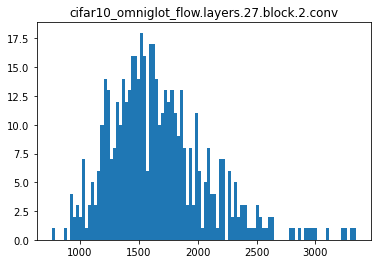

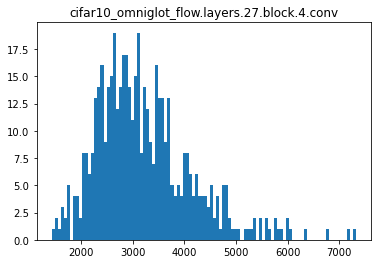

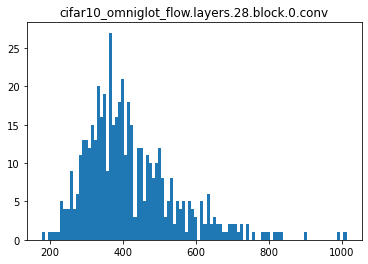

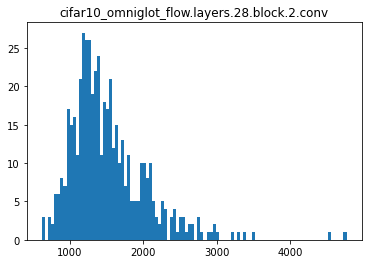

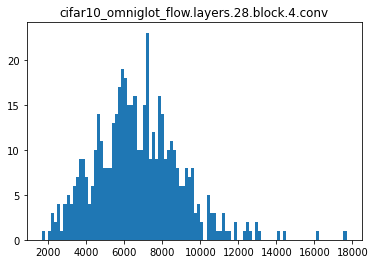

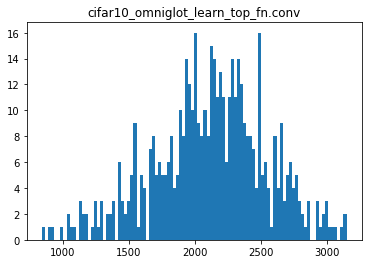

Calculate Score of notmnist:   0%|                                                                                                                                                                                                              | 0/18724 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of notmnist:   3%|█████▏                                                                                                                                                                                              | 499/18724 [00:55<33:36,  9.04step/s]


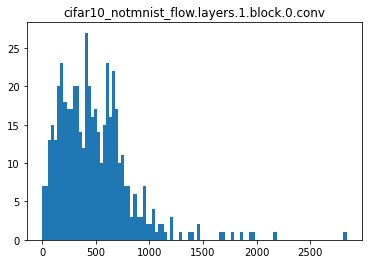

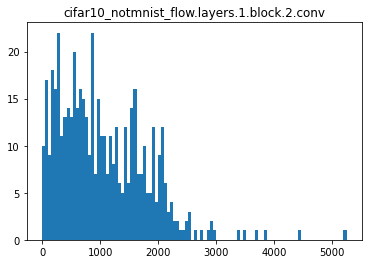

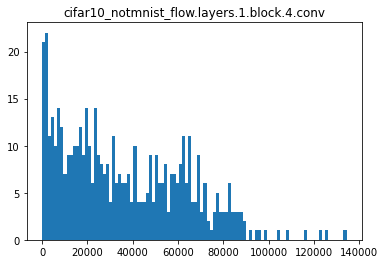

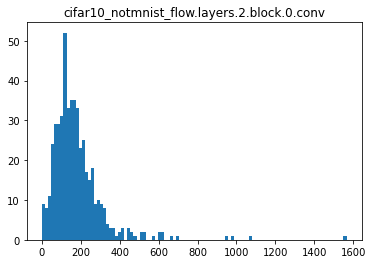

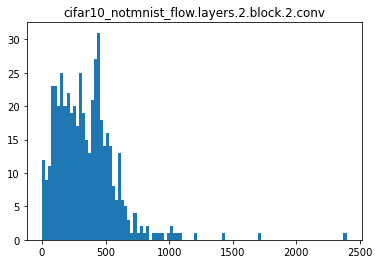

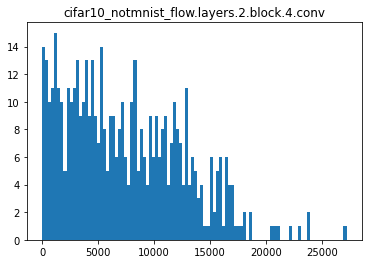

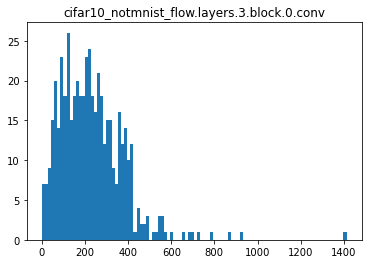

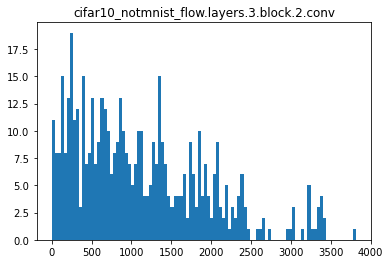

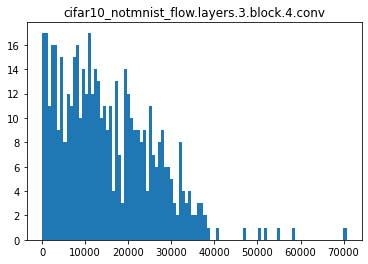

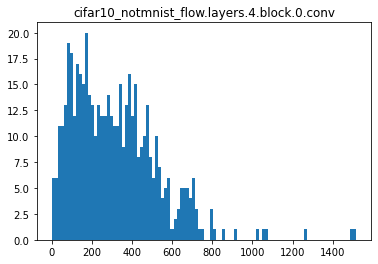

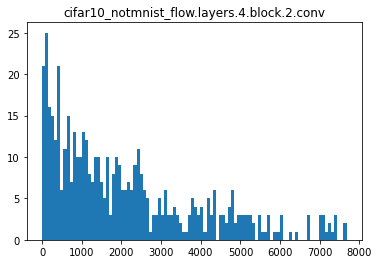

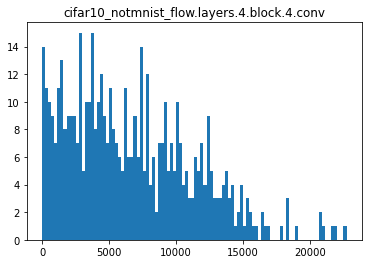

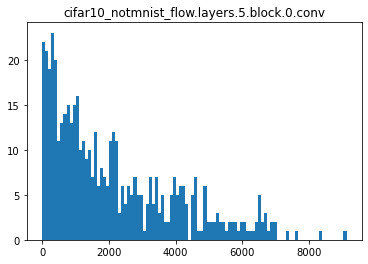

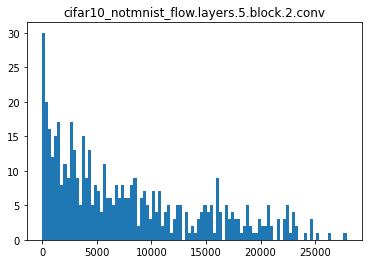

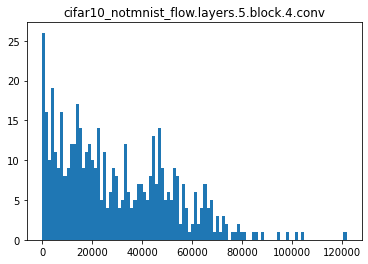

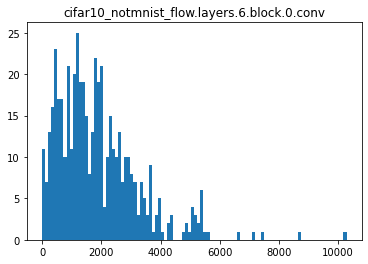

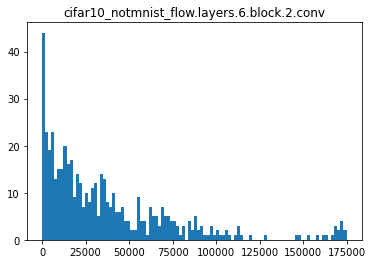

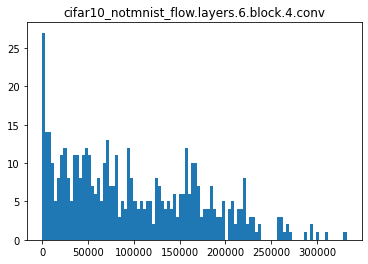

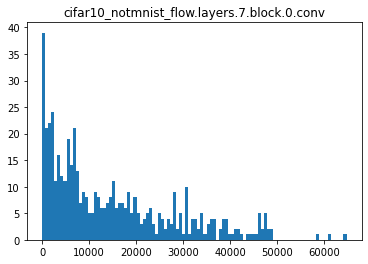

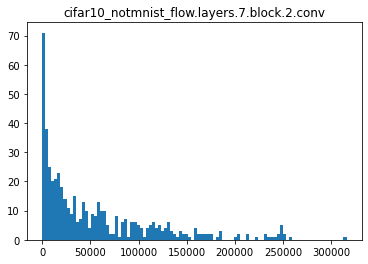

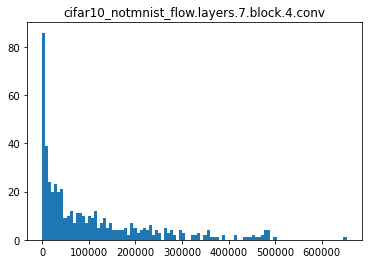

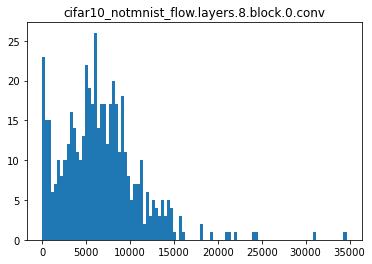

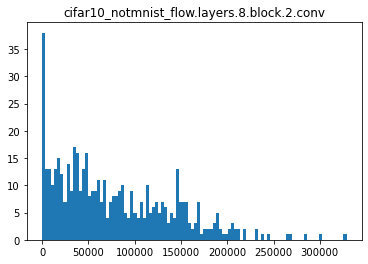

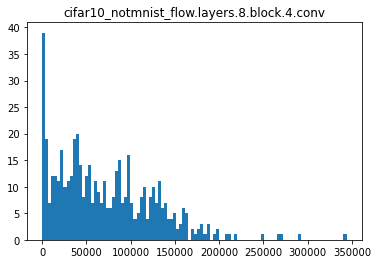

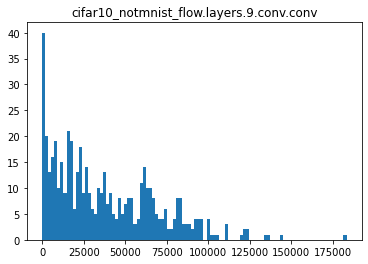

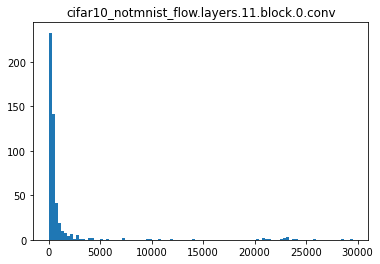

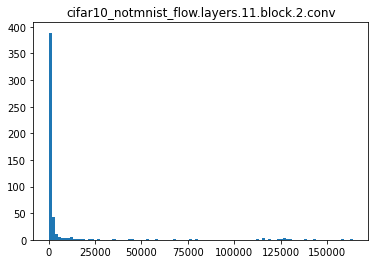

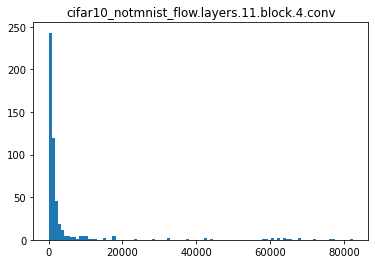

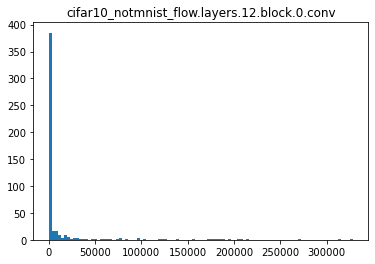

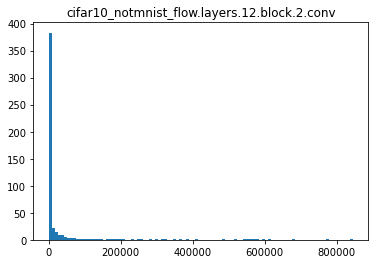

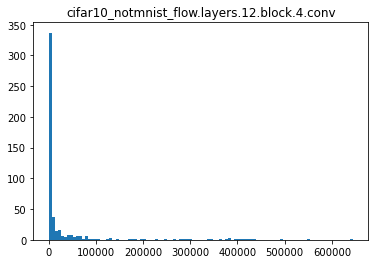

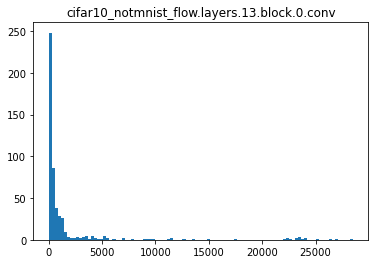

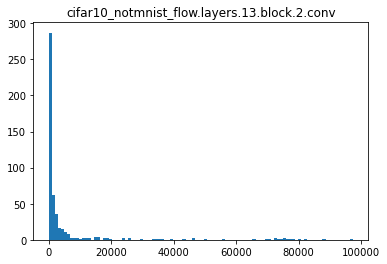

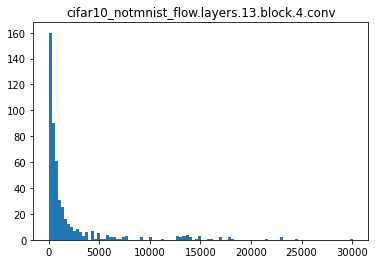

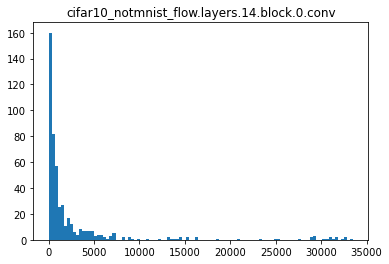

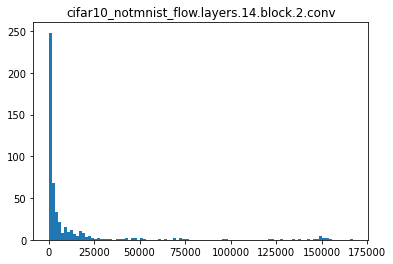

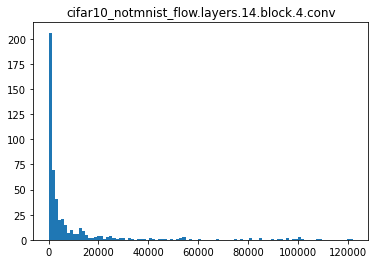

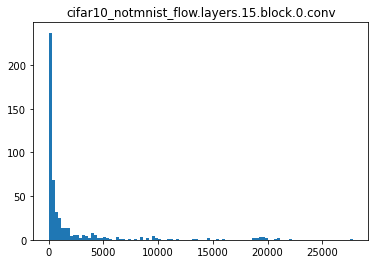

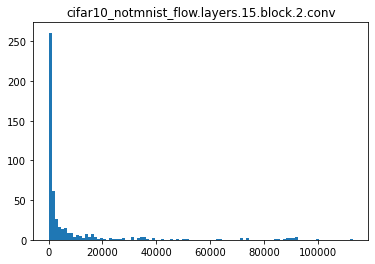

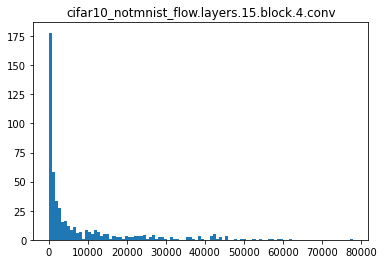

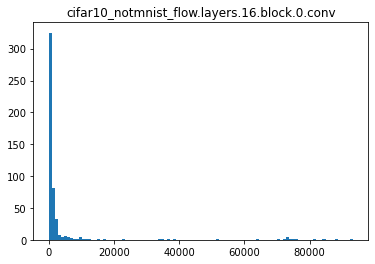

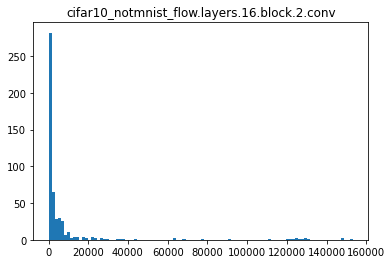

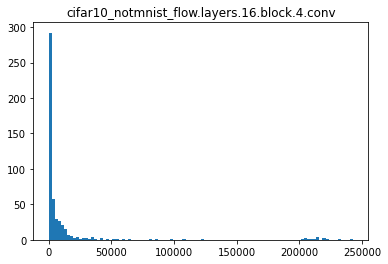

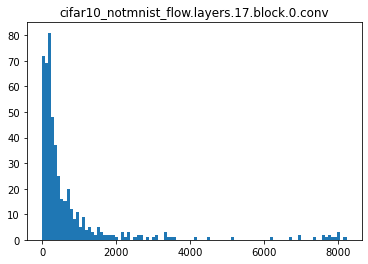

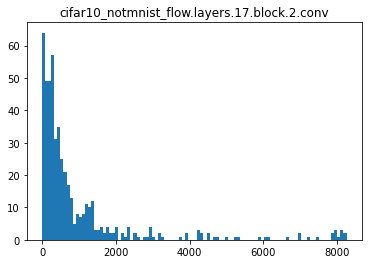

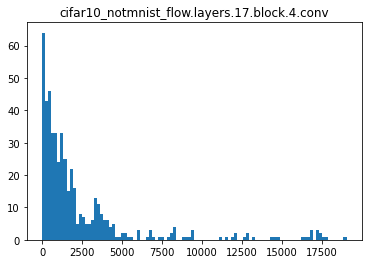

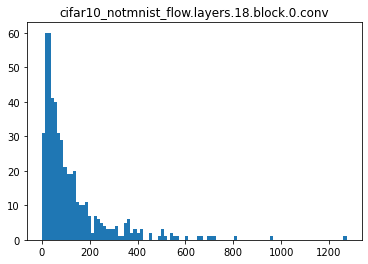

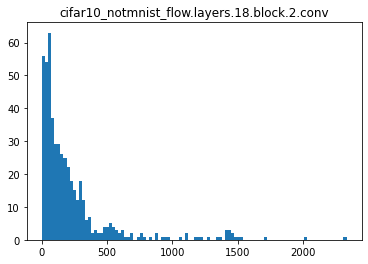

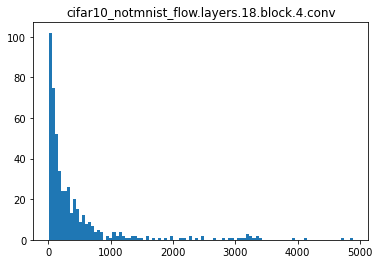

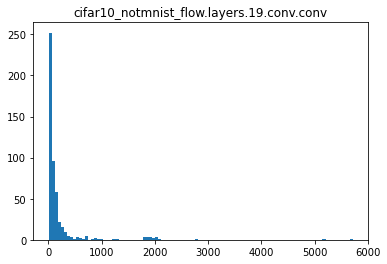

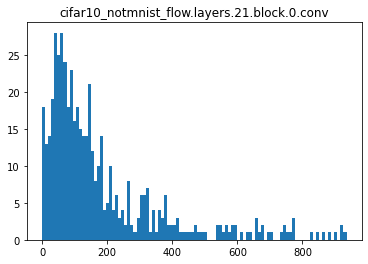

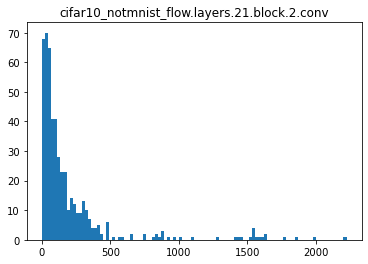

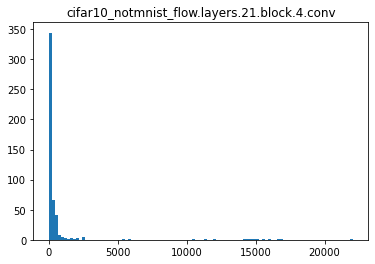

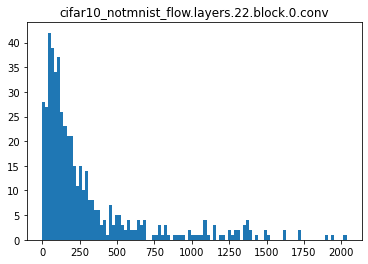

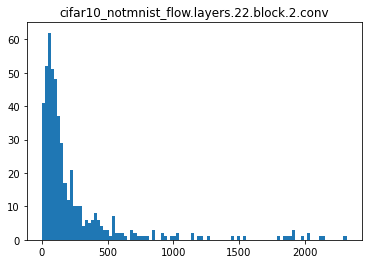

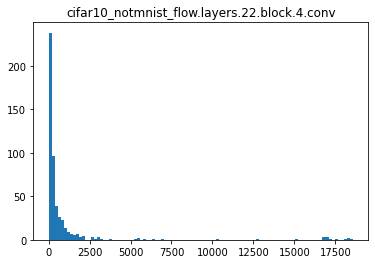

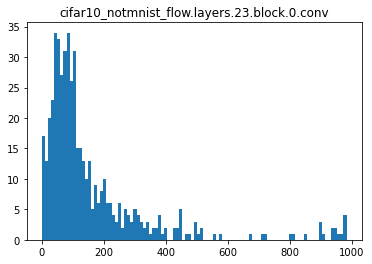

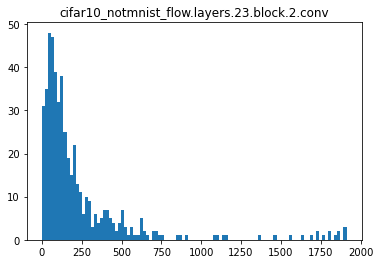

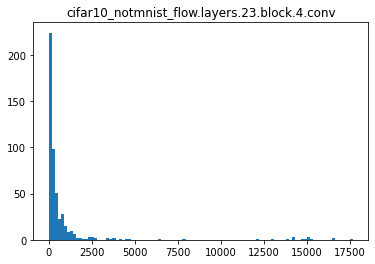

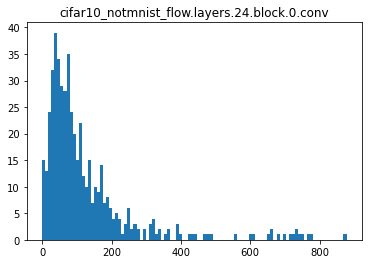

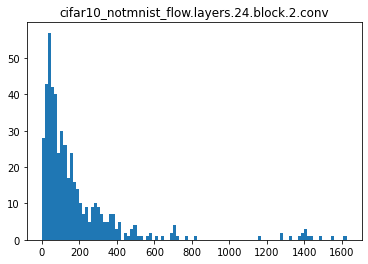

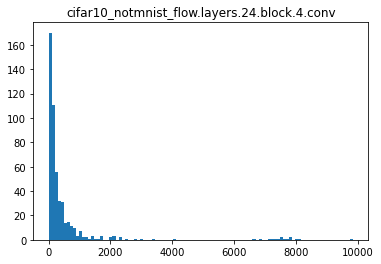

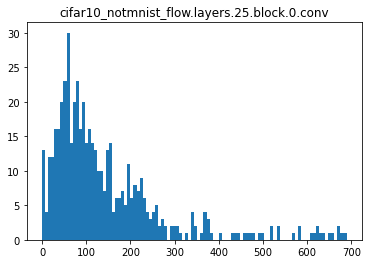

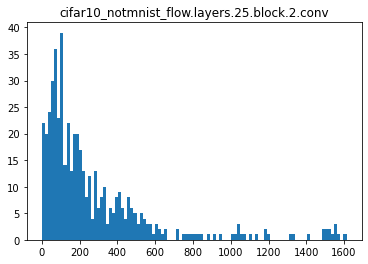

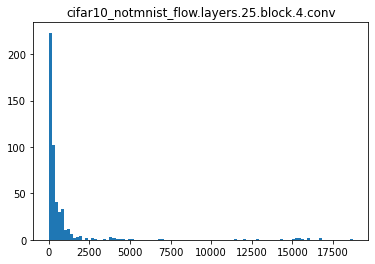

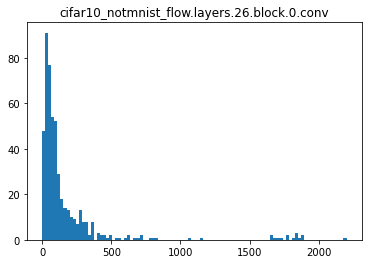

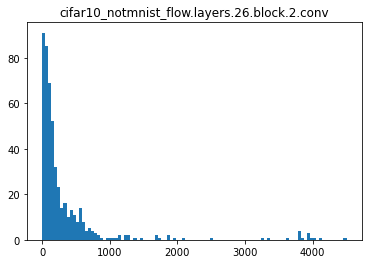

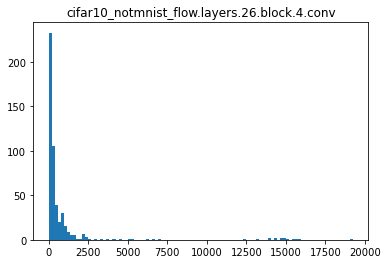

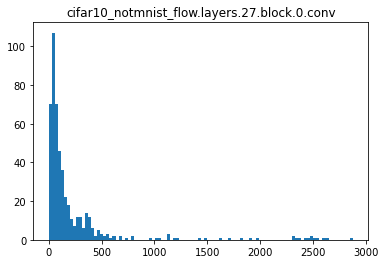

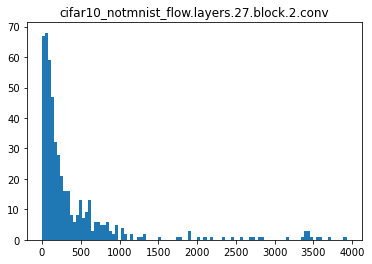

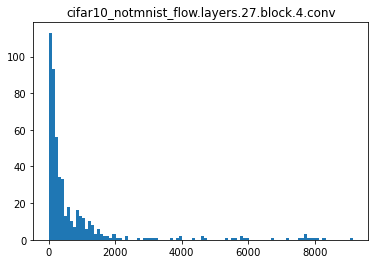

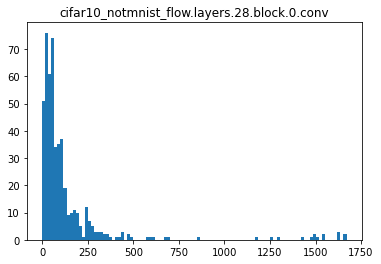

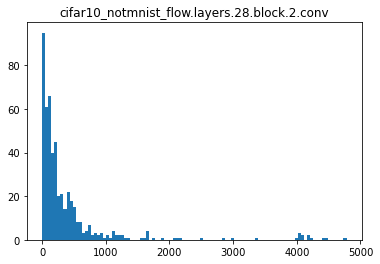

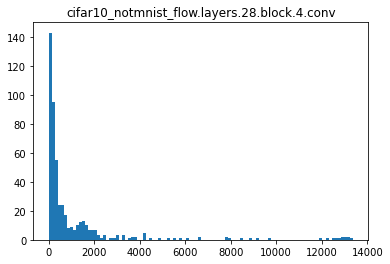

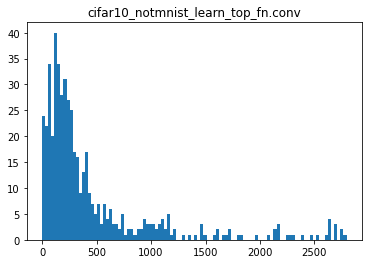

Calculate Score of noise:   0%|                                                                                                                                                                                                                 | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of noise:   5%|█████████▉                                                                                                                                                                                             | 499/10000 [00:54<17:22,  9.12step/s]


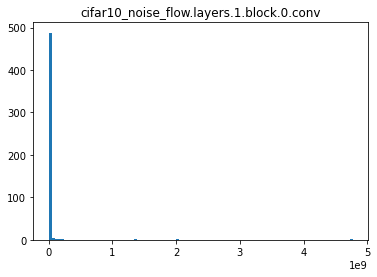

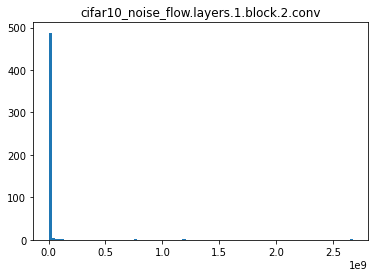

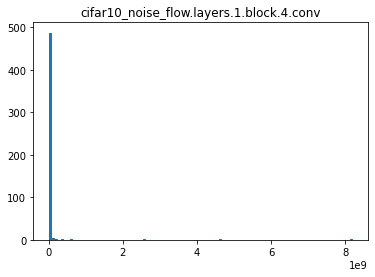

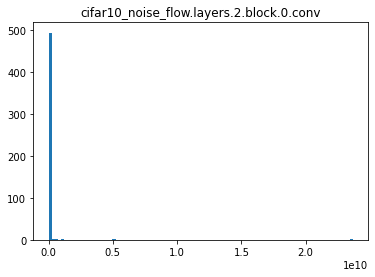

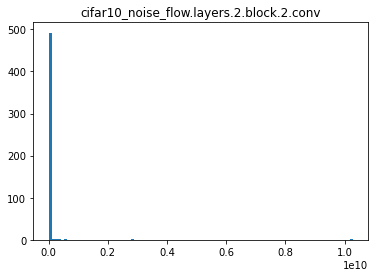

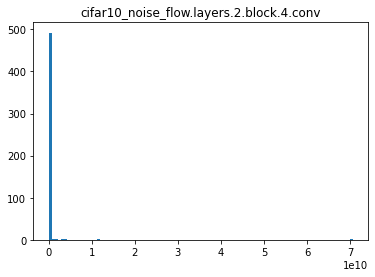

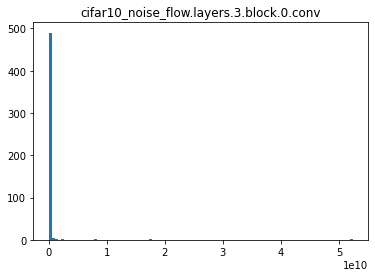

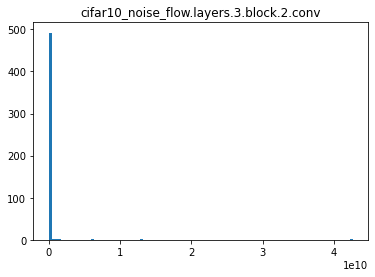

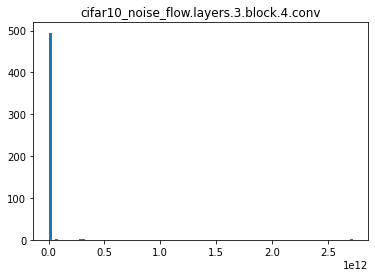

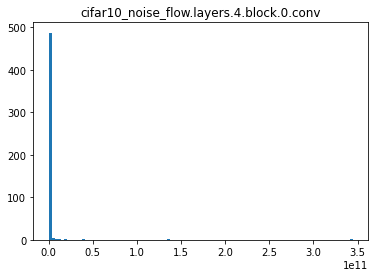

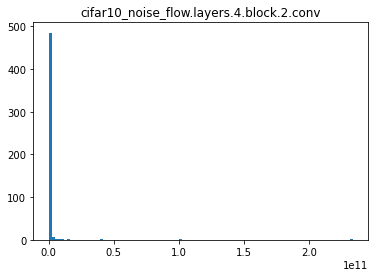

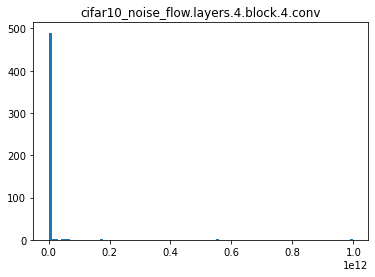

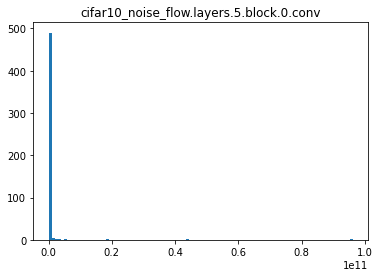

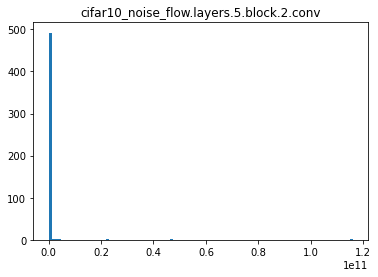

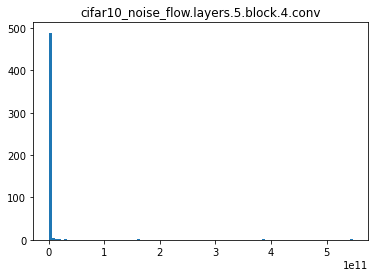

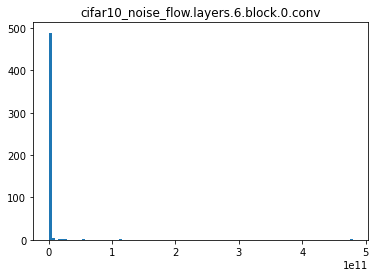

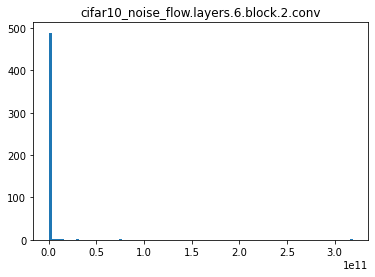

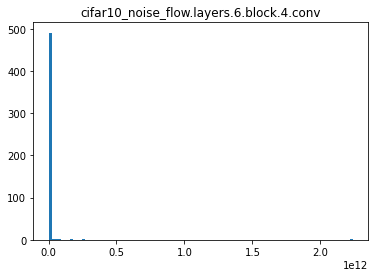

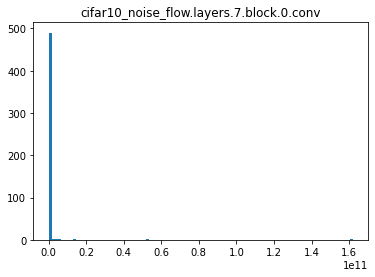

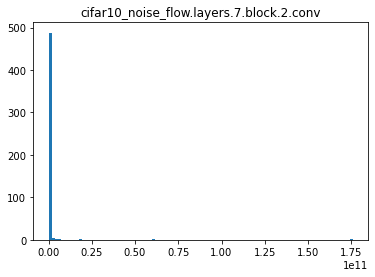

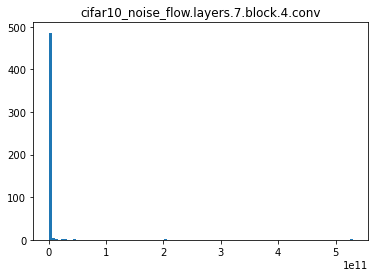

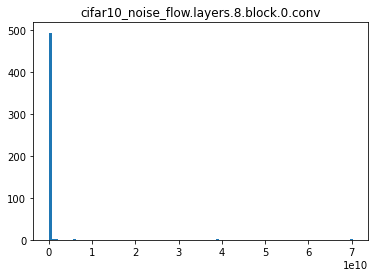

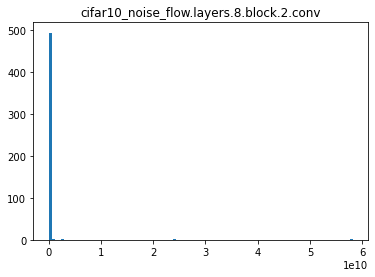

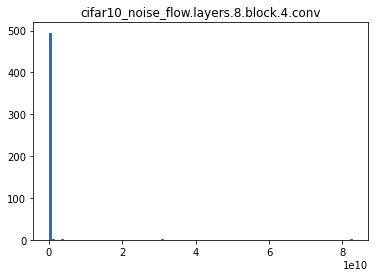

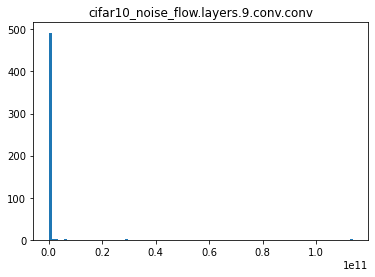

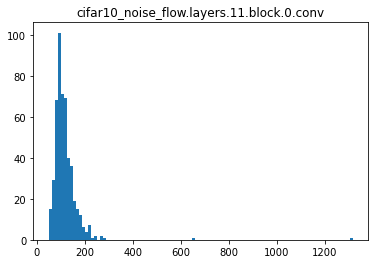

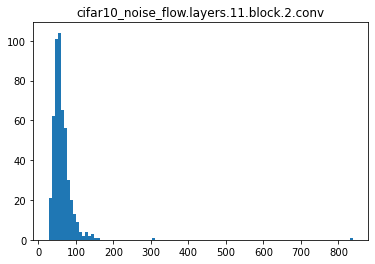

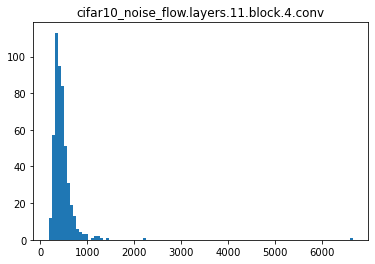

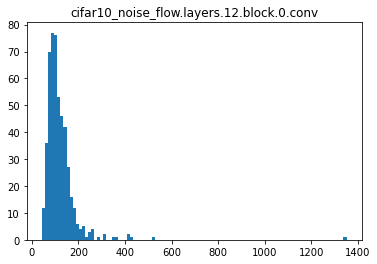

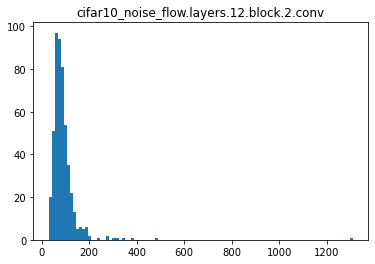

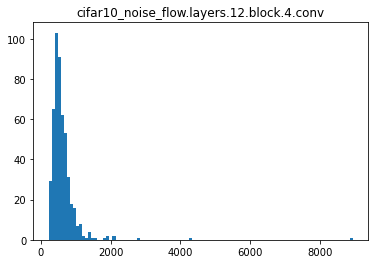

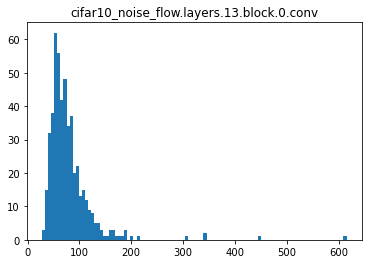

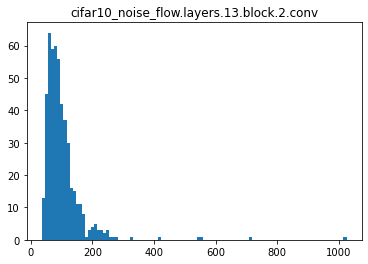

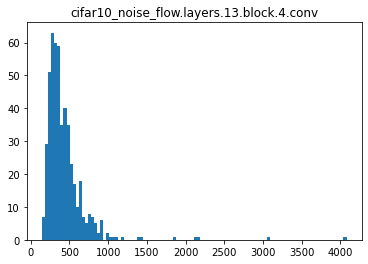

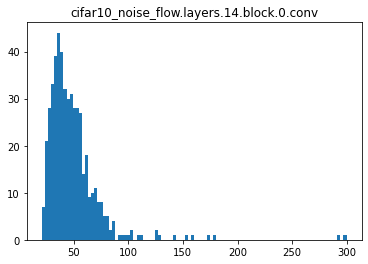

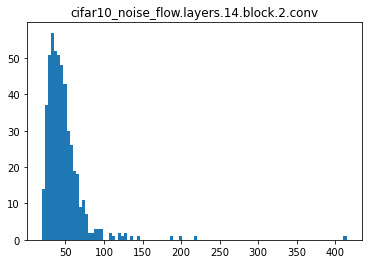

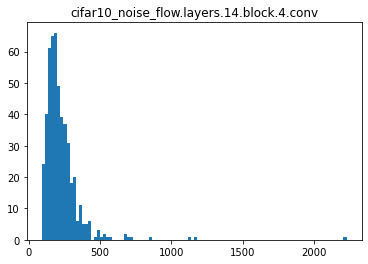

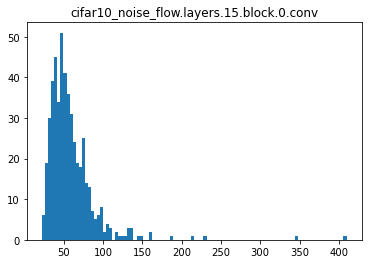

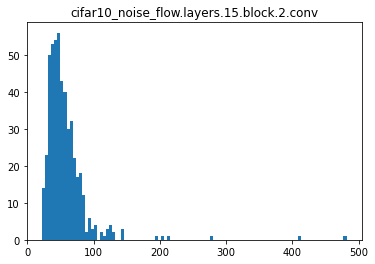

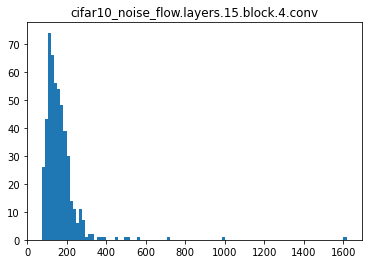

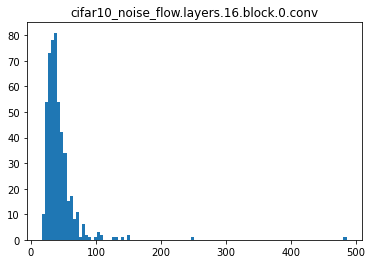

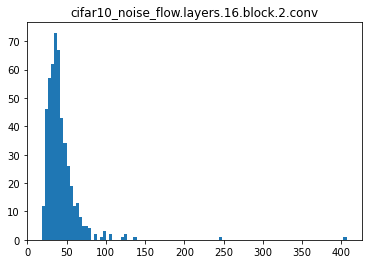

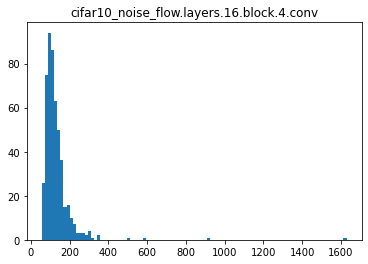

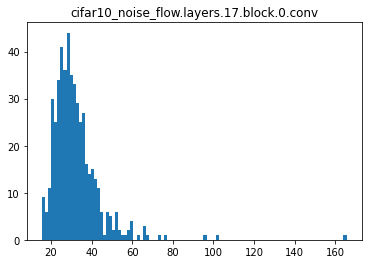

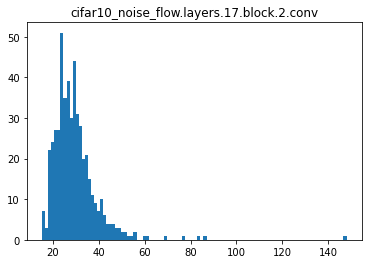

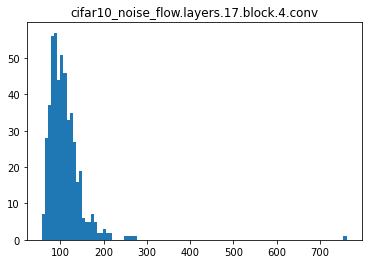

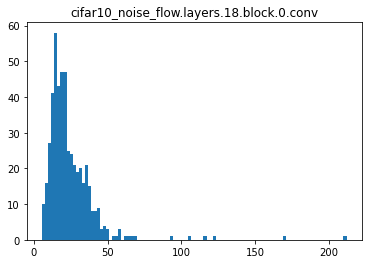

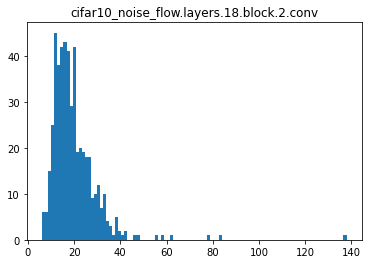

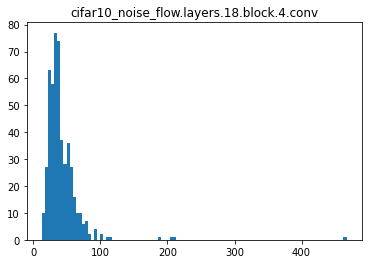

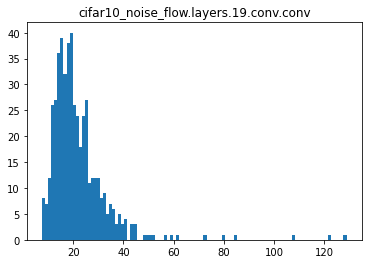

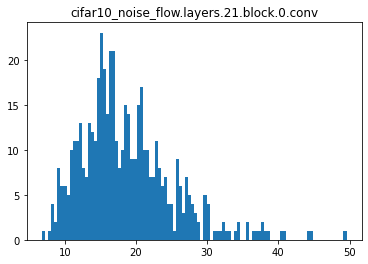

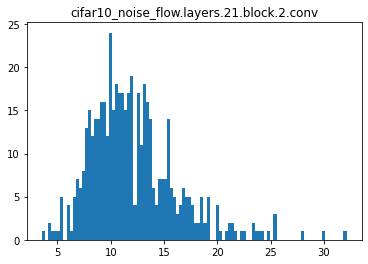

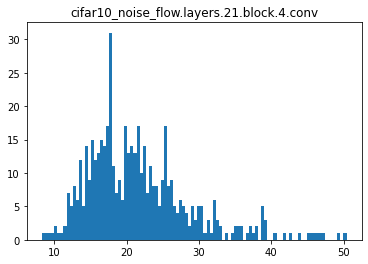

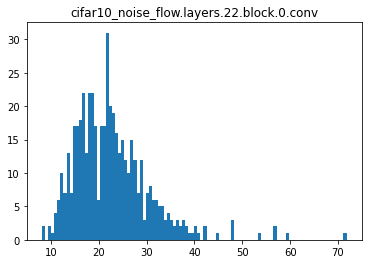

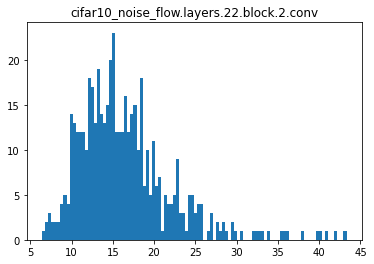

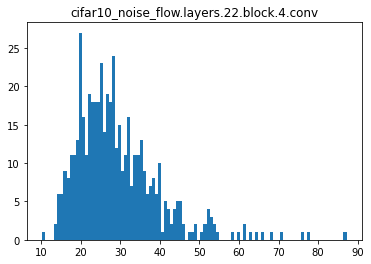

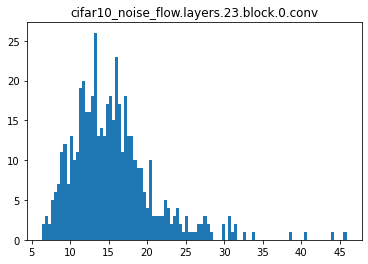

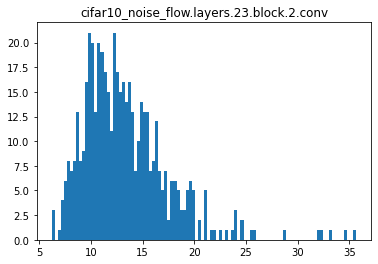

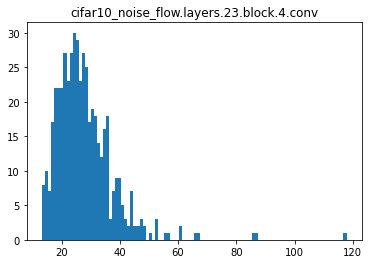

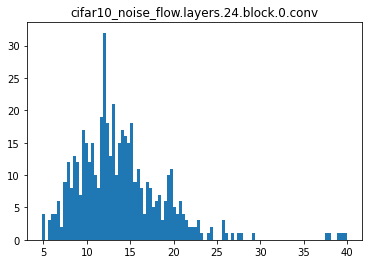

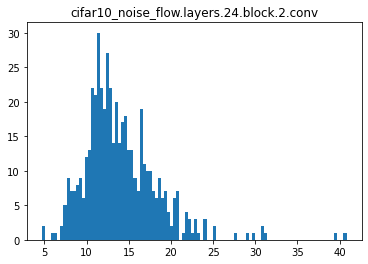

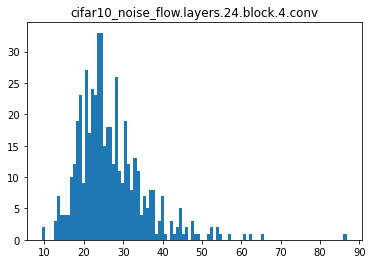

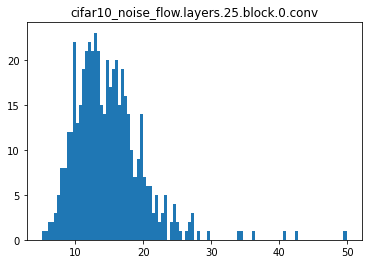

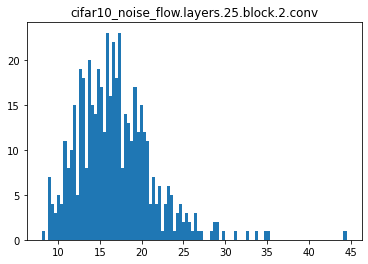

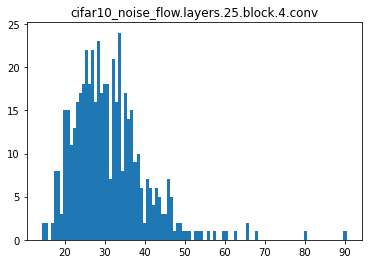

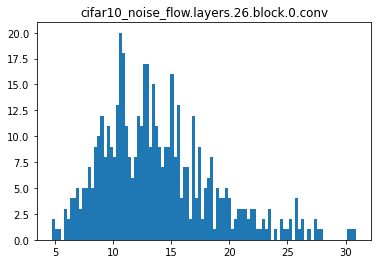

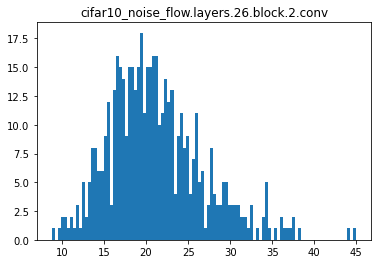

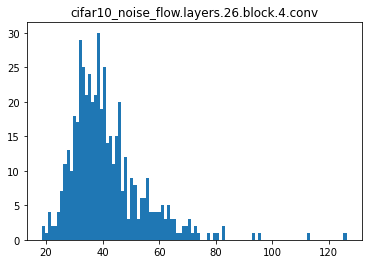

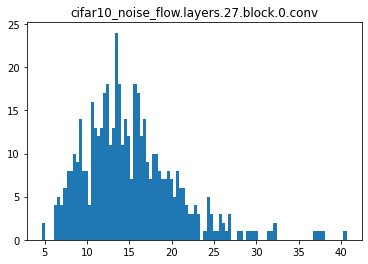

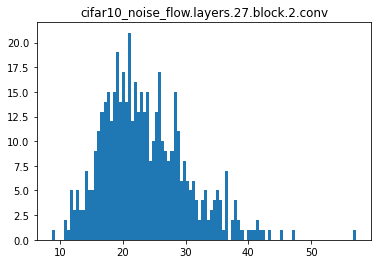

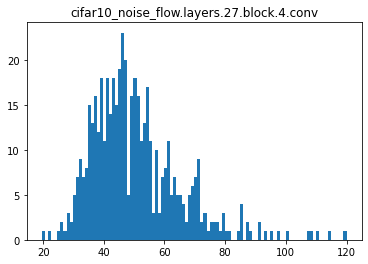

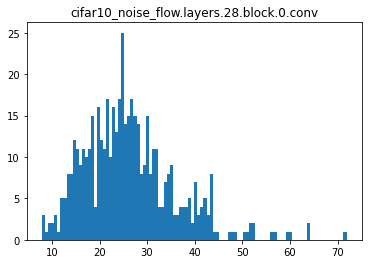

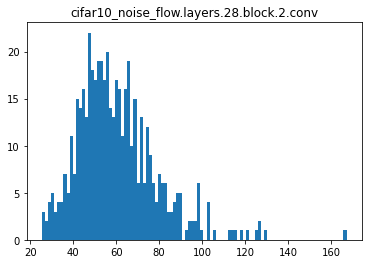

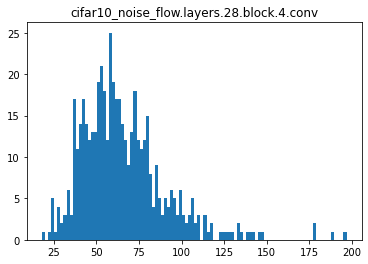

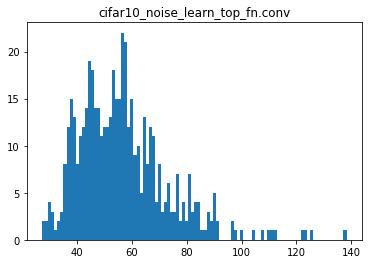

Calculate Score of constant:   0%|                                                                                                                                                                                                              | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of constant:   5%|█████████▊                                                                                                                                                                                          | 499/10000 [00:54<17:15,  9.18step/s]


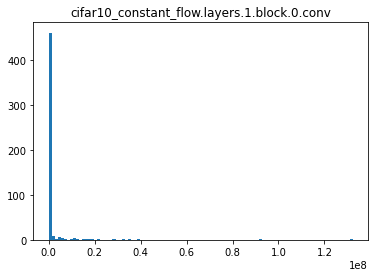

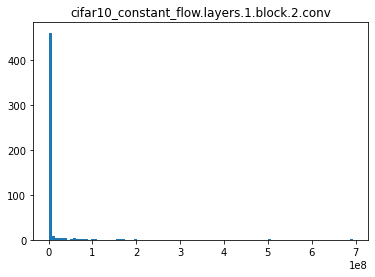

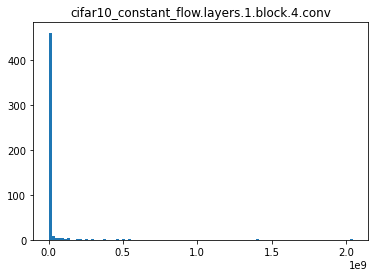

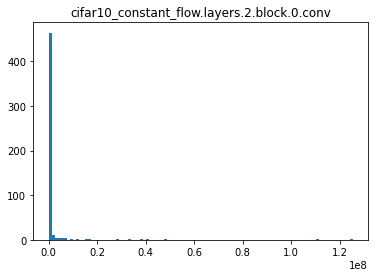

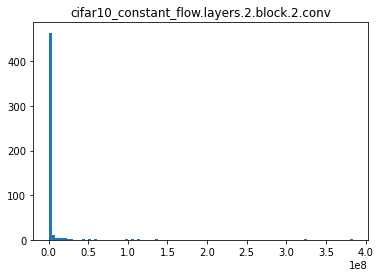

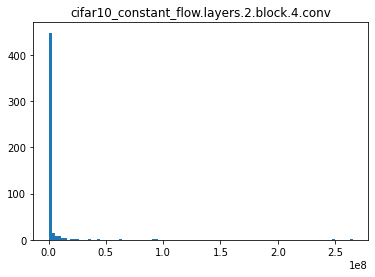

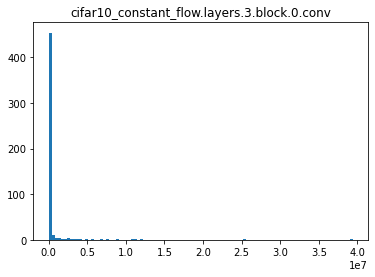

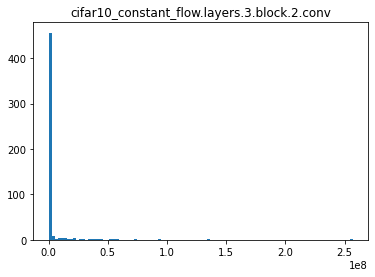

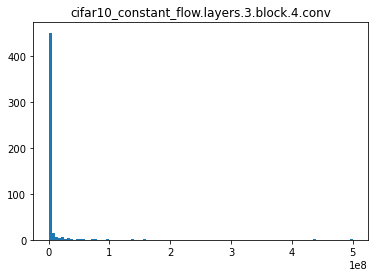

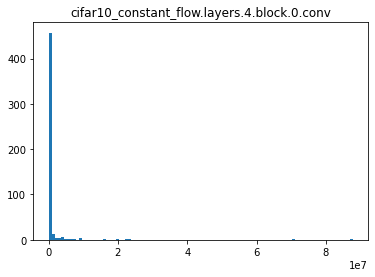

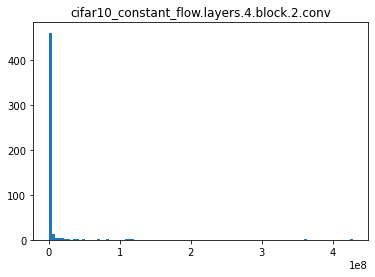

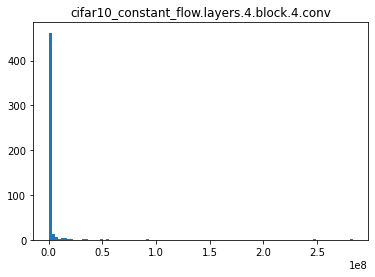

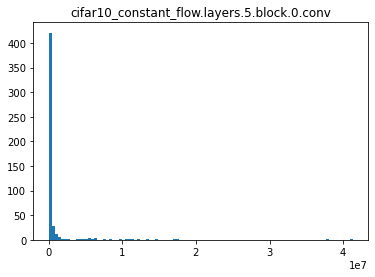

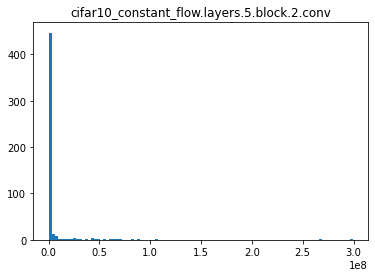

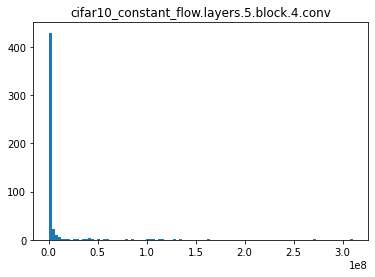

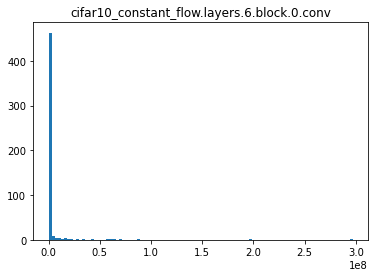

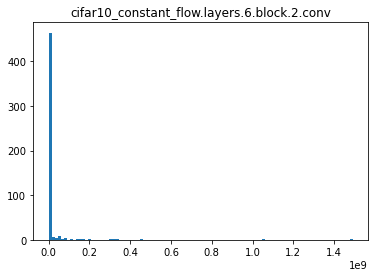

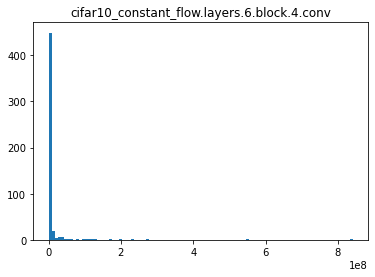

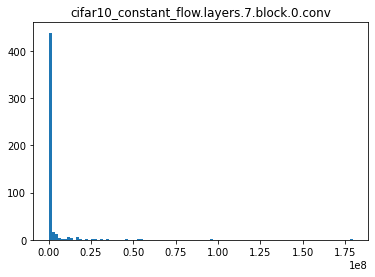

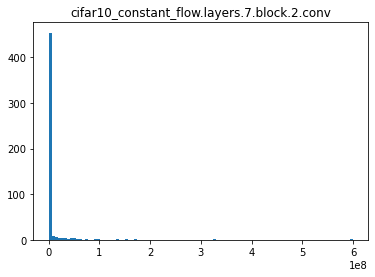

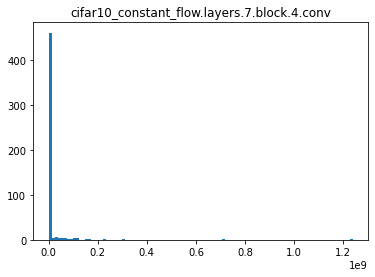

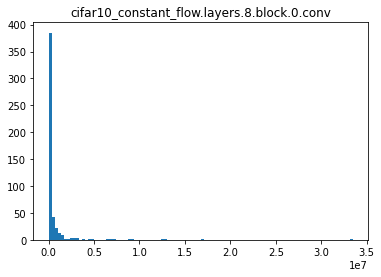

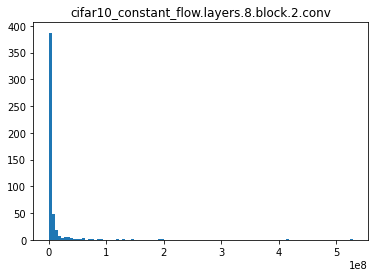

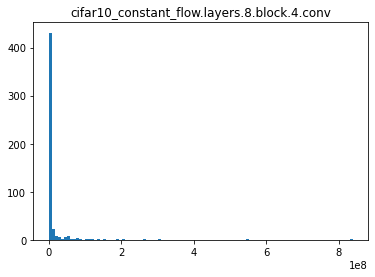

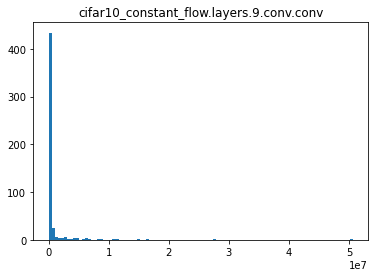

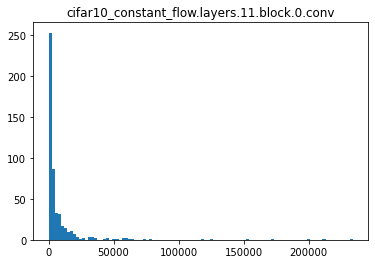

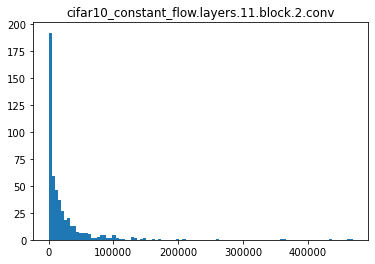

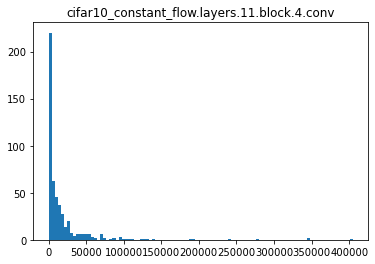

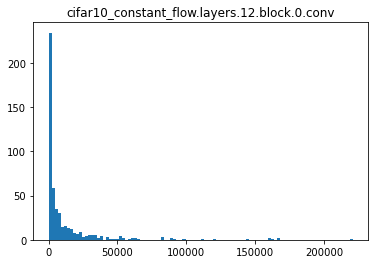

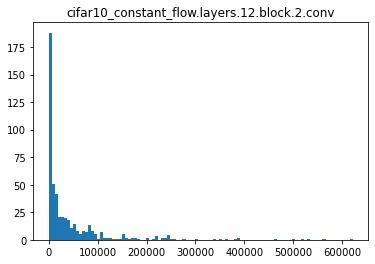

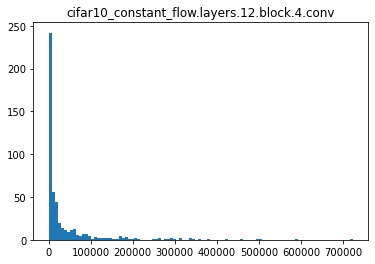

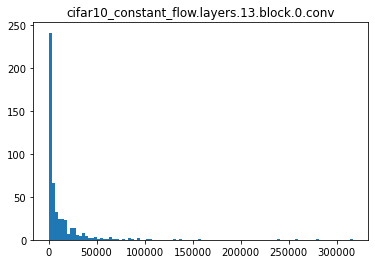

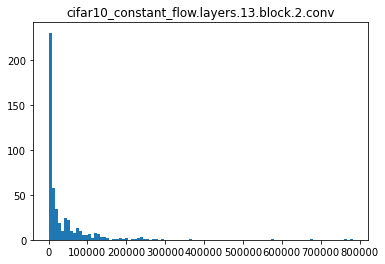

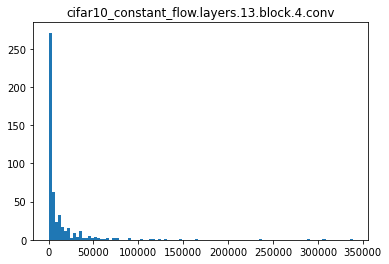

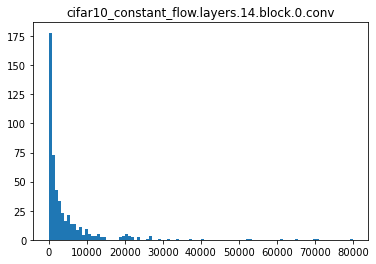

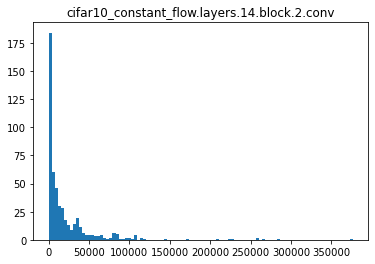

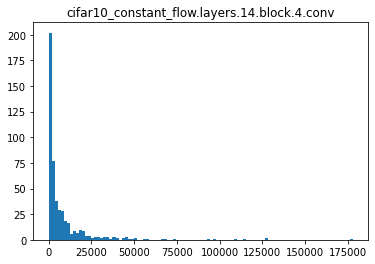

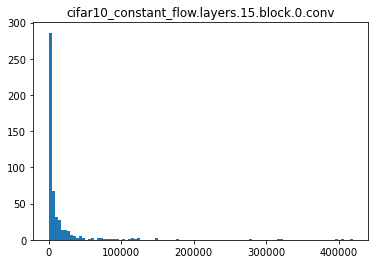

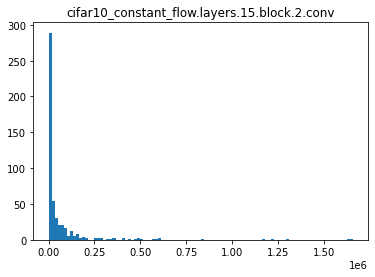

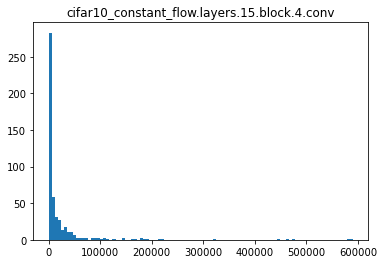

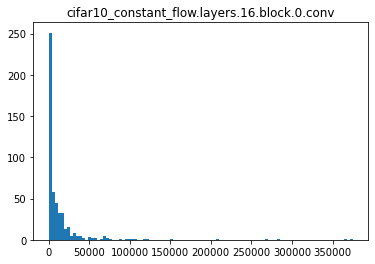

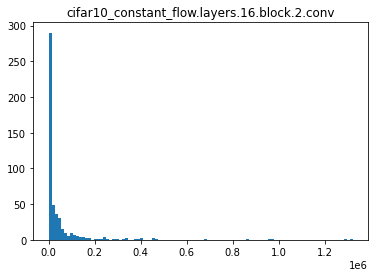

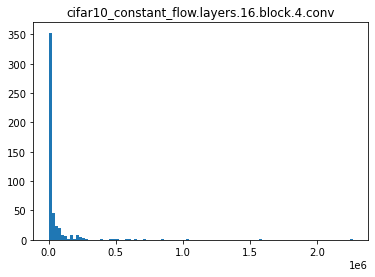

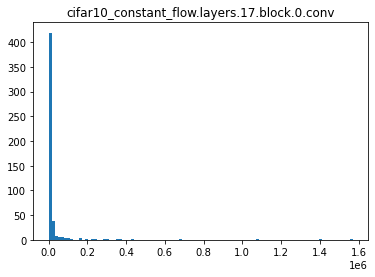

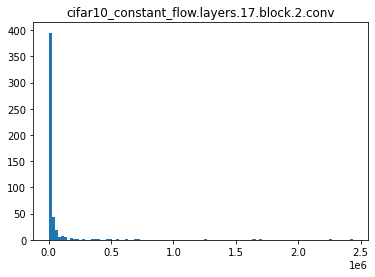

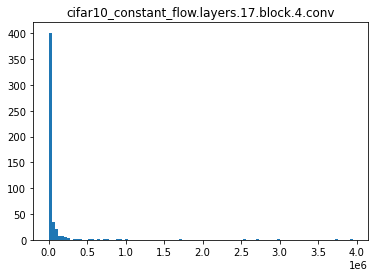

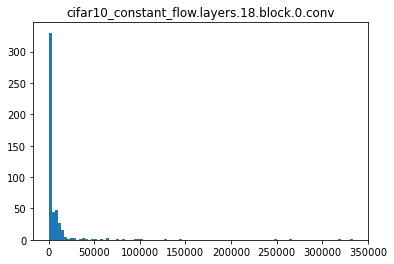

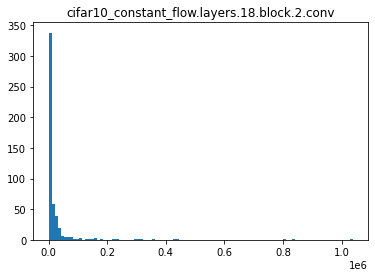

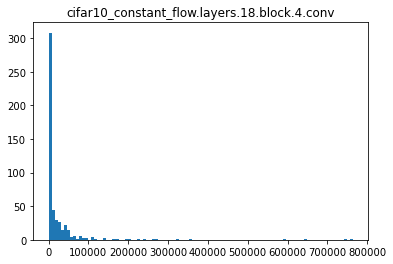

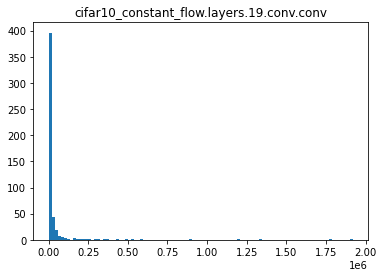

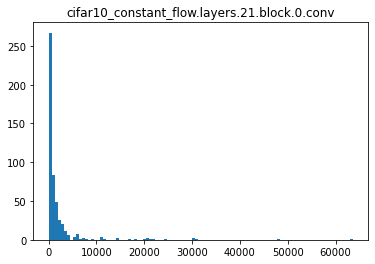

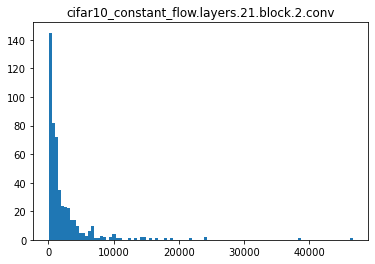

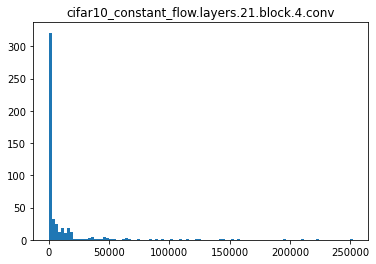

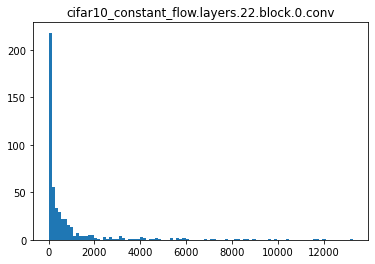

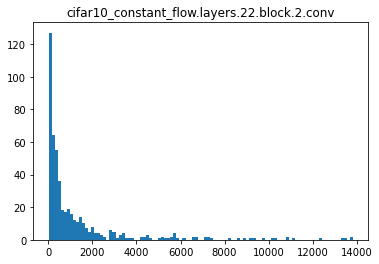

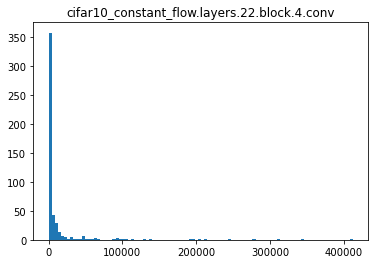

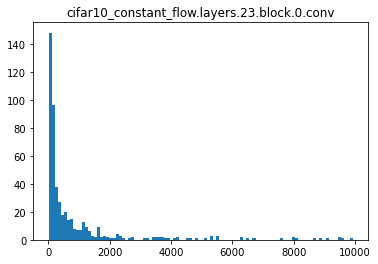

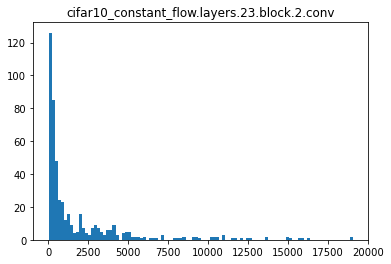

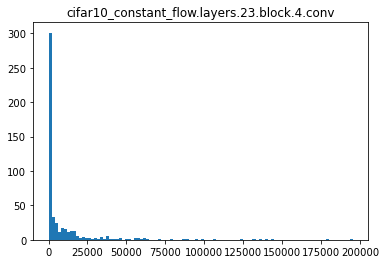

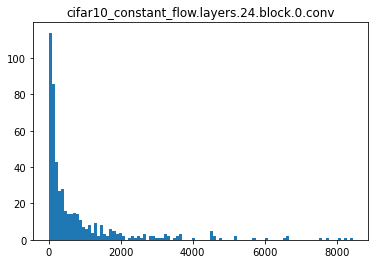

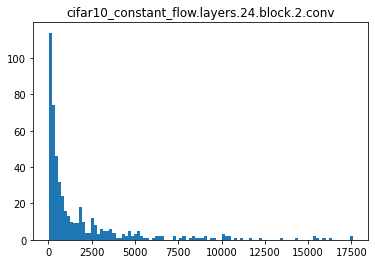

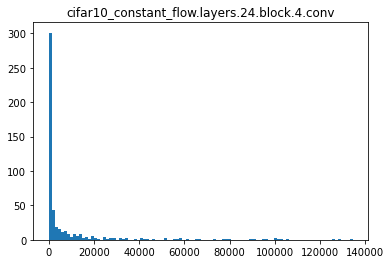

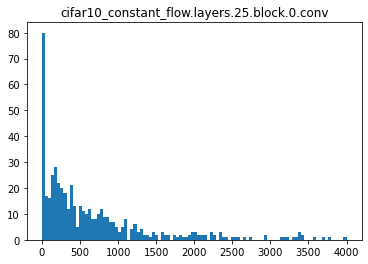

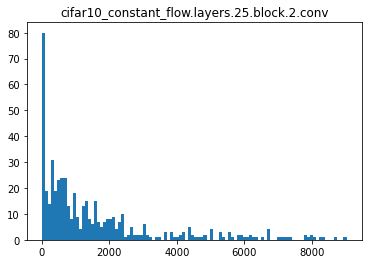

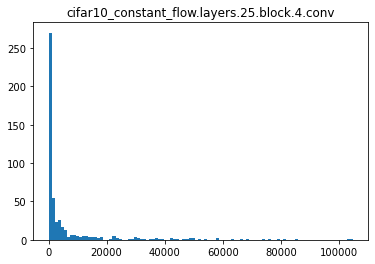

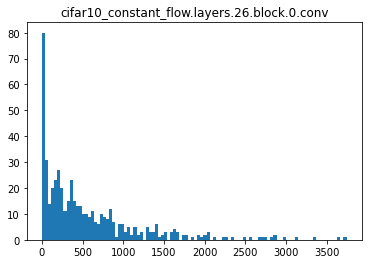

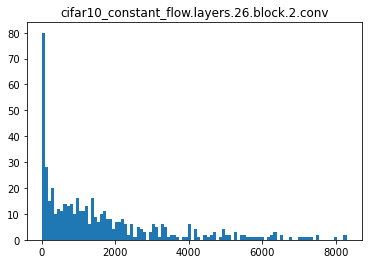

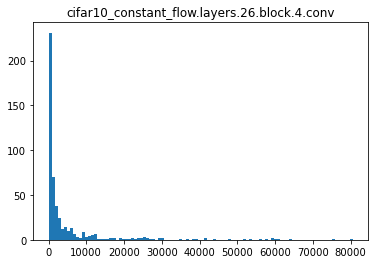

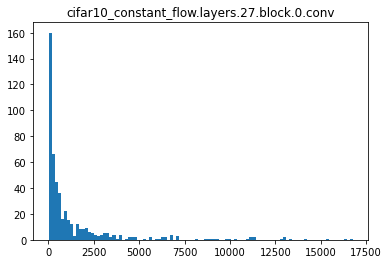

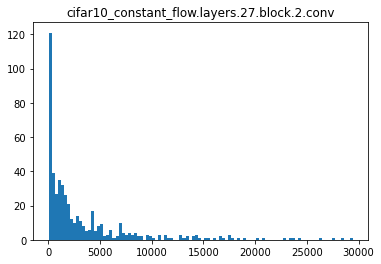

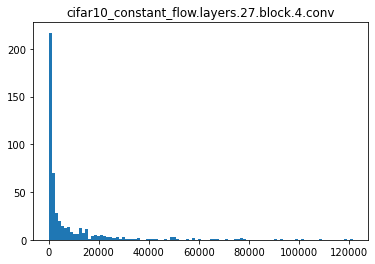

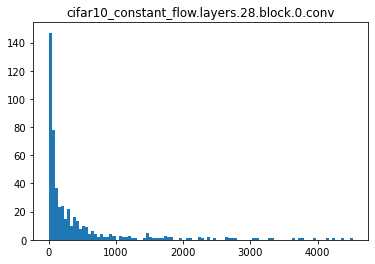

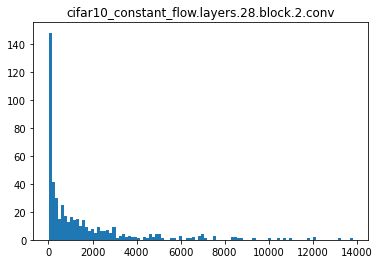

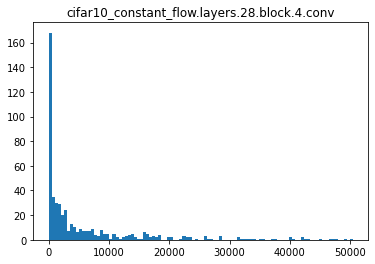

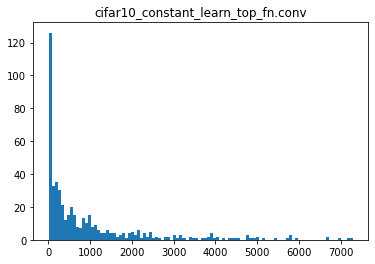

Calculate Score of overall:   0%|                                                                                                                                                                                                               | 0/10000 [00:00<?, ?step/s]C:\Users\shinypond\.conda\envs\torch\lib\site-packages\torch\nn\modules\module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Calculate Score of overall:   5%|█████████▊                                                                                                                                                                                           | 499/10000 [00:54<17:24,  9.10step/s]


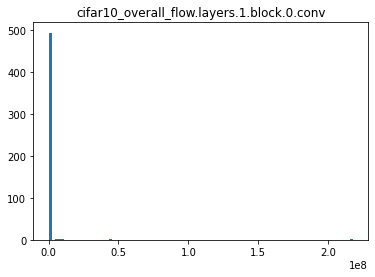

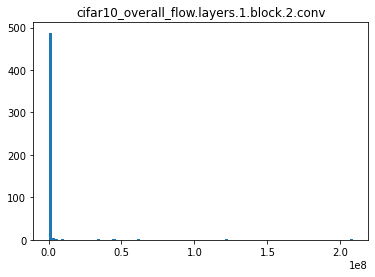

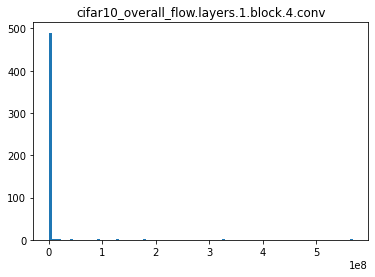

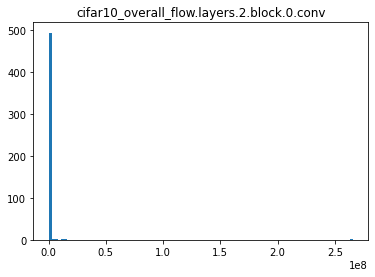

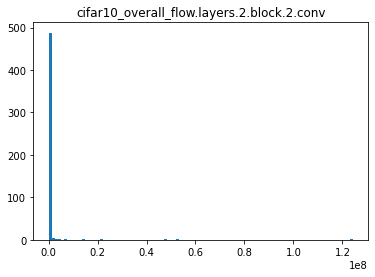

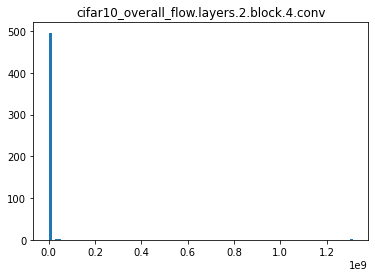

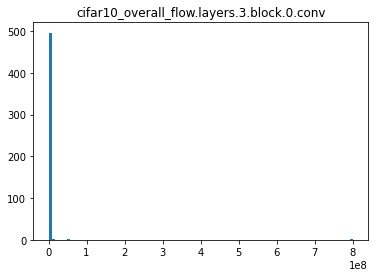

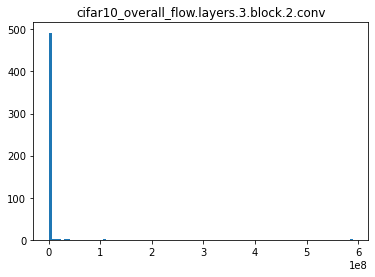

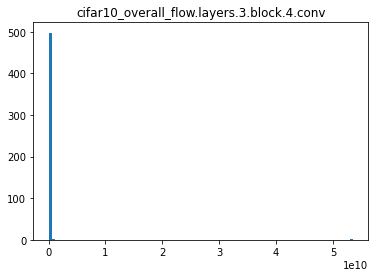

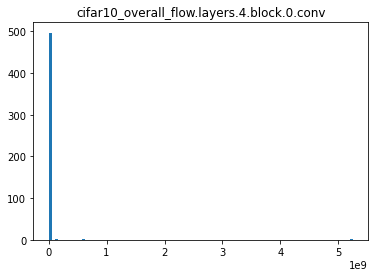

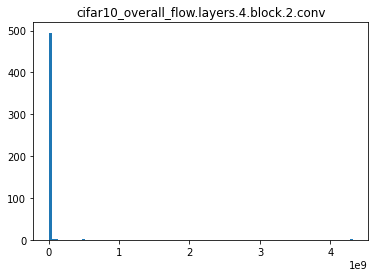

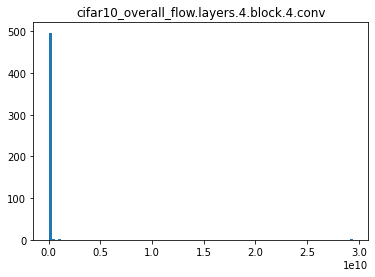

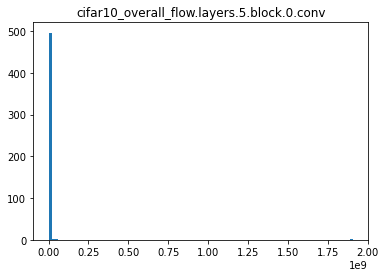

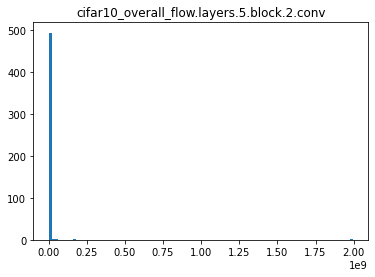

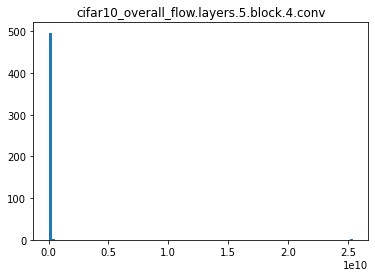

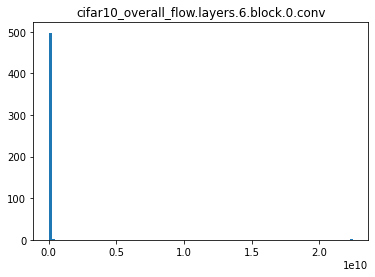

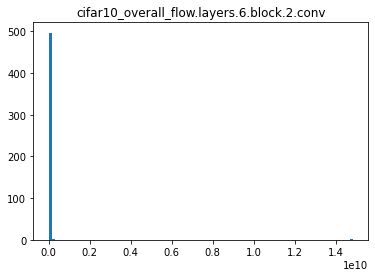

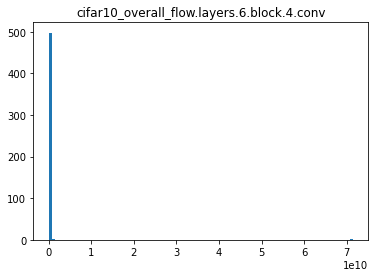

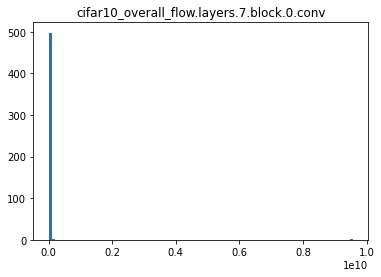

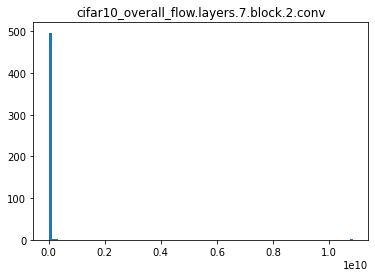

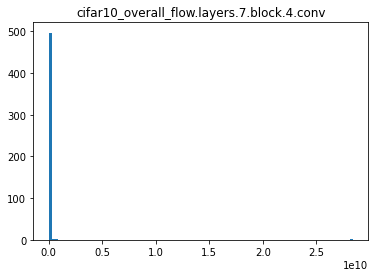

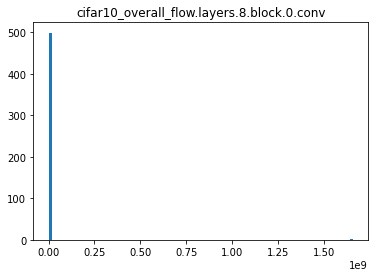

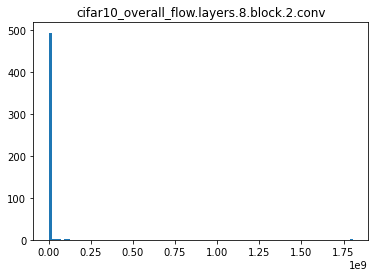

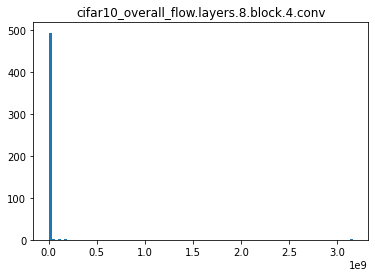

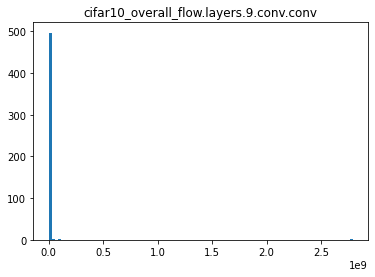

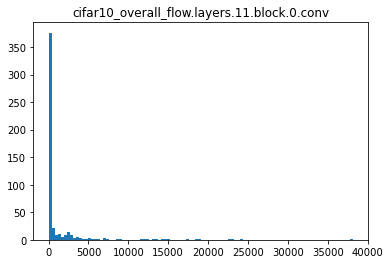

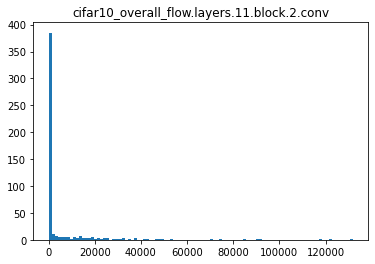

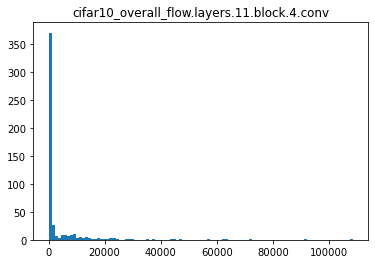

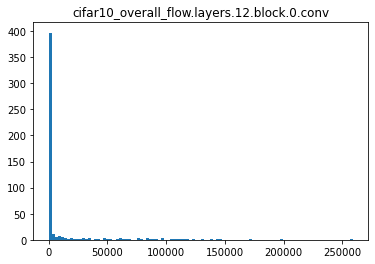

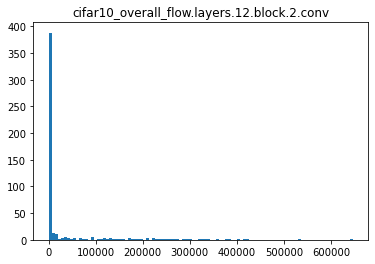

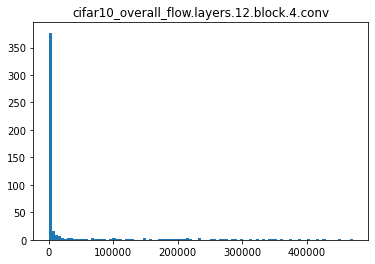

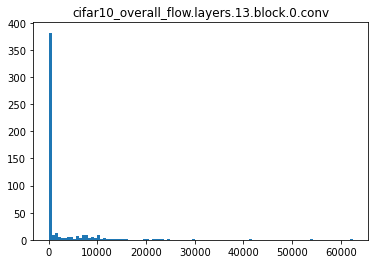

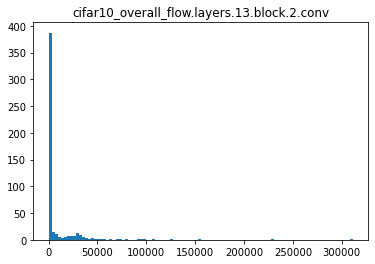

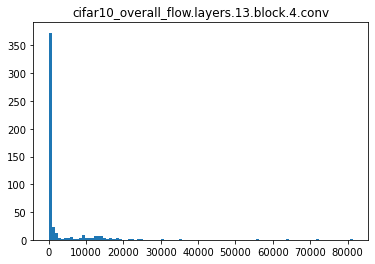

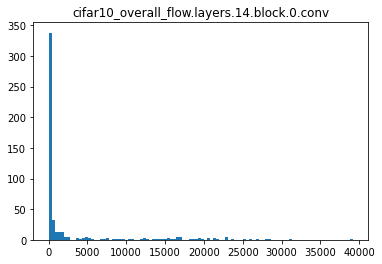

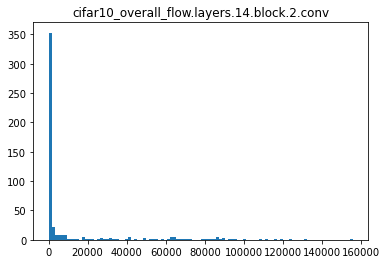

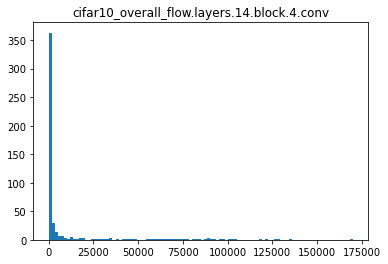

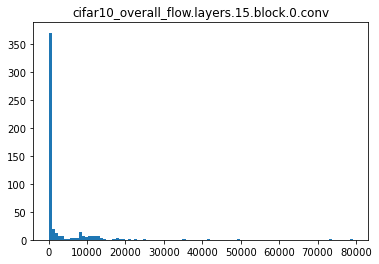

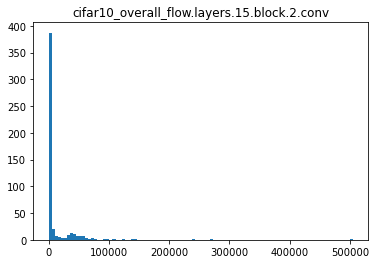

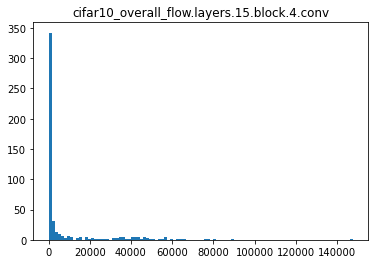

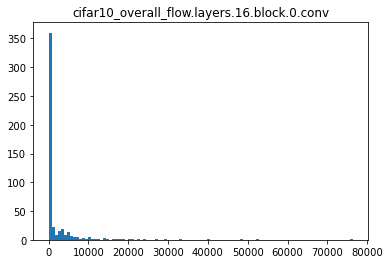

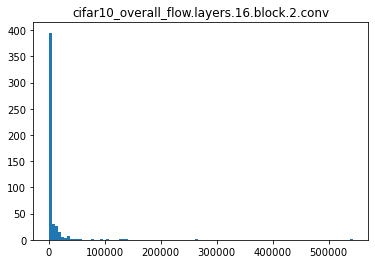

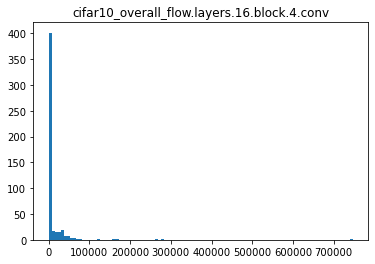

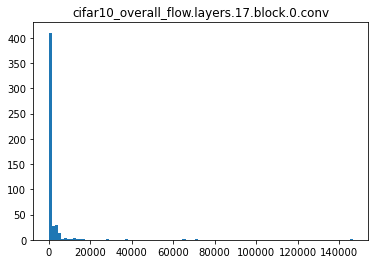

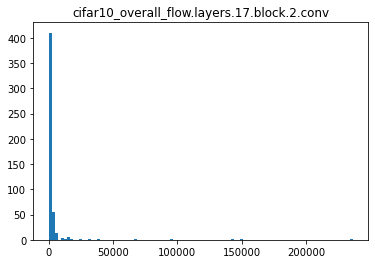

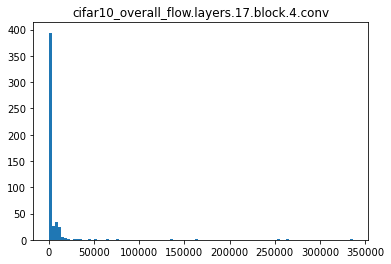

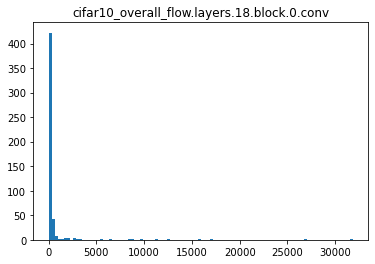

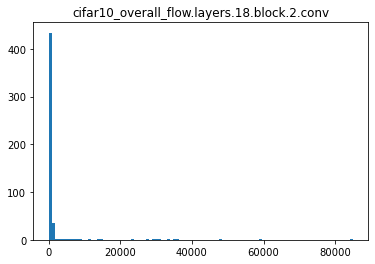

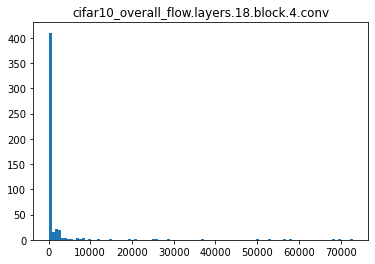

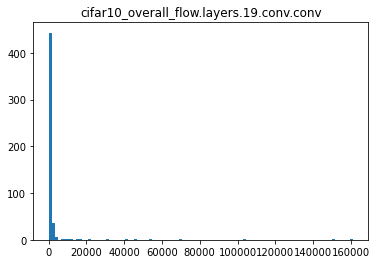

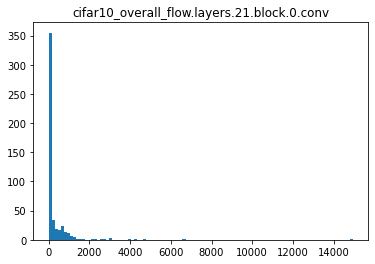

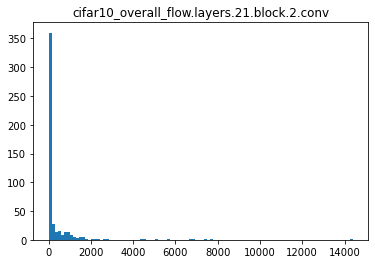

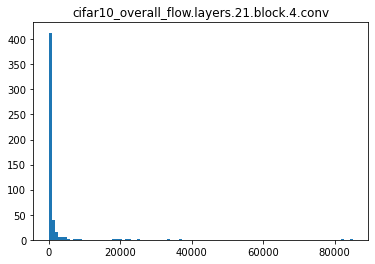

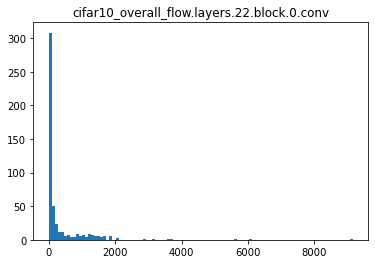

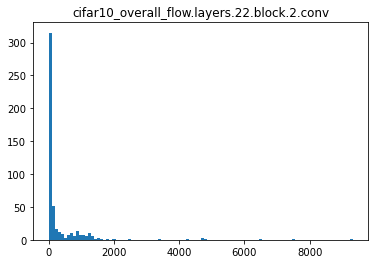

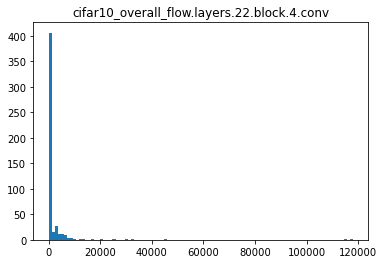

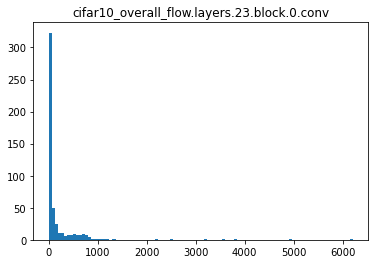

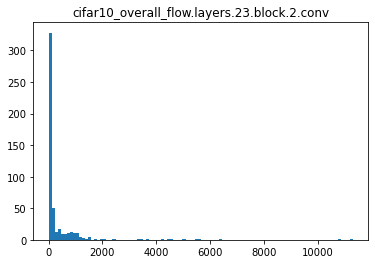

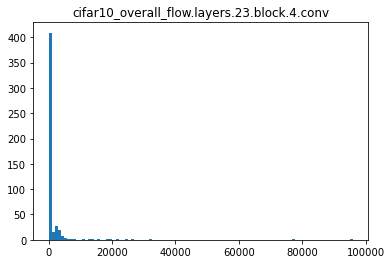

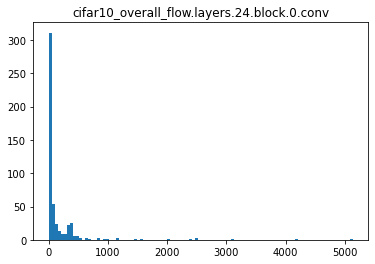

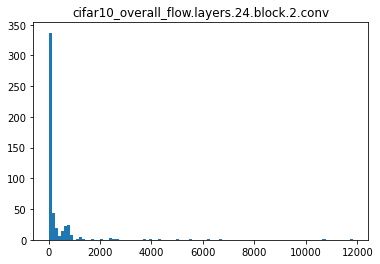

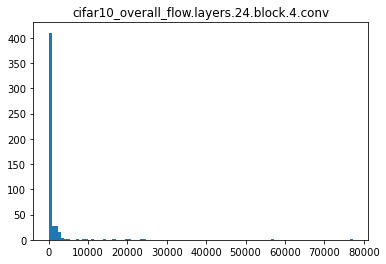

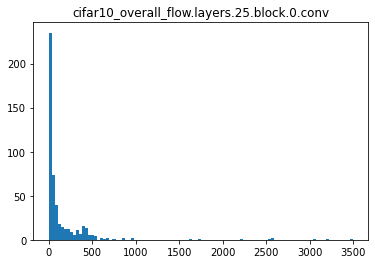

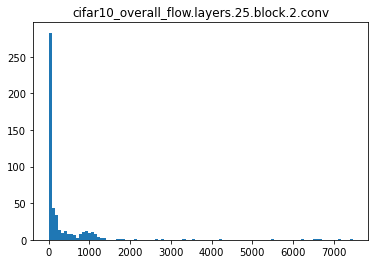

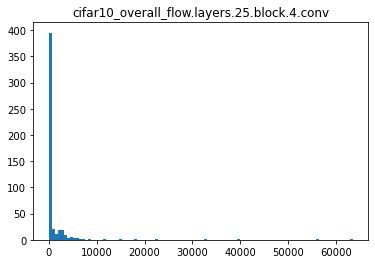

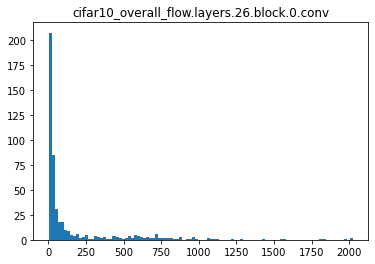

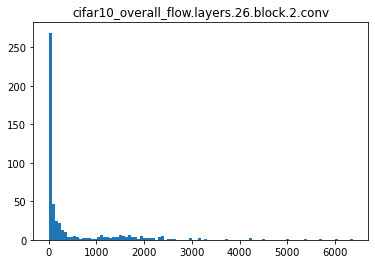

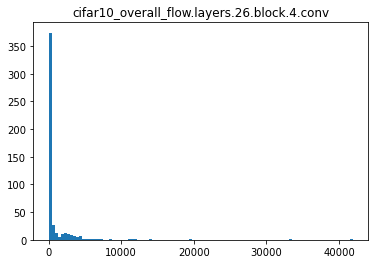

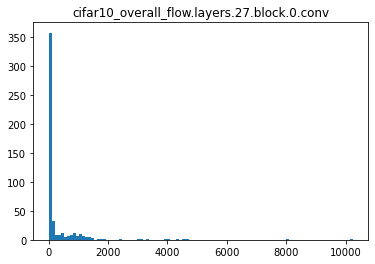

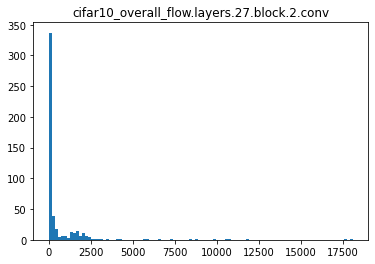

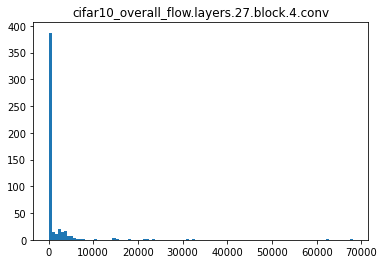

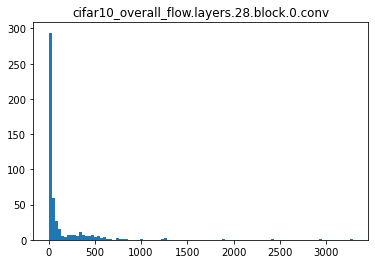

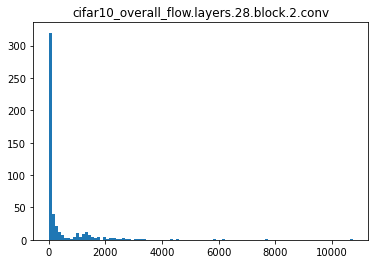

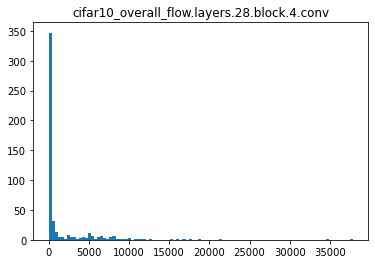

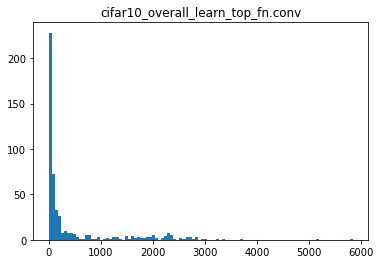

{'cifar10': 0.5,
 'svhn': 0.48107999999999995,
 'celeba': 0.450956,
 'lsun': 0.512288,
 'mnist': 0.36175999999999997,
 'fmnist': 0.39889600000000003,
 'kmnist': 0.39307200000000003,
 'omniglot': 0.962676,
 'notmnist': 0.735912,
 'noise': 0.97776,
 'constant': 0.783836,
 'overall': 0.597944}

In [3]:
method = 'ekfac(max)'
auroc = {}
SCOREs = {}

U_A, U_B, S, mean, std = Calculate_fisher_GLOW_ekfac(model, opt, max_iter=1000, select_modules=modules, seed=2021)

for ood in opt.ood_list:
    score = Calculate_score_GLOW_ekfac(model, opt, U_A, U_B, S, ood, max_iter=500, seed=2021)
    temp = []
    for name in score.keys():
        a = np.array(score[name])
        a = (a - mean[name]) / std[name]  
        #a /= std[name]  
        temp.append(a) 
        plt.figure()
        plt.title(f'{opt.train_dist}_{ood}_{name}')
        plt.hist(a, bins=100)
        plt.show()
    score = np.max(np.concatenate(temp, 1), 1)
    SCOREs[ood] = score
    args = [SCOREs[opt.train_dist], SCOREs[ood]]
    labels = [opt.train_dist, ood]
    auroc[ood] = AUROC(*args, labels=labels, verbose=False)
auroc
    

In [4]:
# FISHER_invs : Fisher inverse matrices from calculating Fisher score (w.r.t. train-dist)
FISHERs = {'cifar10': {}, 'fmnist': {}}
         
# NORMalize_FACtors : Normalizing Factor (w.r.t. train-dist)
NORM_FACs = {'cifar10': {}, 'fmnist': {}}
             
# SCOREs : (Scalars) Scores from calculating Fisher score (w.r.t. target-dist)
SCOREs = {'cifar10': {}, 'fmnist': {}}


In [5]:
opt = config.GLOW_cifar10
model = load_pretrained_GLOW(option=opt.train_dist)
model.eval()

# Disassemble !!!
layers = {}
for i in range(29):
    if i in [0, 9, 19]:
    #if i in [0, 33, 67]:
        continue
    layers[f'flow{i}'] = model.flow.layers[i]

layers2 = {}
for lname, layer in layers.items():
    modules = dict(layer._modules)
    for key in modules.keys():
        layers2[f'{lname}_{key}'] = modules[key]

layers3 = {}
for lname, layer in layers2.items():
    if lname.split('_')[1] in ['actnorm', 'invconv']:
        continue
    modules = dict(layer._modules)
    conv_num = 0
    act_num = 0
    for key, value in modules.items():
        if isinstance(value, nn.ReLU):
            continue
        modules2 = dict(value._modules)
        for key2, value2 in modules2.items():
            if key2 == 'conv':
                conv_num += 1
                key3 = key2 + str(conv_num)
            elif key2 == 'actnorm':
                act_num += 1
                key3 = key2 + str(act_num)
            layers3[f'{lname}_{key3}'] = modules2[key2]
    
layers4 = {}
for key in layers2.keys():
    if key[-5:] != 'block':
        layers4[key] = layers2[key]
    else:
        for key2 in layers3.keys():
            if key2[:len(key)] == key:
                layers4[key2] = layers3[key2]
    

layers5 = {}
for lname, layer in layers4.items():
    attrs = layer._parameters.keys()
    for attr in attrs:
        x = getattr(layer, attr)
        if x == None: # ex: empty bias in conv
            continue
        else:
            layers5[f'{lname}_{attr}'] = x

params = layers5

In [7]:
method = 'Vanilla'
a, b, _scores = AUTO_GLOW(opt, model, params, max_iter=[1000, 500], method=method)

Files already downloaded and verified


Calculate Fisher GLOW:   2%|███▉                                                                                                                                                                                                    | 999/50000 [01:20<1:06:05, 12.36step/s]


Files already downloaded and verified


Calculate Score GLOW:   5%|██████████▏                                                                                                                                                                                                | 499/10000 [00:50<15:52,  9.97step/s]


Using downloaded and verified file: ../data\test_32x32.mat


Calculate Score GLOW:   5%|██████████▏                                                                                                                                                                                                | 499/10000 [00:48<15:19, 10.33step/s]


Files already downloaded and verified


Calculate Score GLOW:   5%|██████████▏                                                                                                                                                                                                | 499/10000 [00:48<15:15, 10.38step/s]


## [3] Get AUROC

In [8]:
for pname in params.keys():
    FISHERs[opt.train_dist][pname] = a[pname] 
    NORM_FACs[opt.train_dist][pname] = b[pname]
for ood in opt.ood_list:
    SCOREs[opt.train_dist][ood] = _scores[ood]

# AUROC curve
auroc = {}
for pname in params.keys():
    _auroc = {}
    for ood in opt.ood_list:
        args = [
            SCOREs[opt.train_dist][opt.train_dist][pname],
            SCOREs[opt.train_dist][ood][pname],
        ]
        labels = [opt.train_dist, ood]
        _auroc[ood] = AUROC(*args, labels=labels, verbose=False)
    auroc[pname] = _auroc
    
df = pd.DataFrame(auroc).T
df = df.iloc[:, 1:]
df

svhn    celeba      lsun     mnist    fmnist  \
flow1_actnorm_bias          0.874612  0.610048  0.480144  0.998440  0.977560   
flow1_actnorm_logs          0.697340  0.653860  0.475280  0.998752  0.992592   
flow1_invconv_lower         0.715532  0.619532  0.451036  0.998748  0.991460   
flow1_invconv_log_s         0.711452  0.649460  0.462012  0.999988  0.995556   
flow1_invconv_upper         0.709416  0.664696  0.458080  0.999964  0.995168   
...                              ...       ...       ...       ...       ...   
flow28_block_conv2_weight   0.879440  0.538348  0.531516  0.572008  0.663280   
flow28_block_actnorm2_bias  0.777972  0.475784  0.483124  0.664472  0.686796   
flow28_block_actnorm2_logs  0.748800  0.504256  0.529132  0.777968  0.678780   
flow28_block_conv3_weight   0.929556  0.602038  0.733456  0.699704  0.821434   
flow28_block_conv3_bias     0.926892  0.569664  0.673688  0.415348  0.495272   

                              kmnist  omniglot  notmnist     noise  constant  \
flow1_actnorm_bias          0.991560  0.995980  0.959524  0.589928  0.999676   
flow1_actnorm_logs          0.998048  0.998128  0.996312  0.667748  0.986376   
flow1_invconv_lower         0.997964  0.998144  0.996800  0.826928  0.996728   
flow1_invconv_log_s         0.999488  0.997316  0.998308  0.604300  0.990920   
flow1_invconv_upper         0.999276  0.996872  0.998036  0.513456  0.989416   
...                              ...       ...       ...       ...       ...   
flow28_block_conv2_weight   0.646456  0.906764  0.812232  0.996044  0.937652   
flow28_block_actnorm2_bias  0.625704  0.936344  0.789096  0.995904  0.971828   
flow28_block_actnorm2_logs  0.651176  0.915340  0.721744  0.999992  0.977848   
flow28_block_conv3_weight   0.776896  0.914320  0.882004  0.998032  0.990700   
flow28_block_conv3_bias     0.483592  0.617920  0.570684  1.000000  0.998684   

                             overall  
flow1_actnorm_bias          0.832200  
flow1_actnorm_logs          0.839544  
flow1_invconv_lower         0.855516  
flow1_invconv_log_s         0.837304  
flow1_invconv_upper         0.827392  
...                              ...  
flow28_block_conv2_weight   0.746604  
flow28_block_actnorm2_bias  0.751176  
flow28_block_actnorm2_logs  0.754672  
flow28_block_conv3_weight   0.833720  
flow28_block_conv3_bias     0.689768  

[312 rows x 11 columns]

In [9]:
temp = {}
for ood in opt.ood_list:
    temp[ood] = SCOREs[opt.train_dist][ood].copy()

In [10]:
s = {}
for ood in opt.ood_list:
    try:
        s[ood] += temp[ood][pname]
    except:
        s[ood] = temp[ood][pname]
        
auroc = {}
for ood in opt.ood_list:
    args = [s[opt.train_dist], s[ood]]
    labels = [opt.train_dist, ood]
    auroc[ood] = AUROC(*args, labels=labels, verbose=False)
    
auroc

{'cifar10': 0.5,
 'svhn': 0.9268919999999999,
 'celeba': 0.569664,
 'lsun': 0.6736880000000001,
 'mnist': 0.41534800000000005,
 'fmnist': 0.49527199999999993,
 'kmnist': 0.483592,
 'omniglot': 0.61792,
 'notmnist': 0.570684,
 'noise': 1.0,
 'constant': 0.998684,
 'overall': 0.689768}

In [28]:
auroc = {}
for ood in opt.ood_list:
    in_sum = 0
    out_sum = 0
    for pname in params.keys():
        try:
            in_sum += np.array(SCOREs[opt.train_dist][opt.train_dist][pname])
            out_sum += np.array(SCOREs[opt.train_dist][ood][pname])
        except:
            in_sum = np.array(SCOREs[opt.train_dist][opt.train_dist][pname])
            out_sum = np.array(SCOREs[opt.train_dist][ood][pname])
    args = [
        in_sum,
        out_sum,
    ]

    labels = [opt.train_dist, ood]
    
    auroc[ood] = AUROC(*args, labels=labels, verbose=False)

auroc

{'cifar10': 0.5, 'svhn': 0.0, 'celeba': 0.0, 'lsun': 0.0}

In [30]:
print(SCOREs[opt.train_dist]['cifar10'])
print(SCOREs[opt.train_dist]['svhn'])

{'flow28_invconv_lower': array([0.01826269, 0.01861855, 0.01927181, ..., 0.01627278, 0.01769829,
       0.0144948 ], dtype=float32), 'flow28_invconv_log_s': array([0.0017084 , 0.00178753, 0.00177009, ..., 0.00139408, 0.00165807,
       0.00120105], dtype=float32), 'flow28_invconv_upper': array([0.0007756 , 0.00074737, 0.00085358, ..., 0.00080441, 0.00074704,
       0.00074754], dtype=float32)}
{'flow28_invconv_lower': array([0.00099169, 0.00085825, 0.00099795, ..., 0.00092485, 0.00108708,
       0.00095772], dtype=float32), 'flow28_invconv_log_s': array([0.00248206, 0.00220631, 0.00212421, ..., 0.00149722, 0.00191713,
       0.00188069], dtype=float32), 'flow28_invconv_upper': array([0.0008896 , 0.00078601, 0.00087852, ..., 0.00079614, 0.00095663,
       0.00088242], dtype=float32)}


In [53]:
x = list(df.index)
xx = []
for elt in x:
    if elt.split('_')[1] == 'invconv':
        if elt.split('_')[2] == 'lower':
                xx.append(elt)

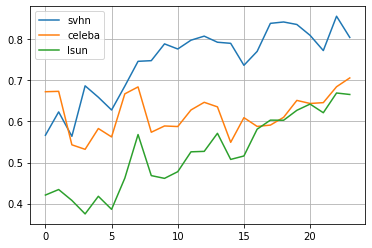

In [54]:
x = range(len(xx))
plt.plot(x, df.loc[xx, 'svhn'], label='svhn')
plt.plot(x, df.loc[xx, 'celeba'], label='celeba')
plt.plot(x, df.loc[xx, 'lsun'], label='lsun')
plt.grid()
plt.legend()


# GLOW - FMNIST

## Load the model & Parameter Selection

In [166]:
opt = config.GLOW_fmnist
model = load_pretrained_GLOW(option=opt.train_dist)
model.eval()

layers = {}
for i in range(29):
    if i in [0, 9, 19]:
    #if i in [0, 33, 67]:
        continue
    layers[f'flow{i}'] = model.flow.layers[i]

layers2 = {}
for lname, layer in layers.items():
    modules = dict(layer._modules)
    for key in modules.keys():
        layers2[f'{lname}_{key}'] = modules[key]

## Compute Fisher inverse & Fisher score

In [73]:
method = 'Vanilla'
a, b, _scores = AUTO_GLOW(opt, model, layers2, max_iter=[1, 500], method=method)

Calculate Score GLOW:   5%|██▋                                                   | 499/10000 [00:38<12:15, 12.91step/s]


## Get AUROC

In [83]:
layers = layers2

for lname in layers.keys():
    FISHERs[train_dist][lname] = a[lname] 
    NORM_FACs[train_dist][lname] = b[lname]
for ood in opt.ood_list:
    SCOREs[train_dist][ood] = _scores[ood]

# AUROC curve
auroc = {}
for lname in layers.keys():
    _auroc = {}
    for ood in opt.ood_list:
        if ood == 'noise':
            continue
        args = [
            SCOREs[train_dist][train_dist][lname],
            SCOREs[train_dist][ood][lname],
        ]
        labels = [train_dist, ood]
        _auroc[ood] = AUROC(*args, labels=labels, verbose=False)
    auroc[lname] = _auroc
    
df = pd.DataFrame(auroc).T
df = df.iloc[:, 1:]
df

mnist    kmnist  notmnist  constant
flow1_actnorm   0.999956  0.999972  0.995712  0.999944
flow1_invconv   0.992520  0.982936  0.962584  0.968748
flow1_block     1.000000  1.000000  1.000000  1.000000
flow2_actnorm   0.999996  0.999996  0.998196  1.000000
flow2_invconv   0.999112  0.998556  0.975644  0.992816
...                  ...       ...       ...       ...
flow27_invconv  0.061844  0.071596  0.370832  0.276684
flow27_block    0.972340  0.950224  0.983928  0.998192
flow28_actnorm  0.311968  0.437160  0.561520  0.597460
flow28_invconv  0.005700  0.031140  0.157432  0.068472
flow28_block    0.640320  0.753976  0.946744  0.885408

[72 rows x 4 columns]

In [87]:
x = list(df.index)
xx = []
for elt in x:
    if elt.split('_')[1] == 'block':
        xx.append(elt)

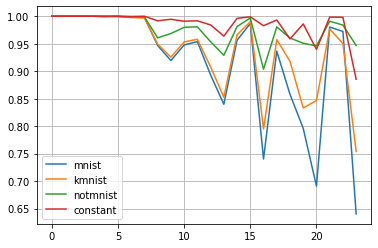

In [88]:
x = range(len(xx))
plt.plot(x, df.loc[xx, 'mnist'], label='mnist')
plt.plot(x, df.loc[xx, 'kmnist'], label='kmnist')
plt.plot(x, df.loc[xx, 'notmnist'], label='notmnist')
plt.plot(x, df.loc[xx, 'constant'], label='constant')
plt.grid()
plt.legend()

## Check the reconstruction ability of GLOW

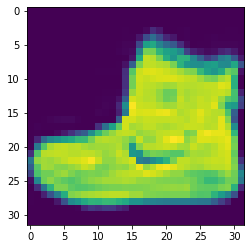

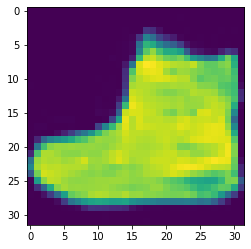

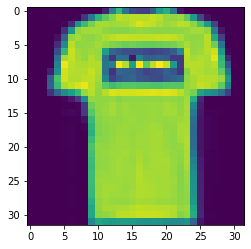

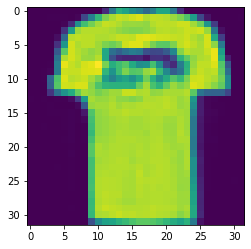

In [171]:
def postprocess(x):
    x = torch.clamp(x, -0.5, 0.5)
    x += 0.5
    x = x * 256
    return torch.clamp(x, 0, 255).byte()

loader = TEST_loader('fmnist', 'fmnist', shuffle=False, is_glow=True)
for i, x in enumerate(loader):
    try:
        x, _ = x
    except:
        pass
    y = postprocess(x)
    plt.figure()
    plt.imshow(y[0].permute(1, 2, 0).cpu())
    x = x.to('cuda')
    z, _, _ = model(x = x)
    x = model(z=z, temperature=0.75, reverse=True)
    y = postprocess(x)
    plt.figure()
    plt.imshow(y[0].permute(1, 2, 0).cpu())
    if i == 1:
        break
plt.show()

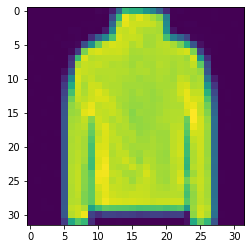

In [104]:
plt.imshow(x[0].permute(1,2,0).cpu())